# Global Power Plant Database

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3//main/global_Power_plant_database.csv')

df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
903     IND        India                  YERMARUS TPP  IND0000513   
904     IND        India  Yelesandra Solar Power Plant  WRI1026222   
905     IND        India  Yelisirur wind power project  WRI1026776   
906     IND        India                   ZAWAR MINES  WRI1019901   
907     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
903       1600.0   16.2949    77.3568         Coal         Oil         NaN   
904          3.0   12.8932    78.1654        Solar         NaN         NaN   
905         25.5   15.2758    75.5811         Wind         NaN         NaN   
906         80.0   24.3500    73.7477         Coal         NaN         NaN   
907         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...                    geolocation_source  wepp_id year_of_capacity_data  \
0    ...  National Renewable Energy Laboratory      NaN                   NaN   
1    ...                                   WRI      NaN                   NaN   
2    ...                                   WRI      NaN                   NaN   
3    ...                                   WRI      NaN                2018.0   
4    ...                                   WRI      NaN                2018.0   
..   ...                                   ...      ...                   ...   
903  ...                                   WRI      NaN                2018.0   
904  ...                        Industry About      NaN                   NaN   
905  ...                                   WRI      NaN                   NaN   
906  ...                                   WRI      NaN                   NaN   
907  ...                                   WRI      NaN                   NaN   

    generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            631.777928          617.789264          843.747000   
4           1668.290000         3035.550000         5916.370000   
..                  ...                 ...                 ...   
903                 NaN                 NaN            0.994875   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   
907                 NaN                 NaN                 NaN   

     generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             886.004428           663.774500  Central Electricity Authority   
4            6243.000000          5385.579736  C

All the data is about power plants in India.

The plants vary in size, with the smallest at 2.5 MW and the largest at 1800 MW, showing there are both small and big plants.

The latitude and longitude show that the plants are spread out across different areas of India.

The main fuels used for generating power include coal, solar, wind, and gas, showing a mix of energy sources.

Some plants also use oil as an extra fuel, which means they can generate power in different ways.

Many plants have missing data for some years, but some, like Akaltara TPP, produced over 6,000 GWh of electricity in 2016.

Most plants have capacity information from 2018, which is the latest data available.

In [4]:
#Fetching First few data
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

# Exploratory Data Analysis(EDA)

In [5]:
df.shape

(908, 25)

The dataset has 908 Rows and 25Columns

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
#checking data types of each column
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We observe that some are float64 and some are Object data types, dataset contains various columns with different data types. It includes text columns like "country" and "name" for identifying countries and power plants. "Capacity_mw" indicates the maximum power output, while "latitude" and "longitude" provide geographical coordinates. The "primary_fuel" column shows the main fuel type, and "commissioning_year" indicates when each plant started operating. There are also columns for power generation from 2013 to 2017, measured in gigawatt-hours (GWh), along with estimated generation values. Overall, it provides a detailed overview of power plants and their characteristics.

In [8]:
#checking missing values in each column
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

The dataset has various missing values: "latitude" and "longitude" each have 46 missing entries, "commissioning_year" has 380, and "owner" has 566. Columns for fuel types show significant gaps, with "other_fuel1," "other_fuel2," and "other_fuel3" missing 709, 907, and 908 values, respectively. The generation columns (2013-2017) also have missing data, with "generation_gwh_2013" missing 524 values, and "estimated_generation_gwh" has 908 missing entries.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

The above data has insights from 908 power plants and uses about 177.5 KB of memory, containing 13 columns with numbers (float64) and 12 columns with text (object) . Also we can see lot of missing values in multiple columns.

<Axes: >

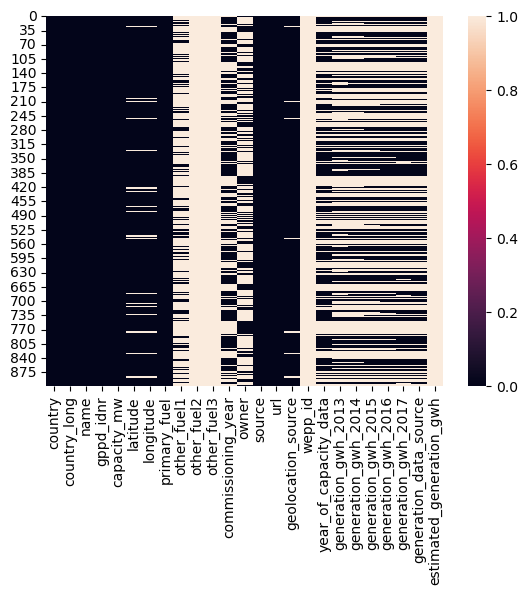

In [10]:
#lets visualise it using heatmap
sns.heatmap(df.isnull())

In [11]:
 df['country'].value_counts()


country
IND    908
Name: count, dtype: int64

The above dataset includes power plants from only one specific country, India.

In [12]:
#Dropping country column
df.drop (['country', 'country_long',],axis = 1,inplace = True)

The datasets include power plant of just one country so it will not impact in prediction if we drop it.

In [13]:
#checking after dropping country column
df.head(2)

name   gppd_idnr  capacity_mw  latitude  longitude  \
0     ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1  ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   

  primary_fuel other_fuel1 other_fuel2  other_fuel3  commissioning_year  ...  \
0        Solar         NaN         NaN          NaN              2011.0  ...   
1         Coal         NaN         NaN          NaN                 NaN  ...   

                     geolocation_source wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory     NaN                   NaN   
1                                   WRI     NaN                   NaN   

  generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                 NaN                  NaN                  NaN   
1                 NaN                  NaN                  NaN   

   generation_gwh_2016  generation_gwh_2017  generation_data_source  \
0                  NaN                  NaN                     NaN   
1                  NaN                  NaN                     NaN   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  

[2 rows x 23 columns]

In [14]:
#Dropping columns which don't have a single data , which aren't useful in any way
df.drop (['other_fuel3', 'wepp_id','estimated_generation_gwh'],axis = 1,inplace = True)

In [15]:
#checking after dropping above mentioned data
df.head(2)

name   gppd_idnr  capacity_mw  latitude  longitude  \
0     ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1  ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   

  primary_fuel other_fuel1 other_fuel2  commissioning_year  \
0        Solar         NaN         NaN              2011.0   
1         Coal         NaN         NaN                 NaN   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

   generation_gwh_2016  generation_gwh_2017 generation_data_source  
0                  NaN                  NaN                    NaN  
1                  NaN                  NaN                    NaN

In [16]:
#Dropping columns , aren't useful in prediction
df.drop (['other_fuel1','other_fuel2', 'url','geolocation_source','source'],axis = 1,inplace = True)

These are more descriptive and not useful for prediction and also secondary fuel sources may not add significant value.

In [17]:
#checking after dropping above mentioned columns
df.head(2)

name   gppd_idnr  capacity_mw  latitude  longitude  \
0     ACME Solar Tower  WRI1020239          2.5   28.1839    73.2407   
1  ADITYA CEMENT WORKS  WRI1019881         98.0   24.7663    74.6090   

  primary_fuel  commissioning_year                 owner  \
0        Solar              2011.0           Solar Paces   
1         Coal                 NaN  Ultratech Cement ltd   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   

  generation_data_source  
0                    NaN  
1                    NaN

In [18]:
df['primary_fuel'].value_counts()

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64

In [19]:
df['name'].value_counts()

name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: count, Length: 908, dtype: int64

In [20]:
#Dropping few more columns not helpful in prediction
df.drop (['owner','gppd_idnr', 'generation_data_source','name','year_of_capacity_data'],axis = 1,inplace = True)

In [21]:
#Checking
df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal                 NaN   
2         39.2   21.9038    69.3732         Wind                 NaN   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           631.777928           617.789264              843.747   
4          1668.290000          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3           886.004428           663.774500  
4          6243.000000          5385.579736

In [22]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [23]:
df[['latitude','longitude']].value_counts()

latitude  longitude
19.0004   72.8983      3
24.1917   81.2875      3
31.2680   76.4920      2
11.5484   75.8988      2
29.7303   75.3099      2
                      ..
18.9002   73.2032      1
18.9057   76.7282      1
18.9368   73.4527      1
18.9766   78.2563      1
34.6490   74.7514      1
Name: count, Length: 837, dtype: int64

# Skewness

In [24]:
# Calculate skewness for all numerical columns
skewness = df.select_dtypes(include=['float64']).skew()
print(skewness)

capacity_mw            3.193257
latitude              -0.143622
longitude              1.100942
commissioning_year    -1.056132
generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64


# Description

In [25]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   908.000000  862.000000  862.000000          528.000000   
mean    321.046378   21.196189   77.447848         1996.876894   
std     580.221767    6.248627    4.907260           17.047817   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.837500   16.771575   74.258975         1988.000000   
50%      60.000000   21.778300   76.719250         2000.000000   
75%     388.125000   25.516375   79.441475         2011.250000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           384.000000           401.000000           425.000000   
mean           2304.059202          2420.393316          2414.072373   
std            3794.767492          4013.558173          4183.203199   
min               0.000000             0.000000             0.000000   
25%             244.458088           223.650436           174.174750   
50%             797.063475           805.760000           701.027250   
75%            2795.021500          3034.575000          3080.000000   
max           27586.200000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  
count           437.000000           443.000000  
mean           2453.936292          2531.754458  
std            4152.038216          4187.236364  
min               0.000000             0.000000  
25%             187.193669           177.643170  
50%             716.728350           807.601700  
75%            3263.483000          3258.785000  
max           30015.000000         35116.000000

# Visualization

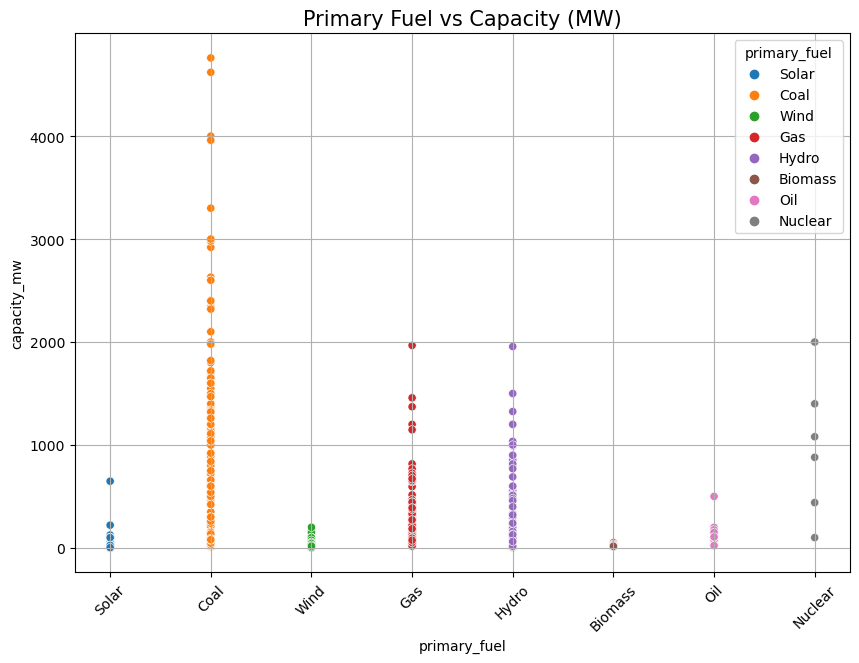

In [26]:
#scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='primary_fuel', y='capacity_mw', hue='primary_fuel')
plt.title('Primary Fuel vs Capacity (MW)', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

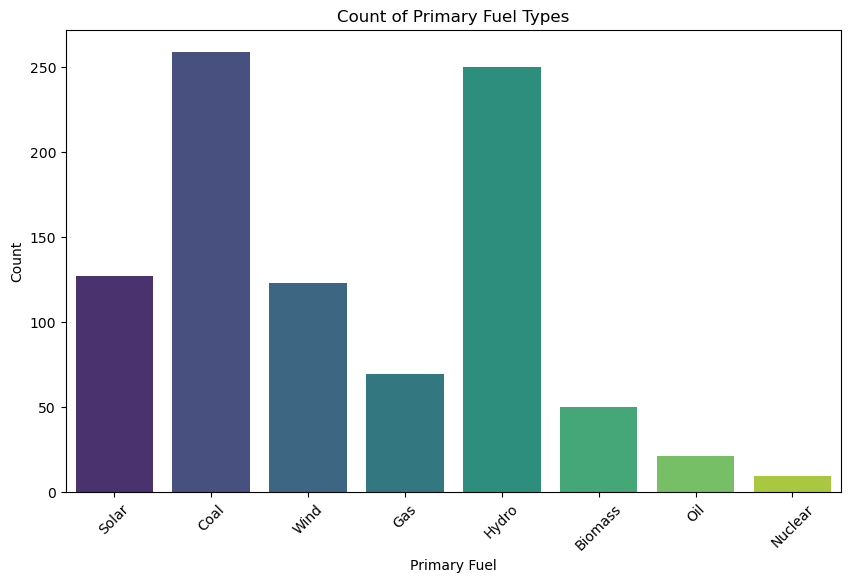

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='primary_fuel',palette='viridis')
plt.title('Count of Primary Fuel Types')
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

df['primary_fuel'].value_counts()

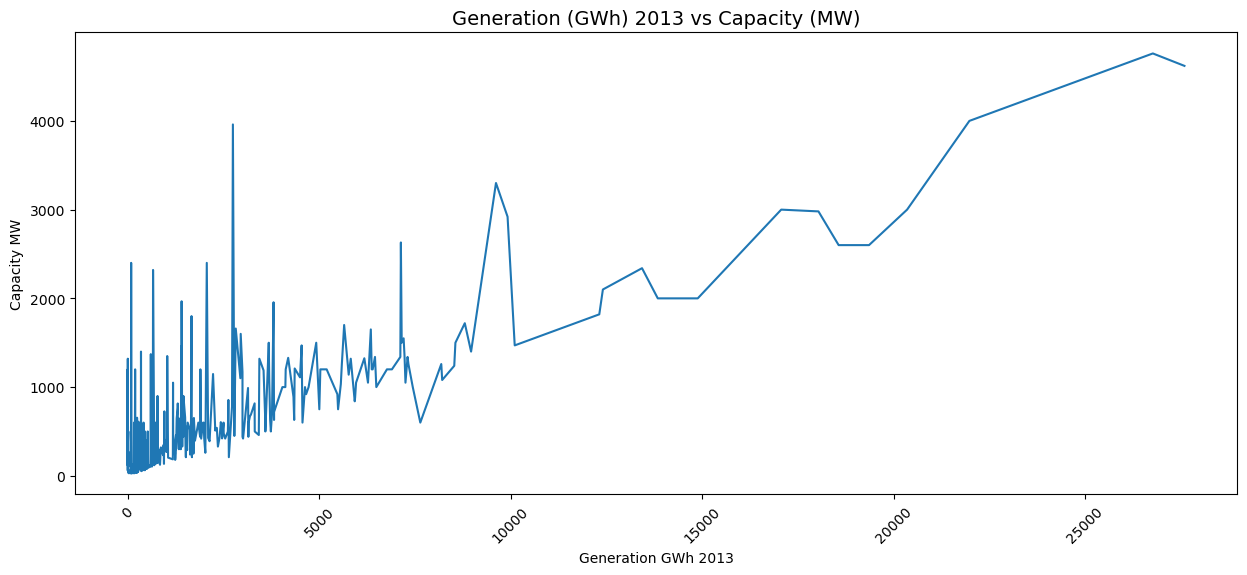

In [28]:
plt.figure(figsize=(15, 6)) 
sns.lineplot(data=df, x='generation_gwh_2013', y='capacity_mw')
plt.title('Generation (GWh) 2013 vs Capacity (MW)', fontsize=14)
plt.xticks(rotation=45)  
plt.xlabel('Generation GWh 2013')
plt.ylabel('Capacity MW')
plt.show()

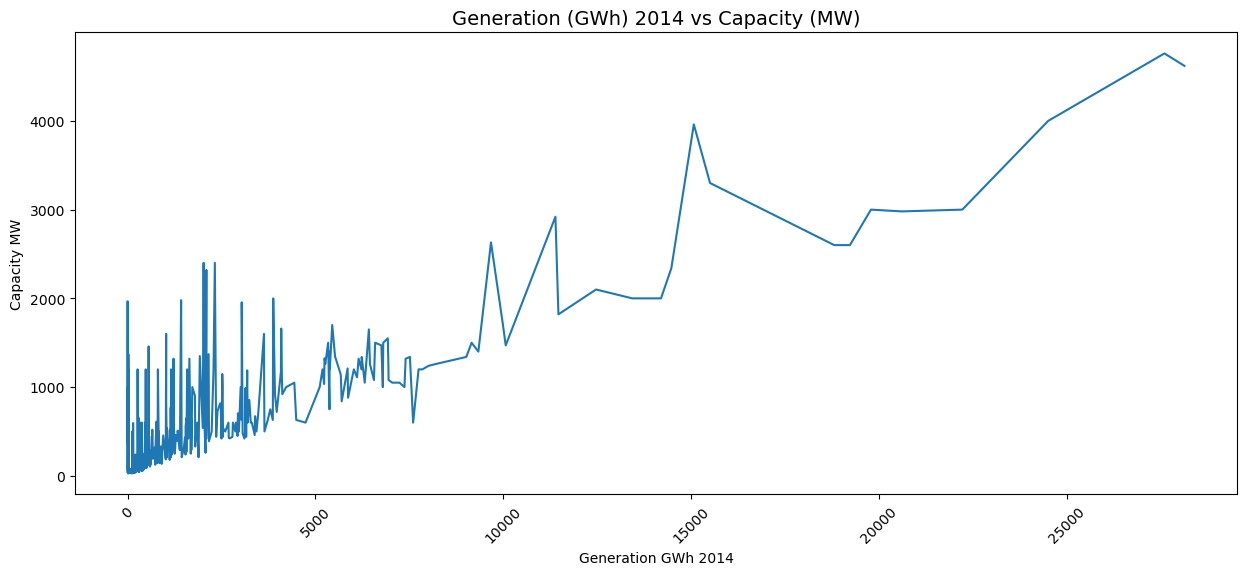

In [29]:
plt.figure(figsize=(15, 6))  
sns.lineplot(data=df, x='generation_gwh_2014', y='capacity_mw')
plt.title('Generation (GWh) 2014 vs Capacity (MW)', fontsize=14)
plt.xticks(rotation=45) 
plt.xlabel('Generation GWh 2014')
plt.ylabel('Capacity MW')
plt.show()

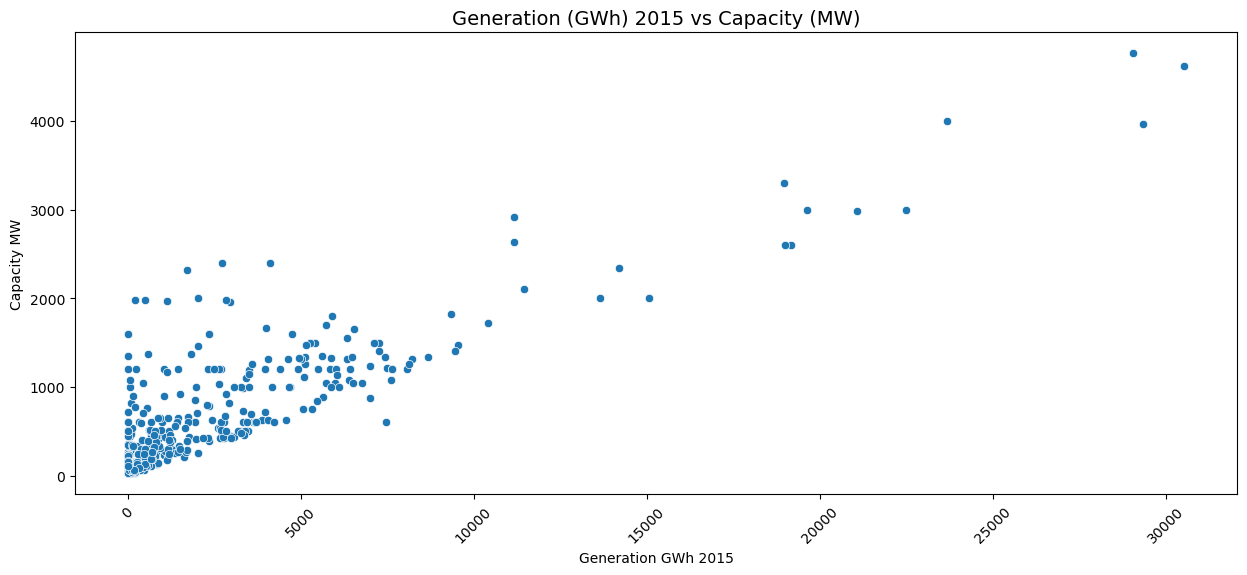

In [30]:
plt.figure(figsize=(15, 6))  
sns.scatterplot(data=df, x='generation_gwh_2015', y='capacity_mw')
plt.title('Generation (GWh) 2015 vs Capacity (MW)', fontsize=14)
plt.xticks(rotation=45)  
plt.xlabel('Generation GWh 2015')
plt.ylabel('Capacity MW')
plt.show()

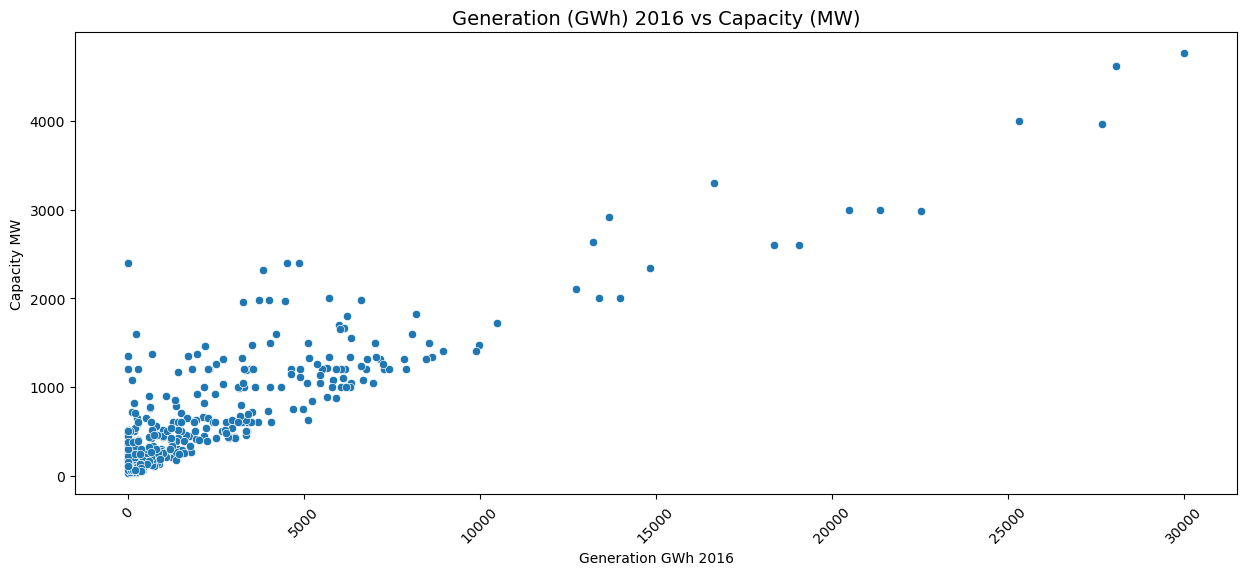

In [31]:
plt.figure(figsize=(15, 6))  
sns.scatterplot(data=df, x='generation_gwh_2016', y='capacity_mw')
plt.title('Generation (GWh) 2016 vs Capacity (MW)', fontsize=14)
plt.xticks(rotation=45)  
plt.xlabel('Generation GWh 2016')
plt.ylabel('Capacity MW')
plt.show()

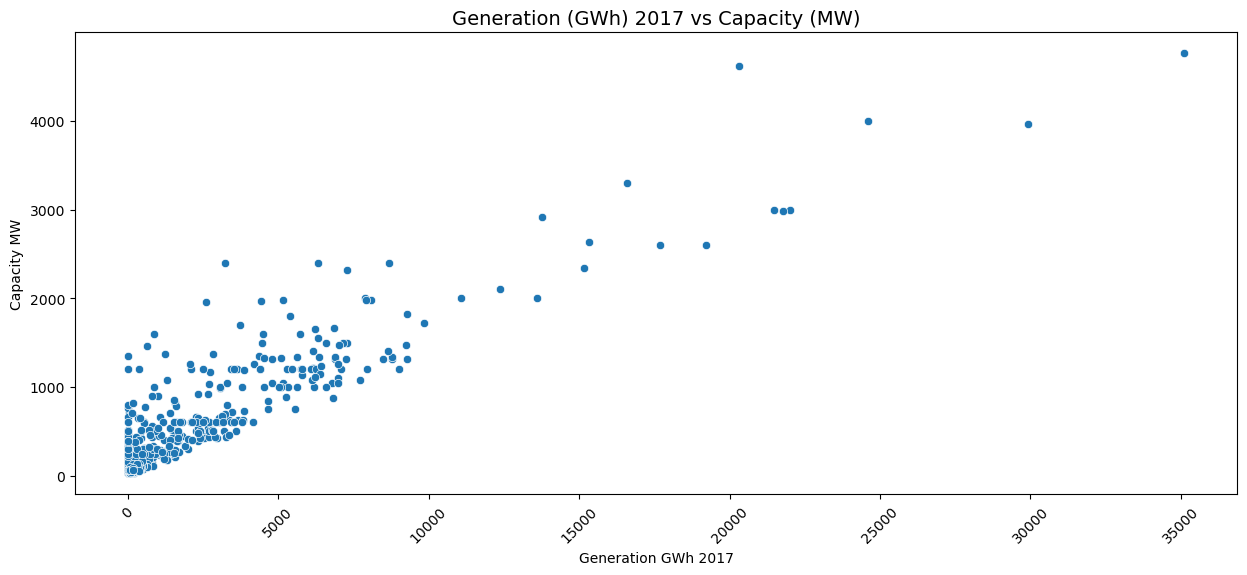

In [32]:
plt.figure(figsize=(15, 6))  
sns.scatterplot(data=df, x='generation_gwh_2017', y='capacity_mw')
plt.title('Generation (GWh) 2017 vs Capacity (MW)', fontsize=14)
plt.xticks(rotation=45)  
plt.xlabel('Generation GWh 2017')
plt.ylabel('Capacity MW')
plt.show()

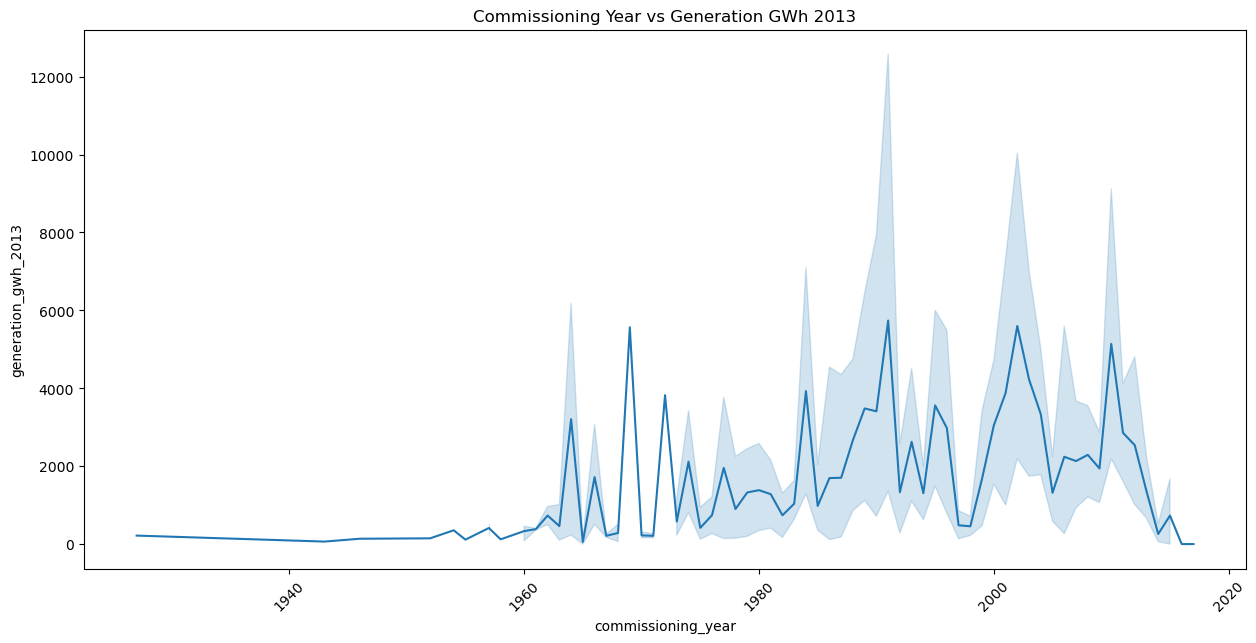

In [33]:
# Ploting for generation_gwh_2013 vs commissioning_year
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='commissioning_year', y='generation_gwh_2013')
locs, labels = plt.xticks()
plt.title('Commissioning Year vs Generation GWh 2013')
plt.setp(labels, rotation=45)
plt.show()

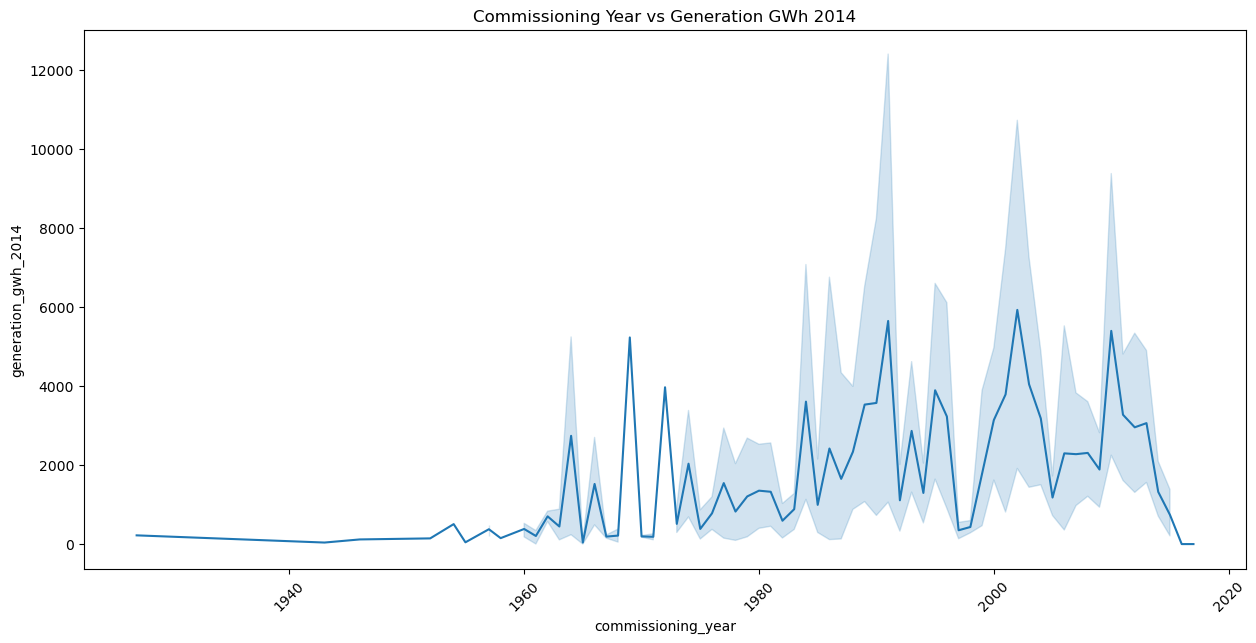

In [34]:
# Ploting for generation_gwh_2014 vs commissioning_year
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='commissioning_year', y='generation_gwh_2014')
locs, labels = plt.xticks()
plt.title('Commissioning Year vs Generation GWh 2014')
plt.setp(labels, rotation=45)
plt.show()

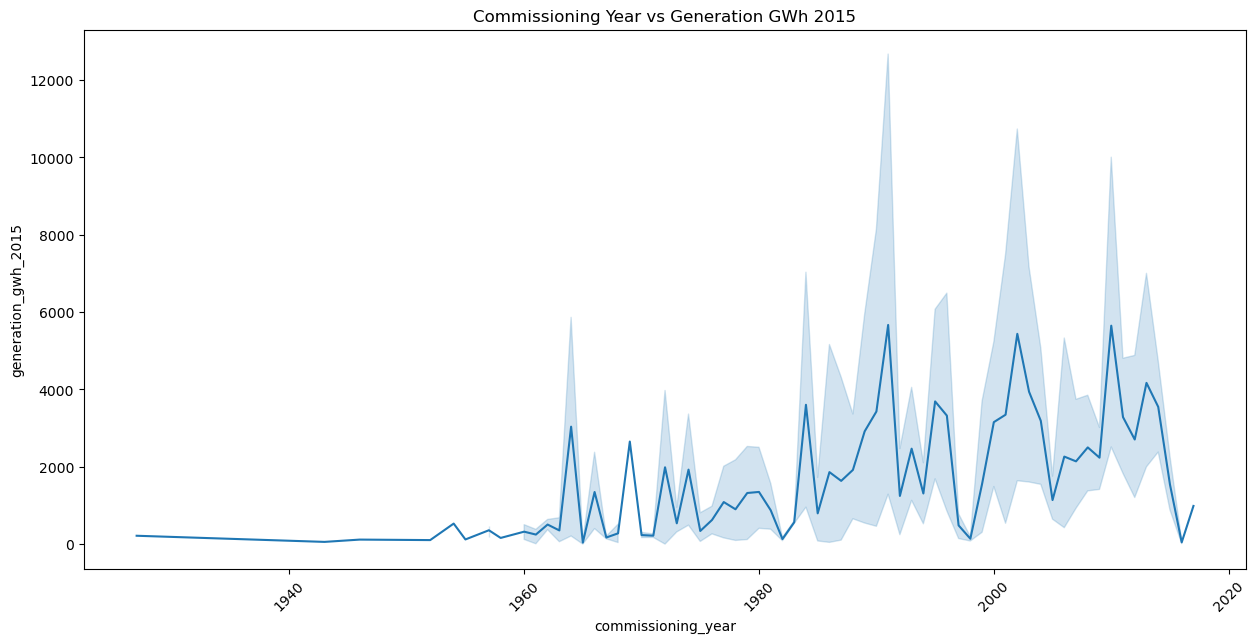

In [35]:
# Ploting for generation_gwh_2015 vs commissioning_year
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='commissioning_year', y='generation_gwh_2015')
locs, labels = plt.xticks()
plt.title('Commissioning Year vs Generation GWh 2015')
plt.setp(labels, rotation=45)
plt.show()

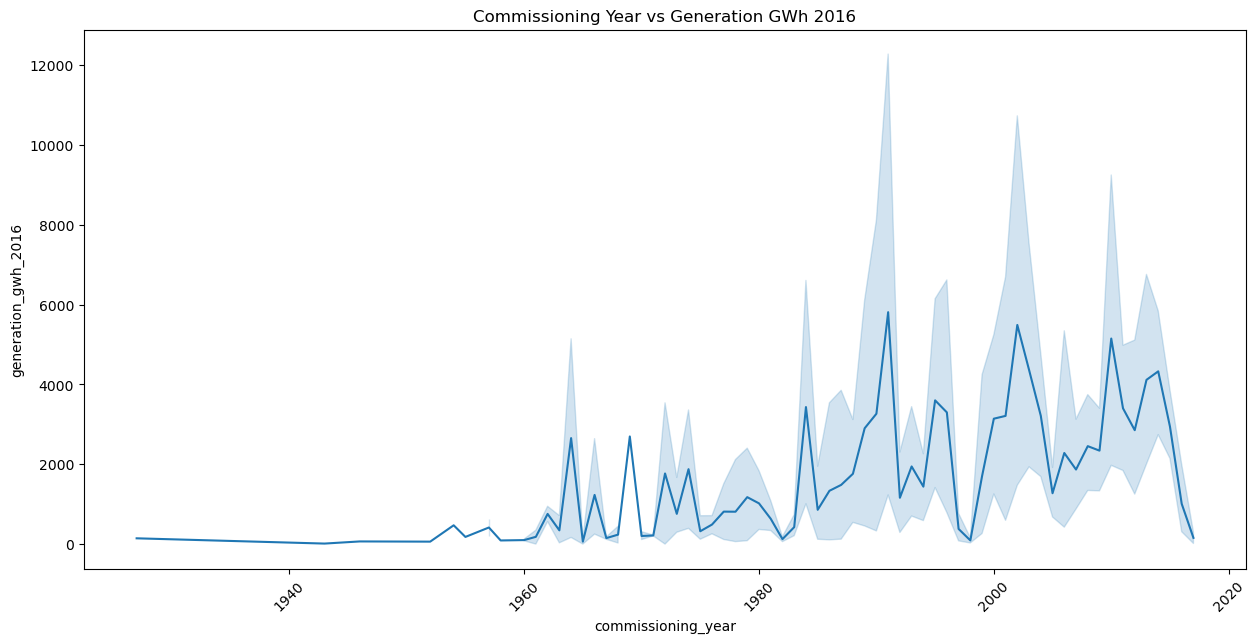

In [36]:
# Ploting for generation_gwh_2016 vs commissioning_year
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='commissioning_year', y='generation_gwh_2016')
locs, labels = plt.xticks()
plt.title('Commissioning Year vs Generation GWh 2016')
plt.setp(labels, rotation=45)
plt.show()

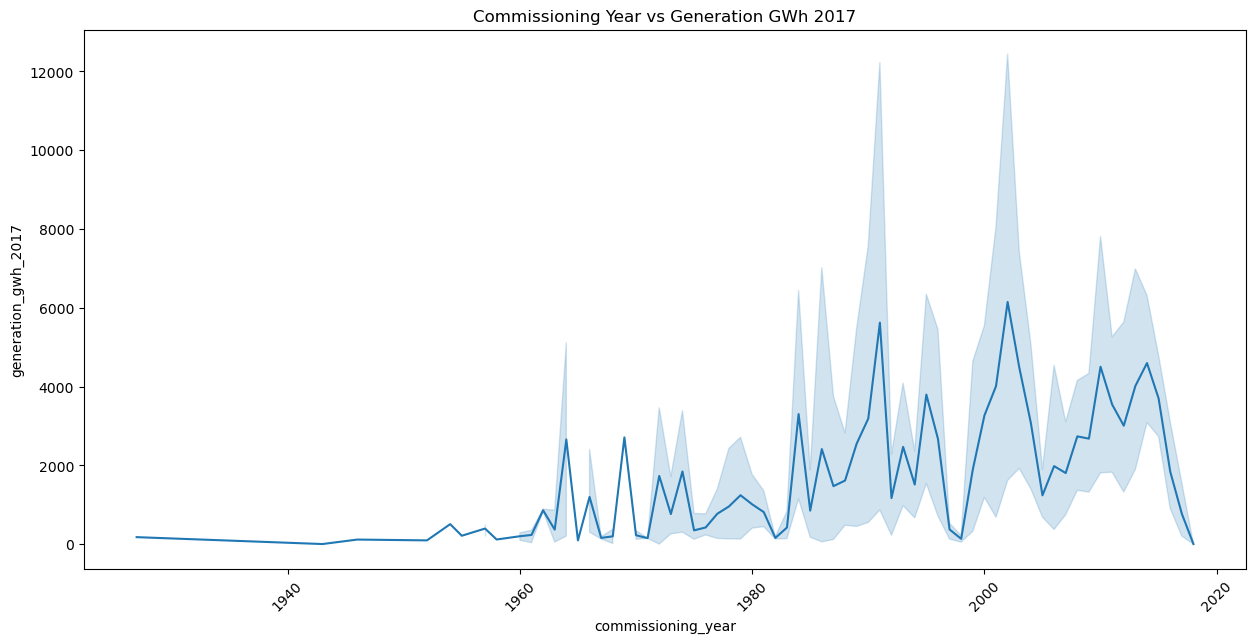

In [37]:
# Ploting for generation_gwh_2017 vs commissioning_year
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='commissioning_year', y='generation_gwh_2017')
locs, labels = plt.xticks()
plt.title('Commissioning Year vs Generation GWh 2017')
plt.setp(labels, rotation=45)
plt.show()

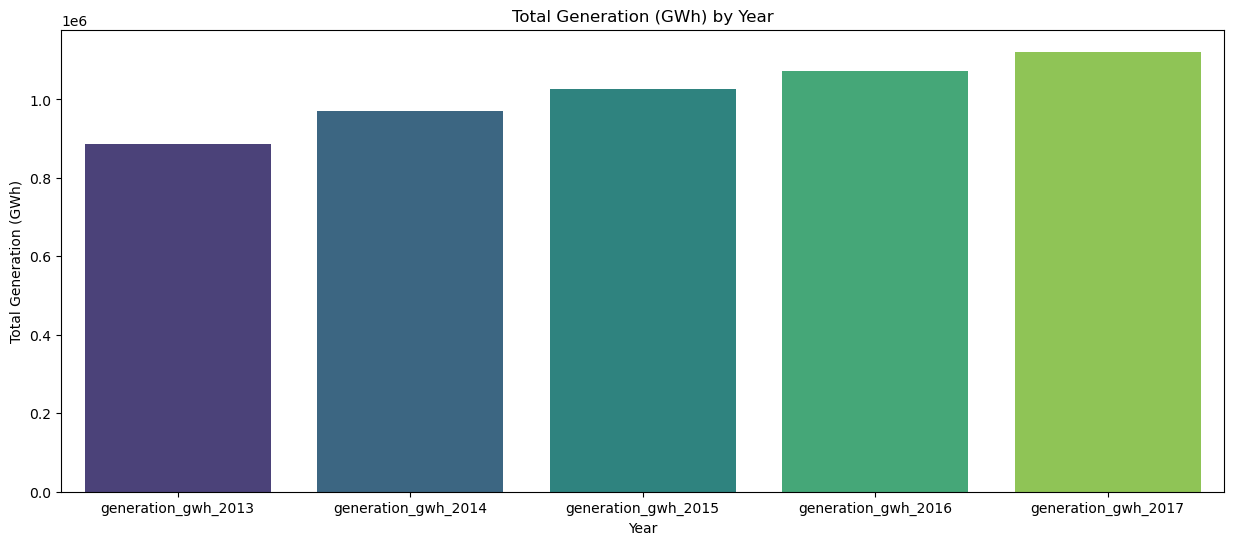

In [38]:
# summation of generation for each year
generation_by_year = df[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']].sum()

plt.figure(figsize=(15, 6))
sns.barplot(x=generation_by_year.index, y=generation_by_year.values, palette='viridis')
plt.title('Total Generation (GWh) by Year')
plt.xlabel('Year')
plt.ylabel('Total Generation (GWh)')
plt.show()


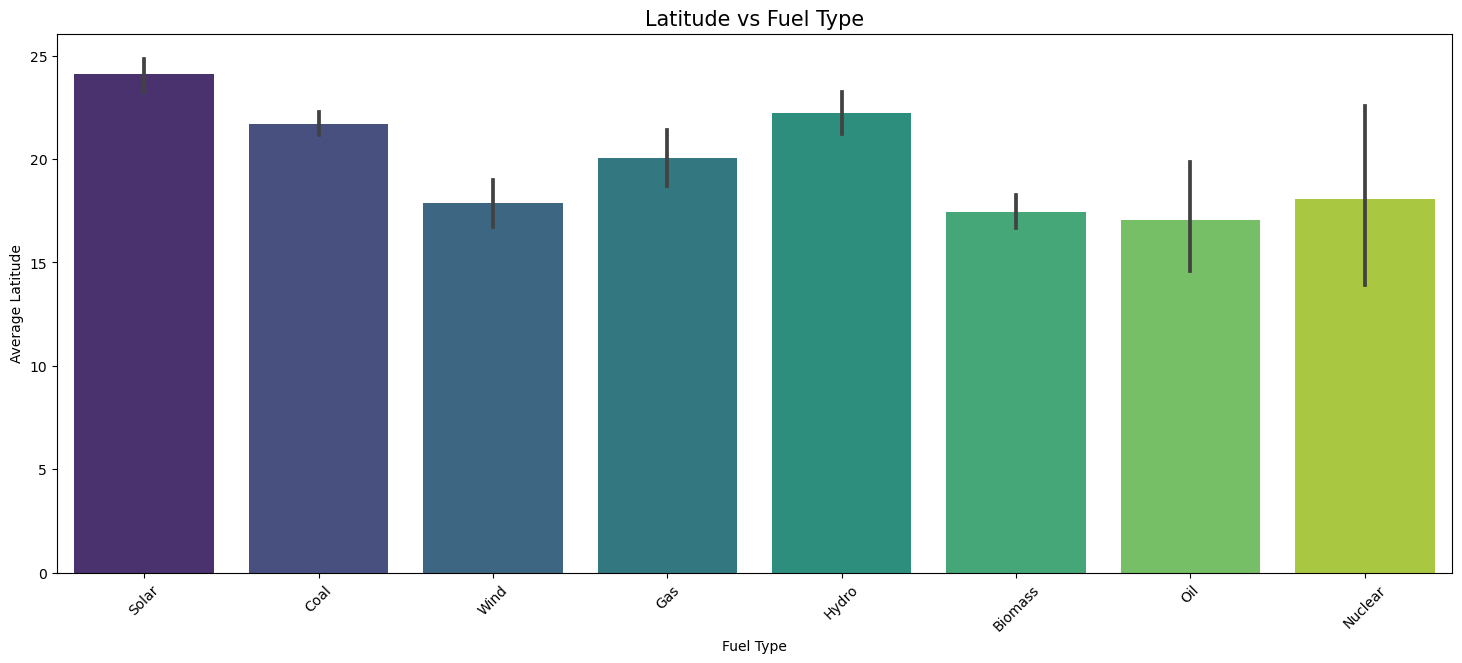

In [39]:
# Create a barplot showing the average latitude for each primary fuel type
plt.figure(figsize=(18, 7))

sns.barplot(x='primary_fuel', y='latitude', data=df, palette='viridis')
plt.title('Latitude vs Fuel Type', fontsize=15)
plt.xlabel('Fuel Type')
plt.ylabel('Average Latitude')
plt.xticks(rotation=45)
plt.show()

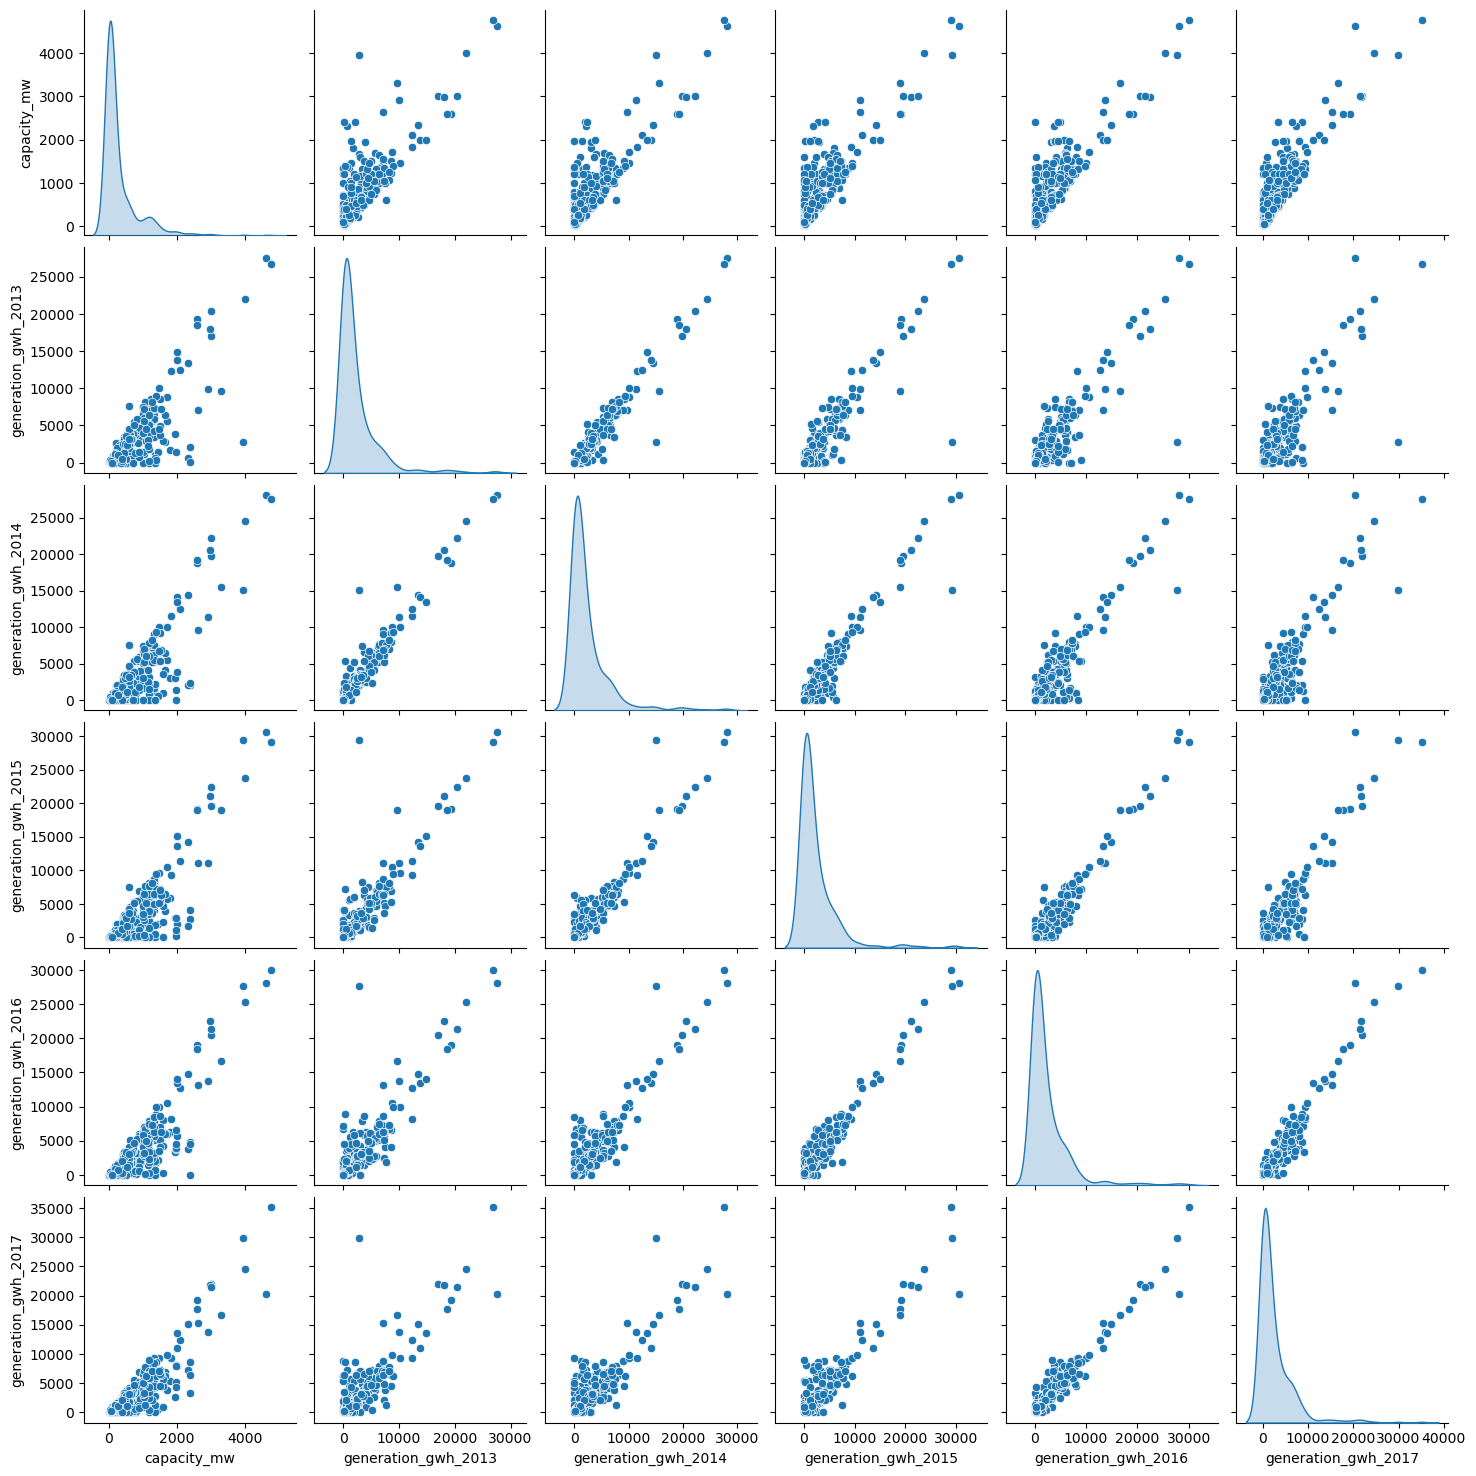

In [40]:
sns.pairplot(df[['capacity_mw', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']], diag_kind='kde', palette='viridis')
plt.show()


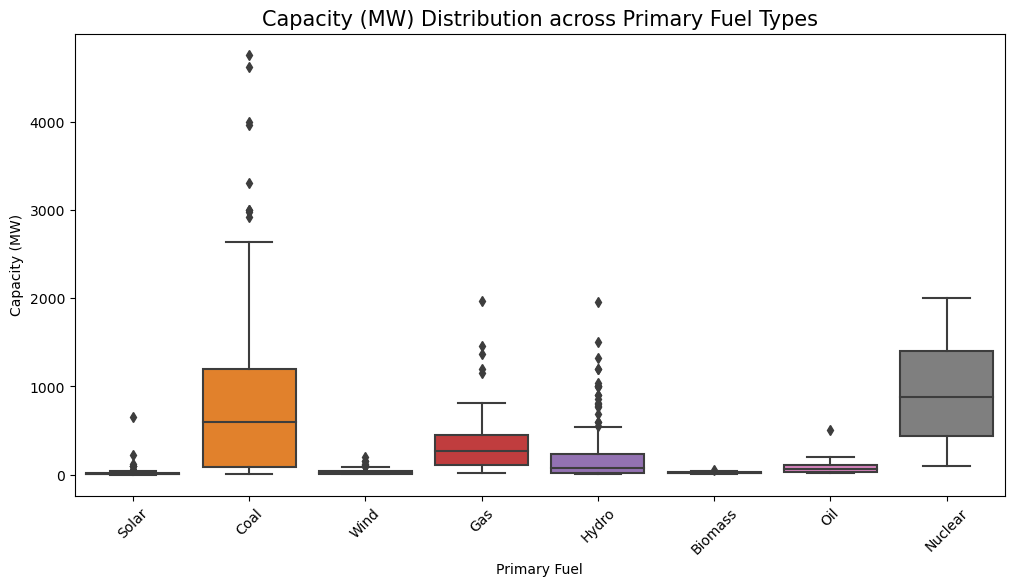

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw')
plt.title('Capacity (MW) Distribution across Primary Fuel Types', fontsize=15)
plt.xlabel('Primary Fuel')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45)
plt.show()

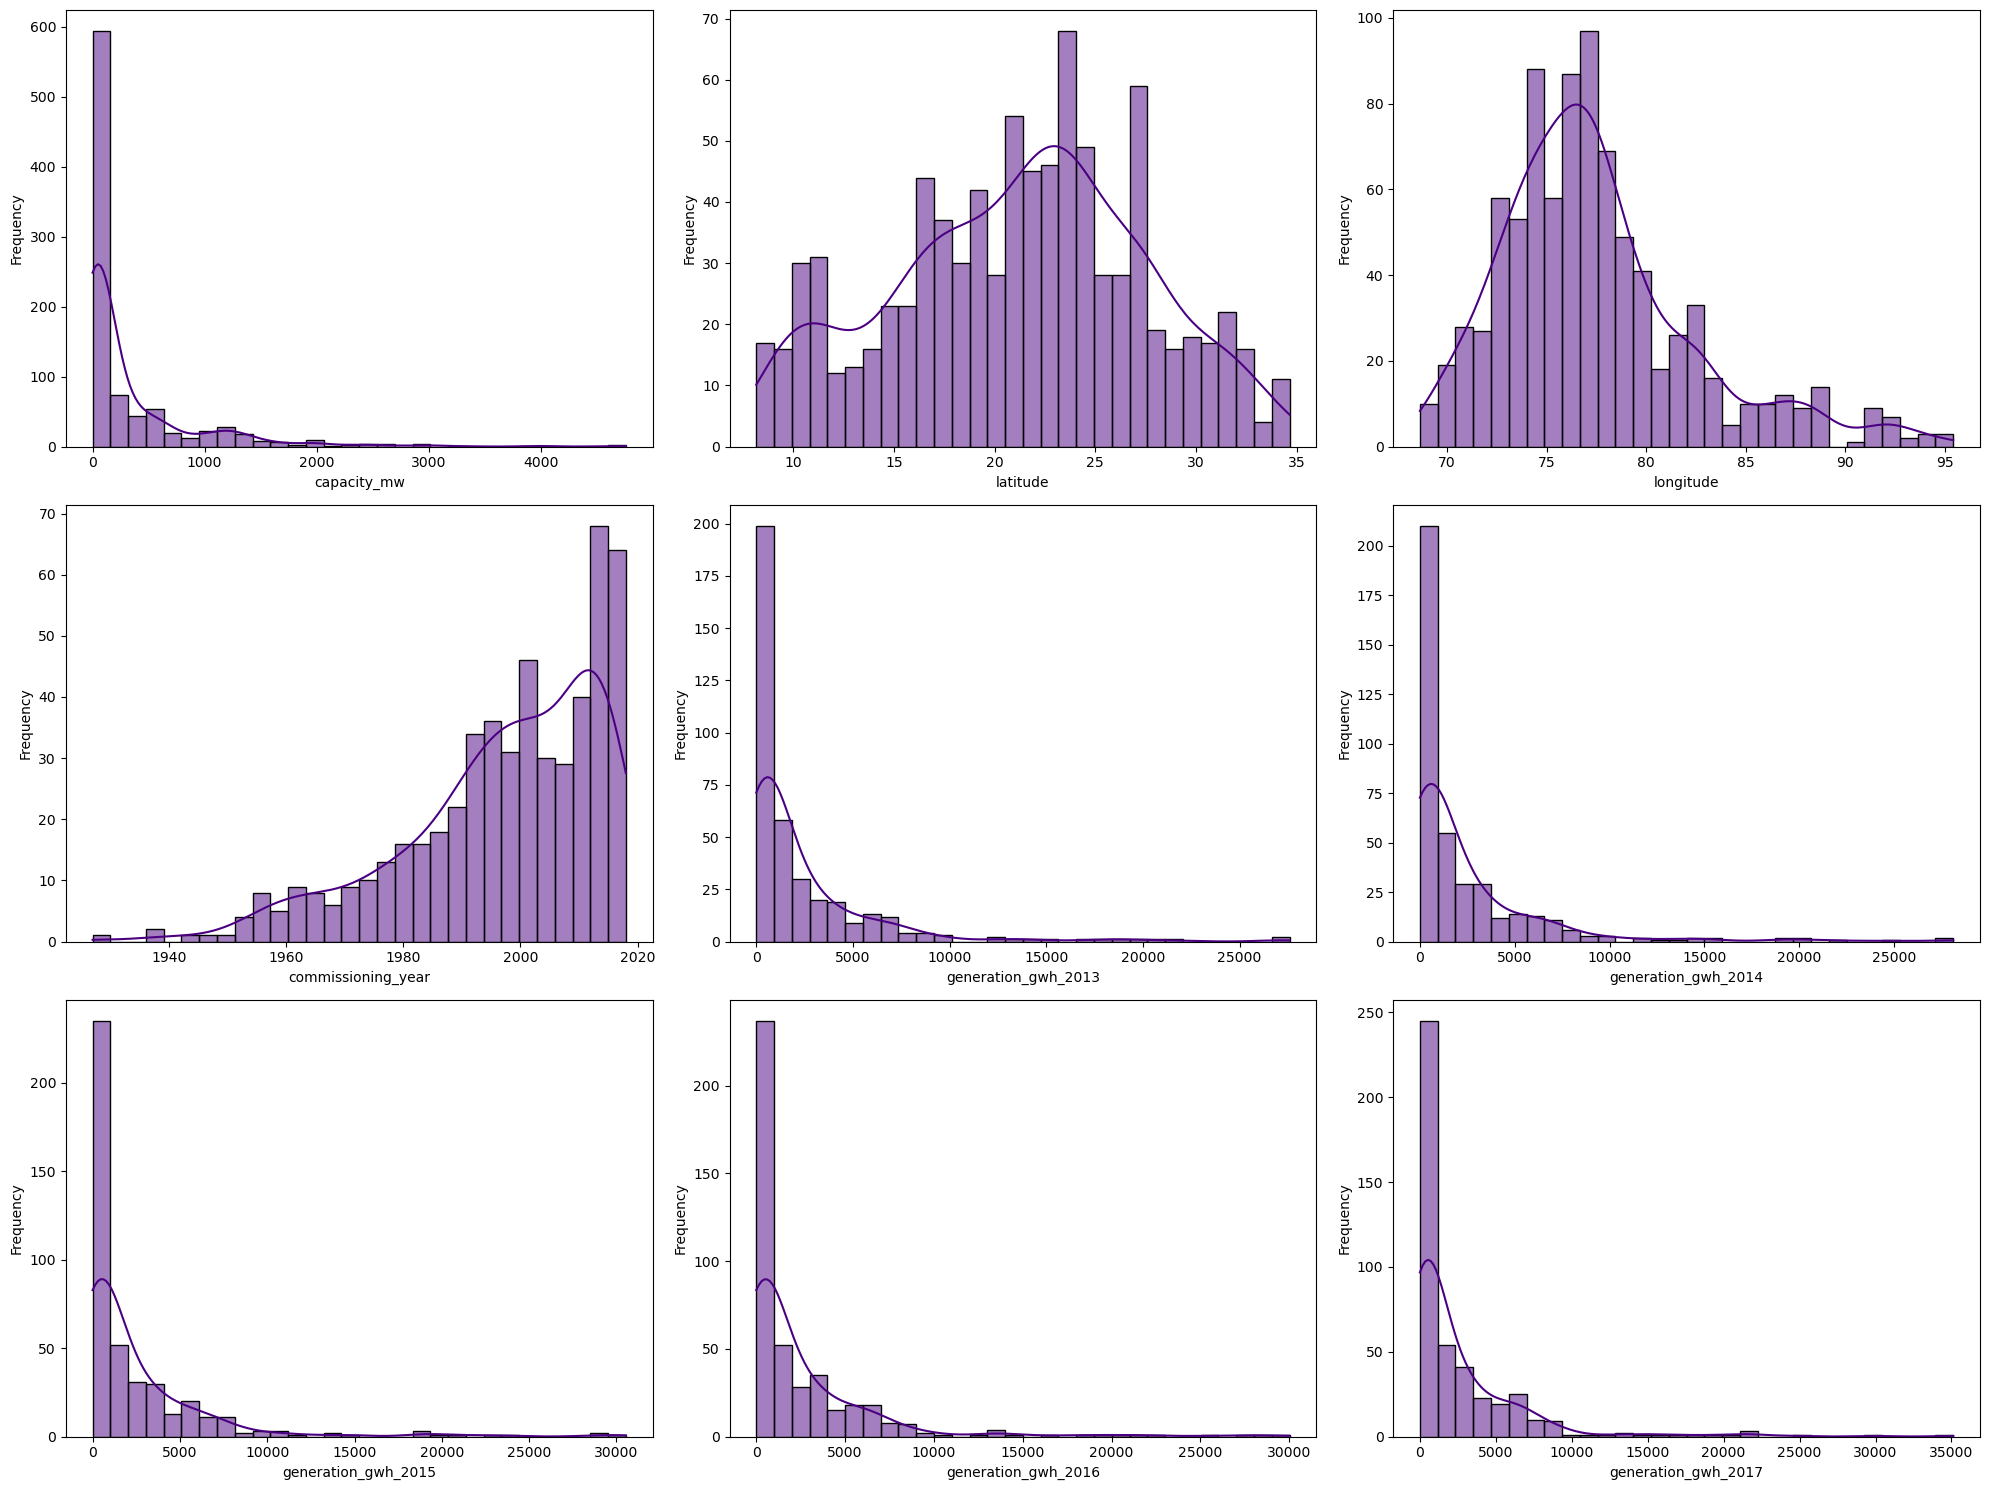

In [42]:
# List of columns to visualize skewness
columns_Skewness = ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 
                   'generation_gwh_2013', 'generation_gwh_2014', 
                   'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']

# plot
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_Skewness, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30, color='indigo', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()


# Imputing Latitude and Longitude

In [43]:
df['latitude'].fillna(df['latitude'].mean(),inplace = True)
df['longitude'].fillna(df['longitude'].mean(),inplace = True)

In [44]:
#checking
df[['latitude', 'longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

# Imputing generation_gwh_2013 to generation_gwh_2017

In [45]:
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(), inplace=True)

In [46]:
df['generation_gwh_2013'].isnull().sum()
df['generation_gwh_2014'].isnull().sum()
df['generation_gwh_2015'].isnull().sum()
df['generation_gwh_2016'].isnull().sum()
df['generation_gwh_2017'].isnull().sum()

0

In [47]:
df['commissioning_year'].value_counts()

commissioning_year
2013.0    28
2015.0    26
2012.0    23
2016.0    21
2010.0    17
          ..
1946.0     1
1956.0     1
1937.0     1
1959.0     1
1953.0     1
Name: count, Length: 73, dtype: int64

In [48]:
df.head(2)

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal                 NaN   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0           797.063475               805.76            701.02725   
1           797.063475               805.76            701.02725   

   generation_gwh_2016  generation_gwh_2017  
0            716.72835             807.6017  
1            716.72835             807.6017

# imputing commission year

In [49]:
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)

In [50]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

<Axes: >

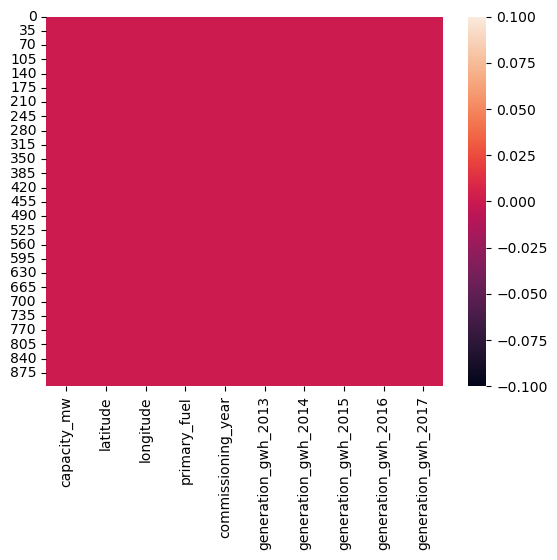

In [51]:
#lets visualise it using heatmap
sns.heatmap(df.isnull())

In [52]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

From above we can clearly visualise most of the columns are highly skewed to the right and one i.e., 'commission_year' is skewed to the left.

# Handling skewness

In [53]:
# List of columns to transform
columns_to_transform = ['capacity_mw','longitude', 'generation_gwh_2013', 
                        'generation_gwh_2014', 'generation_gwh_2015', 
                        'generation_gwh_2016', 'generation_gwh_2017']

# Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Applying the transformation to the specified columns
df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])


In [54]:
#checking whether it has been handled properly or not
skewness = df.select_dtypes(include=['float64']).skew()
print(skewness)

capacity_mw            0.020461
latitude              -0.147391
longitude              0.002419
commissioning_year    -1.779021
generation_gwh_2013    0.313991
generation_gwh_2014    0.286606
generation_gwh_2015    0.220431
generation_gwh_2016    0.201832
generation_gwh_2017    0.194047
dtype: float64


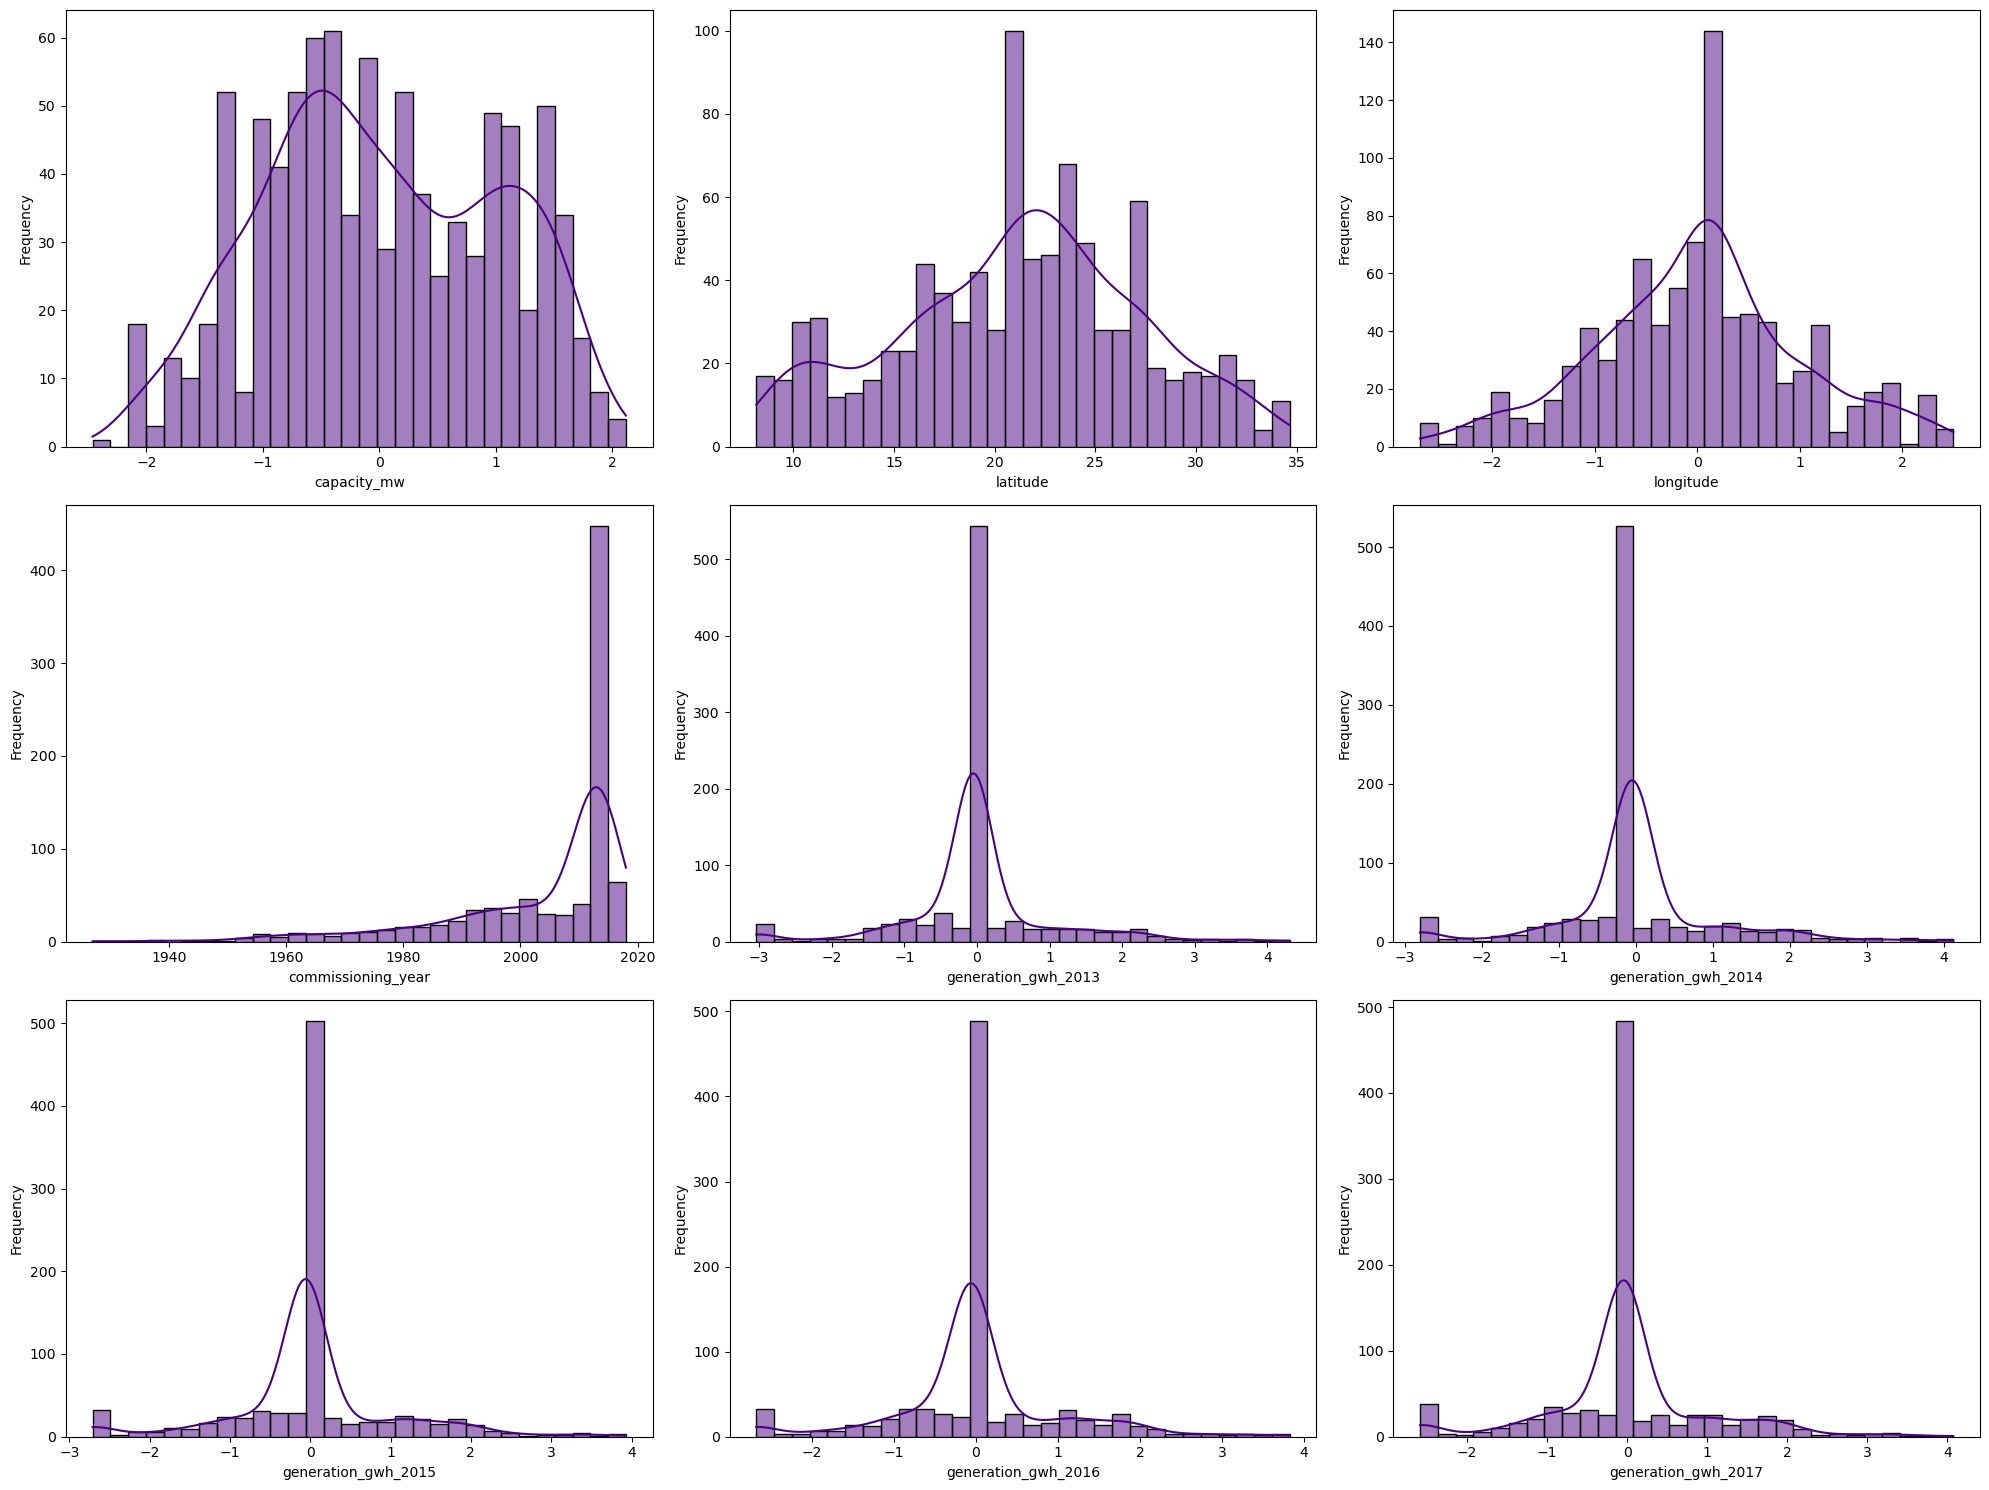

In [55]:
#lets visualise it once again after handling skewness

# List of columns to visualize skewness
columns_Skewness = ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 
                   'generation_gwh_2013', 'generation_gwh_2014', 
                   'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']

# Plot
plt.figure(figsize=(20, 15))
for i, col in enumerate(columns_Skewness, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30, color='indigo', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [56]:
#Drop commissioning_year or else it may create problem in Model Traning
df.drop (['commissioning_year'],axis = 1,inplace = True)

In [57]:
df.head(2)

capacity_mw  latitude  longitude primary_fuel  generation_gwh_2013  \
0    -1.695723   28.1839  -0.953208        Solar            -0.046712   
1     0.192511   24.7663  -0.545103         Coal            -0.046712   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            -0.045486            -0.053637            -0.054984   
1            -0.045486            -0.053637            -0.054984   

   generation_gwh_2017  
0            -0.038673  
1            -0.038673

# Encoding 'Target' column

In [58]:
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [59]:
df.head(2)

capacity_mw  latitude  longitude  primary_fuel  generation_gwh_2013  \
0    -1.695723   28.1839  -0.953208             6            -0.046712   
1     0.192511   24.7663  -0.545103             1            -0.046712   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            -0.045486            -0.053637            -0.054984   
1            -0.045486            -0.053637            -0.054984   

   generation_gwh_2017  
0            -0.038673  
1            -0.038673

In [60]:
df.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.060906   0.318641     -0.535251   
latitude                0.060906  1.000000  -0.035752     -0.013453   
longitude               0.318641 -0.035752   1.000000     -0.392806   
primary_fuel           -0.535251 -0.013453  -0.392806      1.000000   
generation_gwh_2013     0.330224  0.067483   0.043474     -0.158099   
generation_gwh_2014     0.342827  0.102010   0.037710     -0.158806   
generation_gwh_2015     0.362367  0.103013   0.039647     -0.176640   
generation_gwh_2016     0.383919  0.126207   0.089301     -0.195462   
generation_gwh_2017     0.370119  0.105159   0.074200     -0.176340   

                     generation_gwh_2013  generation_gwh_2014  \
capacity_mw                     0.330224             0.342827   
latitude                        0.067483             0.102010   
longitude                       0.043474             0.037710   
primary_fuel                   -0.158099            -0.158806   
generation_gwh_2013             1.000000             0.908630   
generation_gwh_2014             0.908630             1.000000   
generation_gwh_2015             0.800471             0.854783   
generation_gwh_2016             0.772575             0.816262   
generation_gwh_2017             0.713565             0.752825   

                     generation_gwh_2015  generation_gwh_2016  \
capacity_mw                     0.362367             0.383919   
latitude                        0.103013             0.126207   
longitude                       0.039647             0.089301   
primary_fuel                   -0.176640            -0.195462   
generation_gwh_2013             0.800471             0.772575   
generation_gwh_2014             0.854783             0.816262   
generation_gwh_2015             1.000000             0.897700   
generation_gwh_2016             0.897700             1.000000   
generation_gwh_2017             0.799131             0.903991   

                     generation_gwh_2017  
capacity_mw                     0.370119  
latitude                        0.105159  
longitude                       0.074200  
primary_fuel                   -0.176340  
generation_gwh_2013             0.713565  
generation_gwh_2014             0.752825  
generation_gwh_2015             0.799131  
generation_gwh_2016             0.903991  
generation_gwh_2017             1.000000

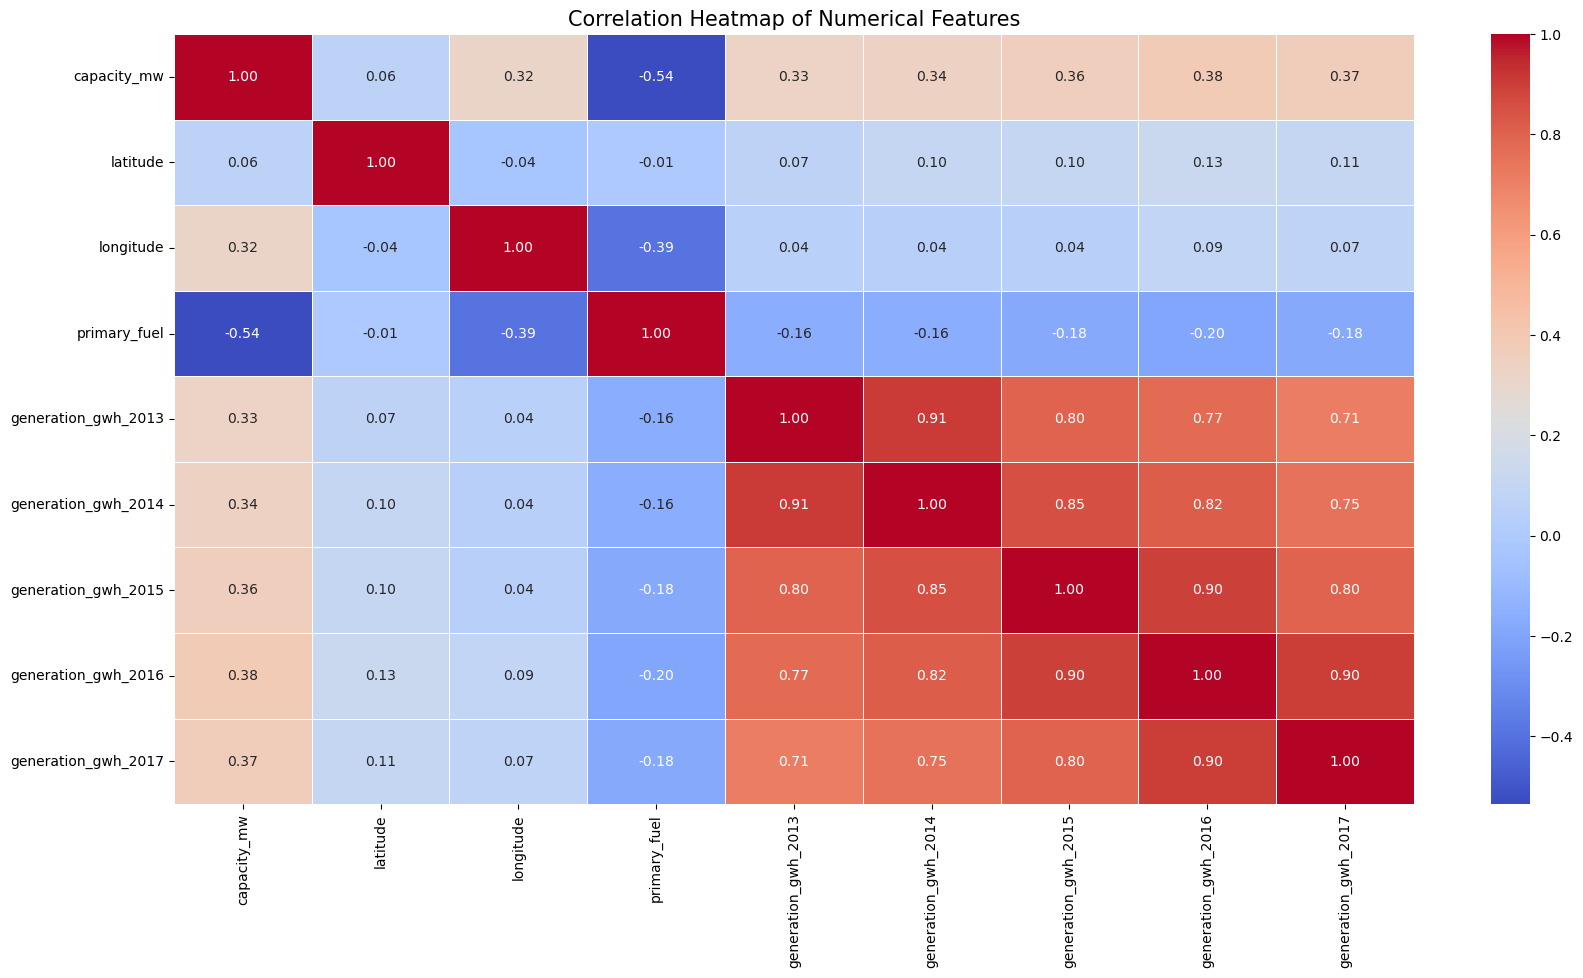

In [61]:
# Plot heatmap 
corr_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=15)
plt.show()

Negative correlation with primary fuel (-0.54), indicating that certain fuel types are associated with lower capacities.

Positive correlation with generation (GWh) values from 2013 to 2017, meaning plants with higher capacities tend to generate more electricity.

Very weak correlations with all other features, suggesting they don't have much impact on capacity or generation. This makes sense since geographical location might not directly influence how much a plant generates.

Shows a negative correlation with both capacity and generation. Different types of fuels may be associated with different plant sizes or efficiencies, hence this variation.

Strong positive correlations between all the generation years (from 2013 to 2017), meaning if a plant generates more electricity in one year, it’s likely to do so in other years as well.

# check outliers

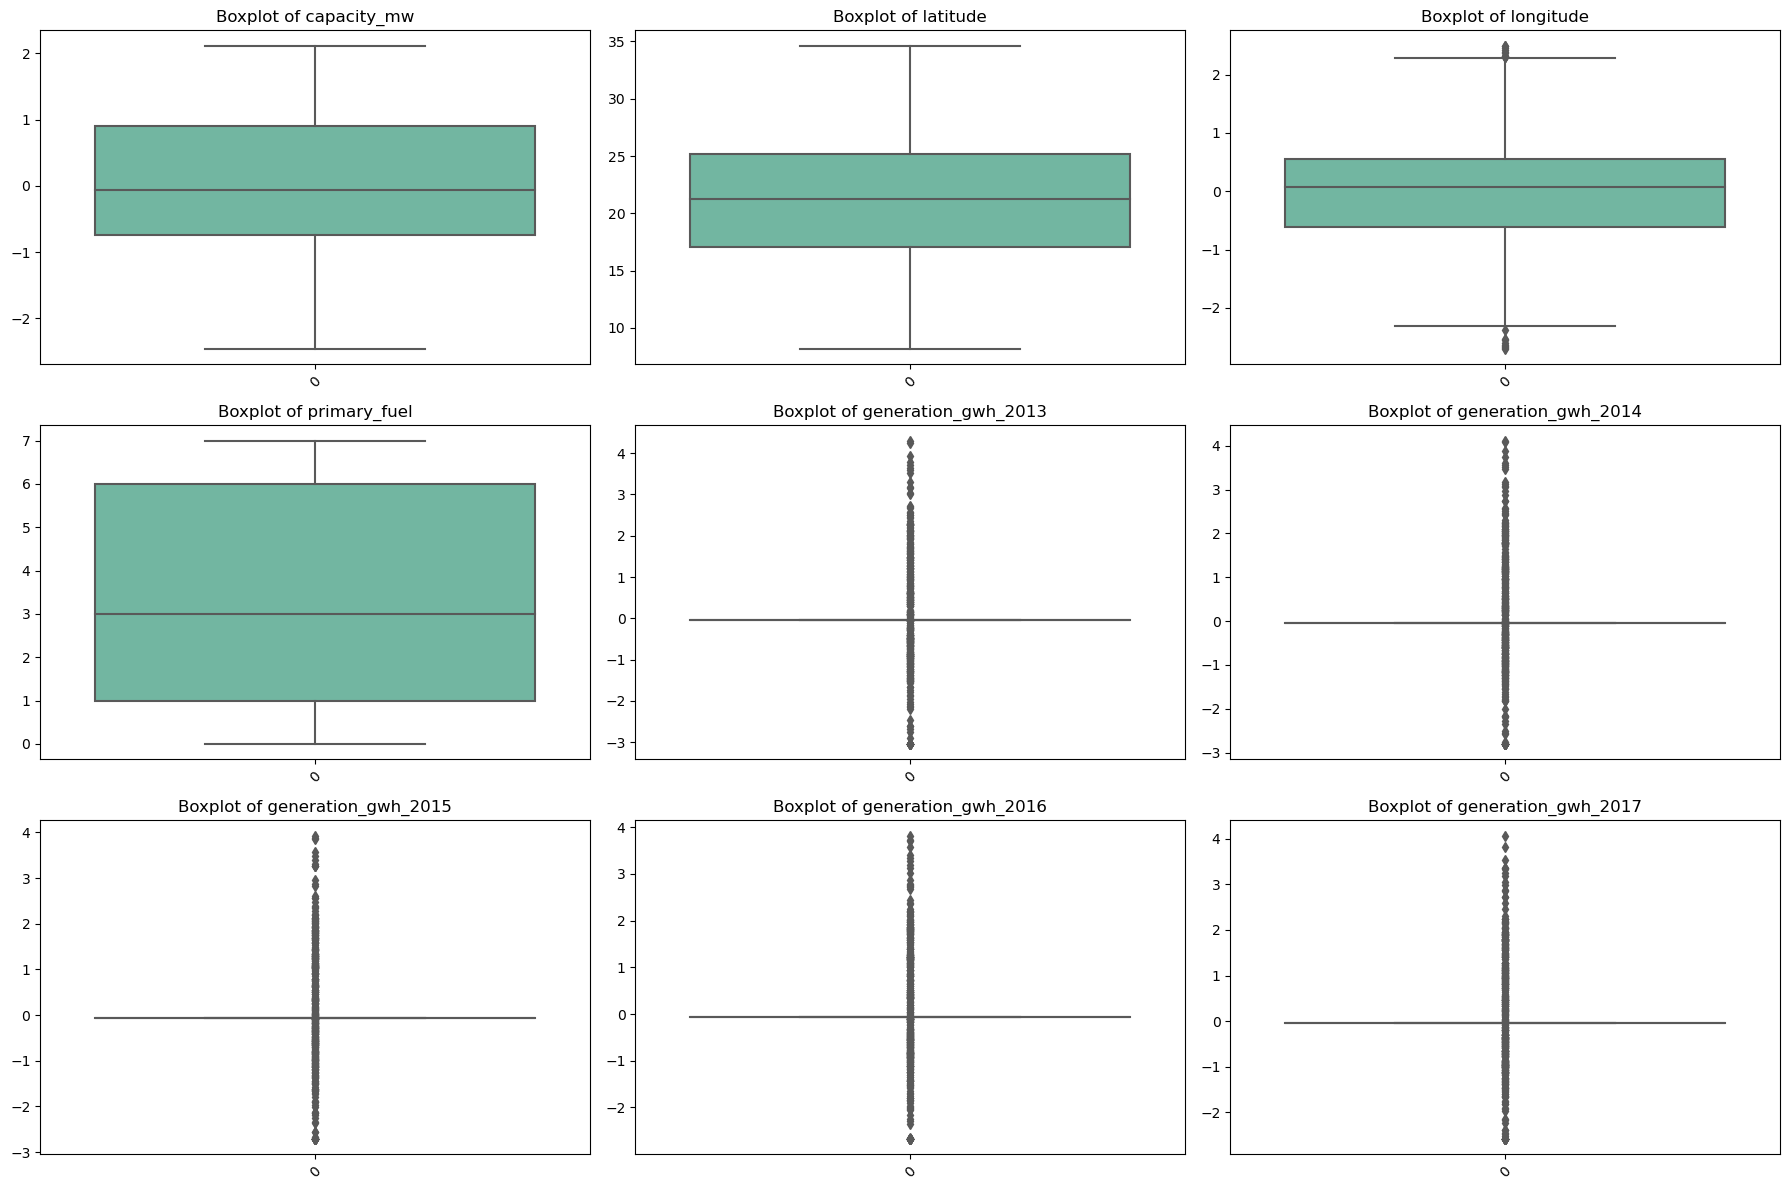

In [62]:
numerical_columns = ['capacity_mw', 'latitude', 'longitude','primary_fuel',
                     'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 
                     'generation_gwh_2016', 'generation_gwh_2017']


plt.figure(figsize=(18,12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(data=df[col], palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Longitude shows some significant outliers.These outliers may represent power plants located at unusual locations, which could be worth investigating

Each of the generation columns has a large number of outliers, This indicates that while most plants generate a similar amount of power, there are some that produce significantly more or less electricity than the rest, These could be outliers and might impact the analysis if not addressed.

The boxplot shows that the data is mostly spread out within a normal range, with no clear outliers. This suggests that most power plants have capacities that fall within a consistent range.

# Removing outliers using z-score

In [63]:
columns_to_check = ['latitude','longitude', 'generation_gwh_2013', 
                    'generation_gwh_2014', 'generation_gwh_2015', 
                    'generation_gwh_2016', 'generation_gwh_2017']

        
z = np.abs(zscore(df[columns_to_check]))

# Defining the threshold
threshold = 3

# Indices where Z-scores exceed the threshold
outliers = np.where(z > threshold)
print("Indices of outliers:", outliers)

# Filter out rows where any Z-score is greater than 3
df_cleaned = df[(z < threshold).all(axis=1)]

Indices of outliers: (array([ 23,  60,  73, 159, 169, 205, 210, 223, 260, 309, 309, 333, 359,
       365, 365, 365, 365, 365, 386, 421, 436, 469, 494, 494, 494, 494,
       494, 495, 495, 495, 495, 495, 526, 570, 590, 638, 649, 649, 649,
       649, 649, 651, 658, 658, 658, 658, 658, 696, 696, 696, 696, 722,
       722, 725, 727, 727, 727, 727, 727, 747, 787, 787, 787, 787, 787,
       792, 796, 809, 809, 809, 818, 881, 881, 881, 881, 881], dtype=int64), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 5, 6, 2, 2, 2, 2,
       2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 2, 2, 2, 2, 3, 4, 5, 6, 2, 2, 3,
       4, 5, 6, 3, 4, 5, 6, 2, 3, 2, 2, 3, 4, 5, 6, 2, 2, 3, 4, 5, 6, 2,
       2, 3, 4, 5, 2, 2, 3, 4, 5, 6], dtype=int64))


In [64]:
# Print the shape before and after removing outliers
print("Original df shape:", df.shape)
print("Df shape after removing outliers:", df_cleaned.shape)

Original df shape: (908, 9)
Df shape after removing outliers: (871, 9)


# Feature-Target Separation and Scaling

In [65]:
# Dividing the data into features and target variable
x = df_cleaned.drop(['capacity_mw'], axis=1)  
y = df_cleaned['capacity_mw']

In [66]:
x.shape

(871, 8)

In [67]:
y.shape

(871,)

In [68]:
#Applying  power transformation to scale features
x_scaled = power_transform(x, method='yeo-johnson')

In [69]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
# Function to calculate VIF
def calc_vif(x):
    vif_data = pd.DataFrame()
    vif_data['variables'] = x.columns
    vif_data['VIF FACTOR'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif_data

In [71]:
# Calculate VIF 
vif_result = calc_vif(pd.DataFrame(x_train))
print(vif_result)

             variables  VIF FACTOR
0             latitude    2.888756
1            longitude    1.180282
2         primary_fuel    3.066001
3  generation_gwh_2013    3.827100
4  generation_gwh_2014    4.701895
5  generation_gwh_2015    5.685138
6  generation_gwh_2016    9.663890
7  generation_gwh_2017    4.860204


# Modeling

# 1.Linear Regression

In [73]:
#Model Training
model = LinearRegression()
model.fit(x_train, y_train)

#prediction
lr_pred = model.predict(x_test)


# Calculate 
mae = mean_absolute_error(y_test, lr_pred)  
mse = mean_squared_error(y_test, lr_pred)  
rmse = mean_squared_error(y_test, lr_pred, squared=False)  
r2 = r2_score(y_test, lr_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.7040961237729406
Mean Squared Error (MSE): 0.6932332945426671
Root Mean Squared Error (RMSE): 0.8326063262687038
R² Score: 0.35895132760286785


# 2.Randonforest regressor

In [74]:
#Model Training
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(x_train, y_train)

#Prediction
rf_pred = model.predict(x_test)


# Calculate 
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = mean_squared_error(y_test, rf_pred, squared=False)
r2 = r2_score(y_test, rf_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.2823509759991912
Mean Squared Error (MSE): 0.16062284898320014
Root Mean Squared Error (RMSE): 0.4007778050032214
R² Score: 0.8514683802582594


# 3. Decision Tree Regressor

In [75]:
# Model Training
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

# Prediction
dt_pred = dt_model.predict(x_test)

# Calculate
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
dt_r2 = r2_score(y_test, dt_pred)



print(f"Mean Absolute Error (MAE): {dt_mae}")
print(f"Mean Squared Error (MSE): {dt_mse}")
print(f"Root Mean Squared Error (RMSE): {dt_rmse}")
print(f"R² Score: {dt_r2}\n")

Mean Absolute Error (MAE): 0.361554692924608
Mean Squared Error (MSE): 0.2629620707166434
Root Mean Squared Error (RMSE): 0.5127982748768207
R² Score: 0.7568329627980241



# 4.KNeighborsRegressor

In [76]:
# Model Training
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

# Prediction
knn_pred = knn_model.predict(x_test)

# Calculate 
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
knn_r2 = r2_score(y_test, knn_pred)



print(f"Mean Absolute Error (MAE): {knn_mae}")
print(f"Mean Squared Error (MSE): {knn_mse}")
print(f"Root Mean Squared Error (RMSE): {knn_rmse}")
print(f"R² Score: {knn_r2}\n")

Mean Absolute Error (MAE): 0.42606647022244926
Mean Squared Error (MSE): 0.3447972477572445
Root Mean Squared Error (RMSE): 0.5871943866874448
R² Score: 0.6811581041173398



# 5.Gradient Boosting Regressor

In [77]:
# Model Training
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

# Prediction
gb_pred = gb_model.predict(x_test)

# Calculate 
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
gb_r2 = r2_score(y_test, gb_pred)

# Print 
print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse}")
print(f"R² Score: {gb_r2}\n")

Mean Absolute Error (MAE): 0.31822507466658106
Mean Squared Error (MSE): 0.19318186019377323
Root Mean Squared Error (RMSE): 0.43952458428826624
R² Score: 0.8213603184046079



# Hyperparameter Tunning & Cross- Validation

 #checking for top two best models

# a.For randomforest

In [78]:
# Set hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initialize
rf_model = RandomForestRegressor(random_state=42)

# Setting up the grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                               cv=5, scoring='r2', verbose=1)

# Fit 
grid_search_rf.fit(x_train, y_train)

# Best parameters
best_rf_params = grid_search_rf.best_params_
print("Best RF Parameters:", best_rf_params)

# Evaluate
cv_scores_rf = cross_val_score(grid_search_rf.best_estimator_, x_train, y_train, cv=5, scoring='r2')
print("RF R² Cross-Validation Scores:", cv_scores_rf)
print("Mean R² Score:", cv_scores_rf.mean())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best RF Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
RF R² Cross-Validation Scores: [0.69431304 0.72285005 0.77556048 0.83760061 0.7425969 ]
Mean R² Score: 0.7545842189032242


# b.Gradientboosting

In [79]:
# Set hyperparameter grid
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Setting up the grid search with cross-validation
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, 
                               cv=5, scoring='r2', verbose=1)

# Fit
grid_search_gb.fit(x_train, y_train)

# Best parameters
best_gb_params = grid_search_gb.best_params_
print("Best Gradient Boosting Parameters:", best_gb_params)

# Evaluate 
cv_scores_gb = cross_val_score(grid_search_gb.best_estimator_, x_train, y_train, cv=5, scoring='r2')
print("Gradient Boosting R² Cross-Validation Scores:", cv_scores_gb)
print("Mean R² Score:", cv_scores_gb.mean())


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Gradient Boosting R² Cross-Validation Scores: [0.71392029 0.72686185 0.79376647 0.82726881 0.74899006]
Mean R² Score: 0.7621614961511437


# Save the best model

#Overall we founf Random forest to be best 

In [80]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, 'random_forest_model.pkl')

print("Random Forest model saved successfully!")


Random Forest model saved successfully!


# --------------------------------------------------------------------

# seperating the feature and level variable into x and y

In [81]:
x_class = df_cleaned.drop(['primary_fuel'], axis=1)  
y_class = df_cleaned['primary_fuel']  

In [82]:
x.shape

(871, 8)

In [83]:
y.shape

(871,)

In [84]:
df.skew()

capacity_mw            0.020461
latitude              -0.147391
longitude              0.002419
primary_fuel           0.471141
generation_gwh_2013    0.313991
generation_gwh_2014    0.286606
generation_gwh_2015    0.220431
generation_gwh_2016    0.201832
generation_gwh_2017    0.194047
dtype: float64

In [85]:
#Applying  power transformation to scale features
x_scaled = power_transform(x, method='yeo-johnson')

In [86]:
# Splitting the data into training and testing sets
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class, y_class, test_size=0.2, random_state=42)

In [87]:
# Function to calculate VIF
def calc_vif(x):
    vif_data = pd.DataFrame()
    vif_data['variables'] = x.columns
    vif_data['VIF FACTOR'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif_data

In [88]:
# Calculate VIF 
vif_result = calc_vif(pd.DataFrame(x_train))
print(vif_result)

             variables  VIF FACTOR
0             latitude    2.888756
1            longitude    1.180282
2         primary_fuel    3.066001
3  generation_gwh_2013    3.827100
4  generation_gwh_2014    4.701895
5  generation_gwh_2015    5.685138
6  generation_gwh_2016    9.663890
7  generation_gwh_2017    4.860204


#we can proced for modeling

# Modeling

# 1.Randomforest Classifier

In [89]:
# Initialize 
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training
clf.fit(x_train_class, y_train_class)

# Prediction 
y_pred_class = clf.predict(x_test_class)

In [90]:
# Accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"RandomForest Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
class_report = classification_report(y_test_class, y_pred_class)
print(f"Classification Report:\n{class_report}")

RandomForest Accuracy: 0.7257142857142858
Confusion Matrix:
[[ 7  1  0  0  0  0  1  1]
 [ 2 41  2  4  0  0  0  1]
 [ 0  3  2  5  0  0  0  0]
 [ 3  5  1 40  0  2  1  4]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0 27  0]
 [ 1  0  0  3  0  0  3 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.77      0.82      0.80        50
           2       0.33      0.20      0.25        10
           3       0.75      0.71      0.73        56
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.84      0.96      0.90        28
           7       0.62      0.59      0.61        17

    accuracy                           0.73       175
   macro avg       0.48      0.50      0.49       175
weighted avg       0.71      0.73      0.71       175



# 2.Logistic Regression Classifier

In [91]:
# Initialization
log_reg = LogisticRegression(random_state=42)

# Training
log_reg.fit(x_train_class, y_train_class)

# Prediction 
log_reg_pred = log_reg.predict(x_test_class)

In [92]:
# Accuracy
accuracy = accuracy_score(y_test_class, log_reg_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, log_reg_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
class_report = classification_report(y_test_class, log_reg_pred)
print(f"Classification Report:\n{class_report}")

Logistic Regression Accuracy: 0.5314285714285715
Confusion Matrix:
[[ 0  0  0  1  0  0  0  9]
 [ 0 25  3 18  0  0  0  4]
 [ 0  5  0  5  0  0  0  0]
 [ 0  8  0 33  0  0 10  5]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0 23  2]
 [ 0  0  0  2  0  0  3 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.61      0.50      0.55        50
           2       0.00      0.00      0.00        10
           3       0.52      0.59      0.55        56
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.64      0.82      0.72        28
           7       0.38      0.71      0.49        17

    accuracy                           0.53       175
   macro avg       0.27      0.33      0.29       175
weighted avg       0.48      0.53      0.50       175



# KNN Classifier

In [93]:
# Initialization
knn = KNeighborsClassifier(n_neighbors=5)

# Training
knn.fit(x_train_class, y_train_class)

# Prediction 
knn_pred = knn.predict(x_test_class)

In [94]:
#Accuracy
accuracy = accuracy_score(y_test_class, knn_pred)
print(f"KNN Classifier Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, knn_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
class_report = classification_report(y_test_class, knn_pred)
print(f"Classification Report:\n{class_report}")

KNN Classifier Accuracy: 0.6742857142857143
Confusion Matrix:
[[ 8  0  0  0  0  0  0  2]
 [ 1 40  2  6  0  0  1  0]
 [ 0  4  0  5  0  0  0  1]
 [ 7  5  0 33  0  0  1 10]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  0  3  0  0 22  1]
 [ 1  0  0  0  0  0  1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.74      0.80      0.77        50
           2       0.00      0.00      0.00        10
           3       0.69      0.59      0.63        56
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.88      0.79      0.83        28
           7       0.52      0.88      0.65        17

    accuracy                           0.67       175
   macro avg       0.41      0.48      0.43       175
weighted avg       0.65      0.67      0.65       175



# 4. Decision Tree Classifier

In [95]:
# Initialization
dt = DecisionTreeClassifier(random_state=42)

# Training
dt.fit(x_train_class, y_train_class)

# Prediction
dt_pred = dt.predict(x_test_class)

In [96]:
# Accuracy
accuracy = accuracy_score(y_test_class, dt_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, dt_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
class_report = classification_report(y_test_class, dt_pred)
print(f"Classification Report:\n{class_report}")

Decision Tree Classifier Accuracy: 0.6742857142857143
Confusion Matrix:
[[ 2  2  1  1  0  0  1  3]
 [ 1 37  5  6  0  0  0  1]
 [ 0  2  4  3  0  0  1  0]
 [ 1  5  1 42  0  2  0  5]
 [ 0  3  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  1  2  0  0 22  3]
 [ 0  0  0  4  0  0  2 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.76      0.74      0.75        50
           2       0.33      0.40      0.36        10
           3       0.72      0.75      0.74        56
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.85      0.79      0.81        28
           7       0.48      0.65      0.55        17

    accuracy                           0.67       175
   macro avg       0.44      0.44      0.43       175
weighted avg       0.67      0.67      0.67       175



# 5.Gradient Boosting Classifier

In [97]:
# Initialization
gbc = GradientBoostingClassifier(random_state=42)

# Training
gbc.fit(x_train_class, y_train_class)

# Prediction
gbc_pred = gbc.predict(x_test_class)

In [98]:
# Accuracy
accuracy = accuracy_score(y_test_class, gbc_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test_class, gbc_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
class_report = classification_report(y_test_class, gbc_pred)
print(f"Classification Report:\n{class_report}")

Gradient Boosting Classifier Accuracy: 0.72
Confusion Matrix:
[[ 5  0  0  0  0  0  1  4]
 [ 2 39  3  5  0  0  0  1]
 [ 0  4  0  4  0  1  1  0]
 [ 2  3  0 45  0  0  2  4]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  2  0  0 24  2]
 [ 0  0  0  2  0  0  3 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       0.80      0.78      0.79        50
           2       0.00      0.00      0.00        10
           3       0.78      0.80      0.79        56
           4       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         1
           6       0.77      0.86      0.81        28
           7       0.52      0.71      0.60        17

    accuracy                           0.72       175
   macro avg       0.49      0.58      0.52       175
weighted avg       0.68      0.72      0.70       175



# Confusion Matrix plot for best two 

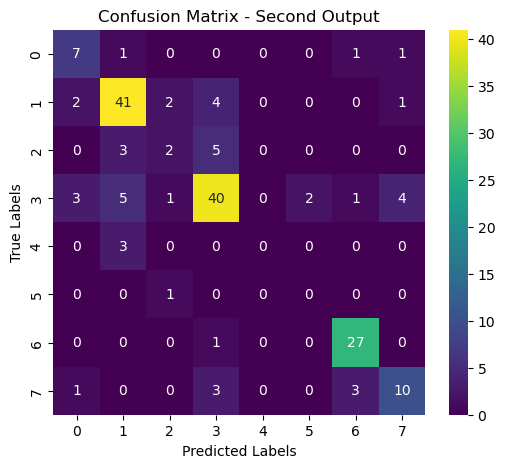

In [99]:
# Plot(For RandomForest)

cm2 = np.array([[ 7,  1,  0,  0,  0,  0,  1,  1],
                 [ 2, 41,  2,  4,  0,  0,  0,  1],
                 [ 0,  3,  2,  5,  0,  0,  0,  0],
                 [ 3,  5,  1, 40,  0,  2,  1,  4],
                 [ 0,  3,  0,  0,  0,  0,  0,  0],
                 [ 0,  0,  1,  0,  0,  0,  0,  0],
                 [ 0,  0,  0,  1,  0,  0, 27,  0],
                 [ 1,  0,  0,  3,  0,  0,  3, 10]])


plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix - Second Output')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

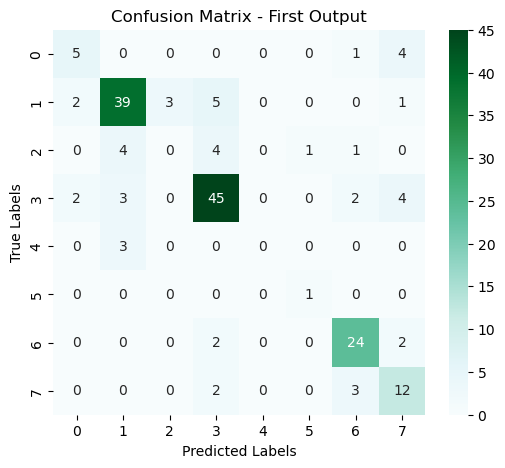

In [100]:
# Plot
cm1 = np.array([[ 5,  0,  0,  0,  0,  0,  1,  4],
                 [ 2, 39,  3,  5,  0,  0,  0,  1],
                 [ 0,  4,  0,  4,  0,  1,  1,  0],
                 [ 2,  3,  0, 45,  0,  0,  2,  4],
                 [ 0,  3,  0,  0,  0,  0,  0,  0],
                 [ 0,  0,  0,  0,  0,  1,  0,  0],
                 [ 0,  0,  0,  2,  0,  0, 24,  2],
                 [ 0,  0,  0,  2,  0,  0,  3, 12]])


plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='BuGn')
plt.title('Confusion Matrix - First Output')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Hyperparameter Tunning and cross validation for top two best model

In [101]:
# RandomForest Classifier
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialization
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                        scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit
grid_rf.fit(x_train_class, y_train_class)

# Best parameters and score
print(f"Best Parameters: {grid_rf.best_params_}")
print(f"Best Score: {grid_rf.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.7039465570400822


In [103]:
# Gradient Boosting Clasifier
gb = GradientBoostingClassifier(random_state=42)


param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb,
                        scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_gb.fit(x_train_class, y_train_class)

# Best parameters and score
print(f"Best Parameters: {grid_gb.best_params_}")
print(f"Best Score: {grid_gb.best_score_}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.6953751284686537


# Save the Model

In [104]:
import joblib

best_rf_model = grid_rf.best_estimator_

# Save the best model
joblib.dump(best_rf_model, 'best_random_forest_model.joblib')

print("Best Model - Random Forest Model saved successfully.")



Best Model - Random Forest Model saved successfully.


# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# Temperature Forecast Project using ML

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv ')

df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [72]:
df.head(5)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

# Exploratory Data Analysis(EDA)

In [73]:
df.shape

(7752, 25)

In [74]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [75]:
#checking data types of each column
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [76]:
#checking missing values in each column
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


<Axes: >

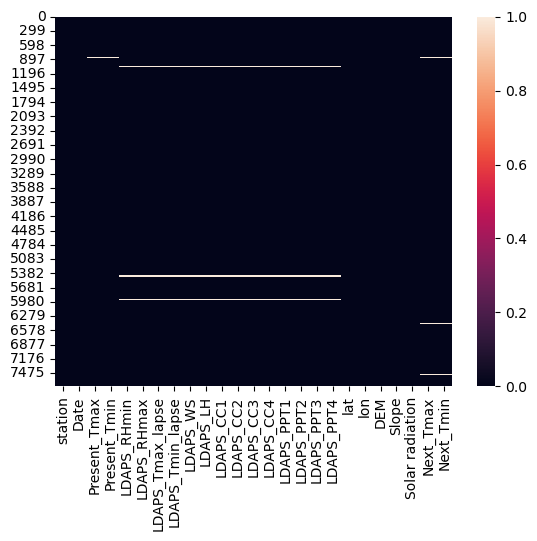

In [78]:
#lets visualise it using heatmap
sns.heatmap(df.isnull())

# Handling Missing Values

In [79]:
# "Filling the missing values in 'Date' and 'station' because there are only two empty rows for each."
df.loc[7750, 'Date'] = '31-08-2017'
df.loc[7751, 'Date'] = '31-08-2017'

df.loc[7750, 'station'] = 1.0
df.loc[7751, 'station'] = 2.0


In [80]:
df.tail(2)

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7750      1.0  31-08-2017          20.0          11.3    19.794666   
7751      2.0  31-08-2017          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  \
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.370   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.335   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[2 rows x 25 columns]

In [81]:
# Fill rest of the missing values with the mean 
columns_to_fill = [
    'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 
    'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 
    'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 
    'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 
    'Next_Tmax', 'Next_Tmin'
]

for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)  

In [82]:
#Rechecking missing values in each columns after filling all.
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

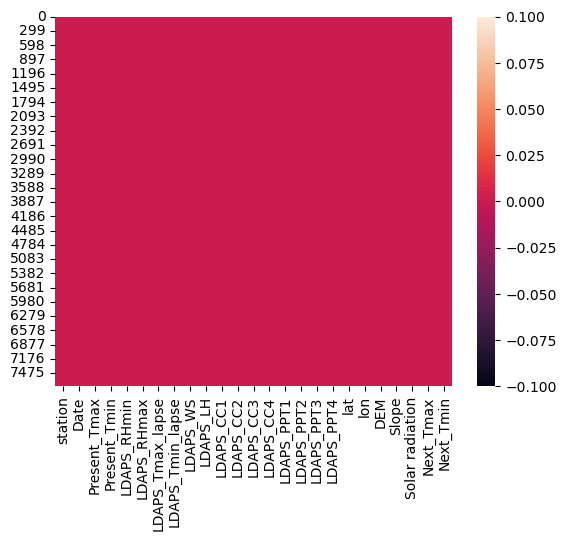

In [83]:
#lets visualise after filling all columns
sns.heatmap(df.isnull())

# Feature Engineering

In [84]:
# Lets change date column from object data type to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

In [85]:
#Extract useful date features (like year, month, day)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# drop  'Date' 
df.drop('Date', axis=1, inplace=True)


# skewness

In [86]:
df.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
year               -0.000365
month              -0.196329
day                -0.008989
dtype: float64

# Description

In [87]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.997033     29.768211     23.225059    56.759372    88.374804   
std       7.213007      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...    37.544722   126.991397    61.867972     1.257048   
std       0.261185  ...     0.050352     0.079435    54.279780     1.370444   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098475   
25%       0.148321  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.320110  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.571696  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin         year        month  \
count      7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean       5341.502803    30.274887    22.932220  2015.000516     7.467879   
std         429.158867     3.122557     2.483276     1.414487     0.530334   
min        4329.520508    17.400000    11.300000  2013.000000     6.000000   
25%        4999.018555    28.200000    21.400000  2014.000000     7.000000   
50%        5436.345215    30.500000    23.100000  2015.000000     7.000000   
75%        5728.316406    32.600000    24.600000  2016.000000     8.000000   
max        5992.895996    38.900000    29.800000  2017.000000     8.000000   

               day  
count  7752.000000  
mean     15.987745  
std       8.920757  
min       1.000000  
25%       8.000000  
50%      16.000000  
75%      24.000000  
max      31.000000  

[8 rows x 27 columns]

# Data Visulization

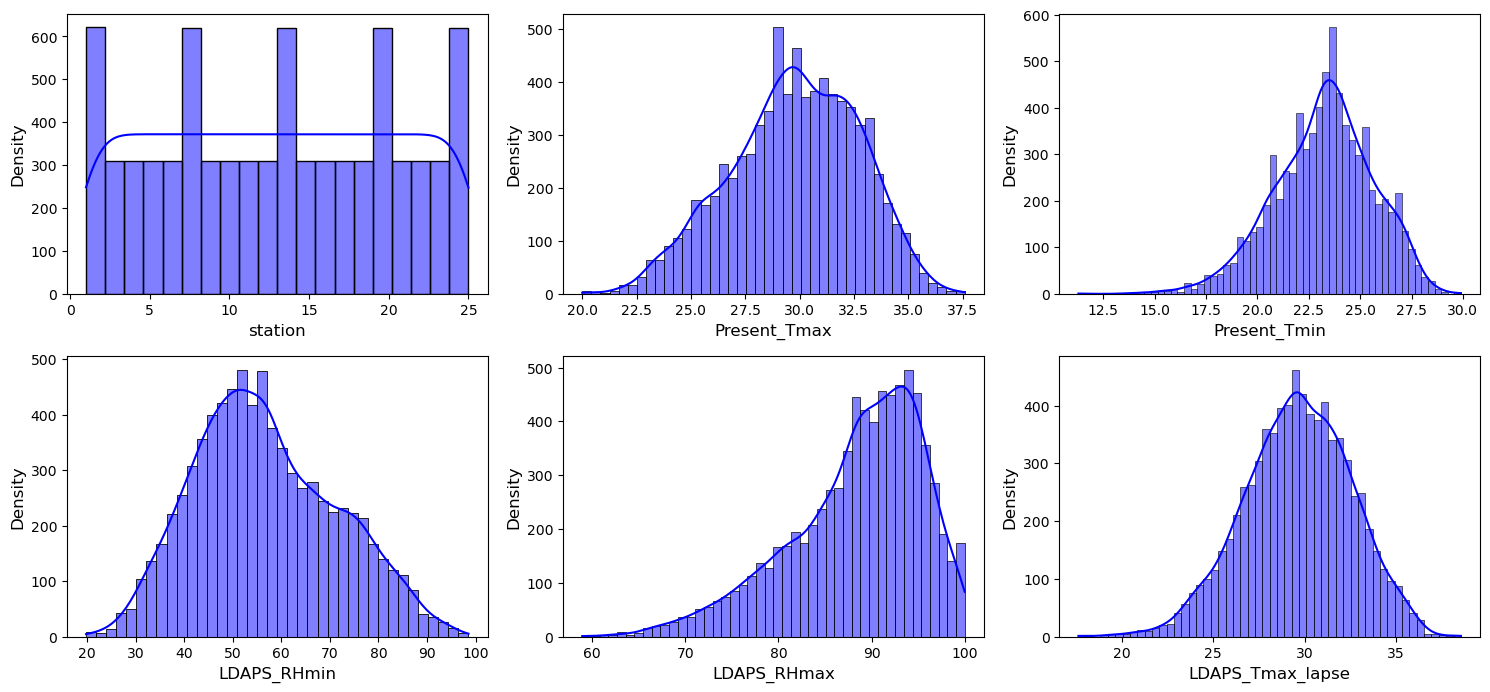

In [88]:
#Distribution Plots for All Columns in the Dataset
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:6], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], color='blue', kde=True)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.tight_layout()  
plt.show()

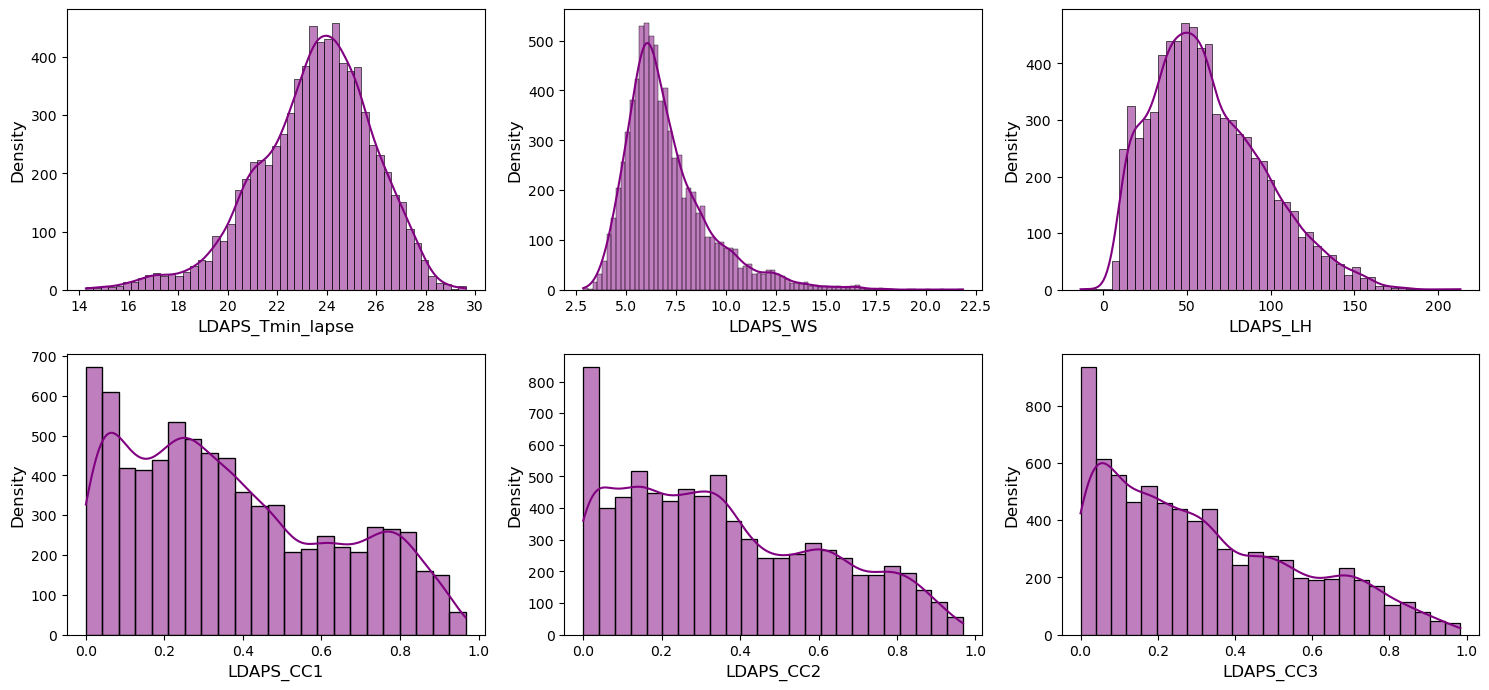

In [89]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[6:12], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], color='purple', kde=True)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.tight_layout()  
plt.show()

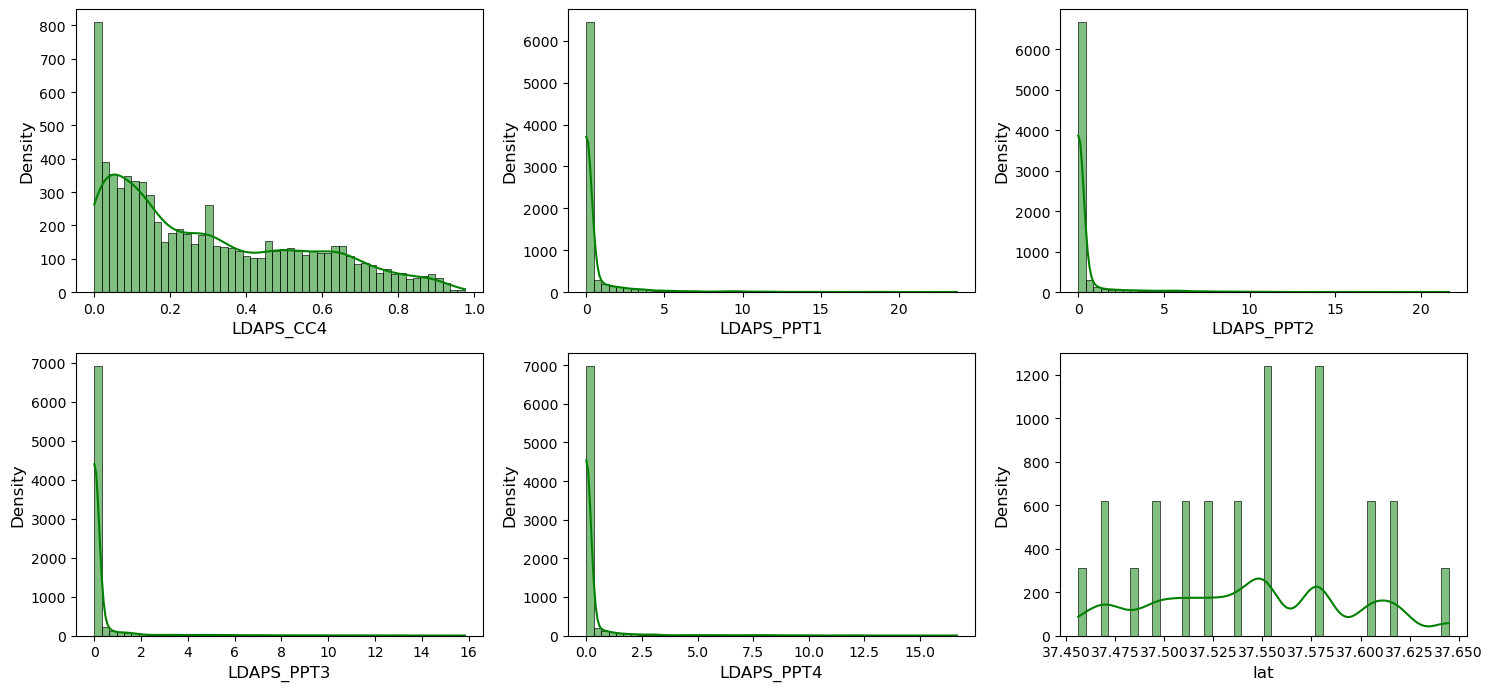

In [90]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[12:18], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], color='green', kde=True,bins =50)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.tight_layout()  
plt.show()

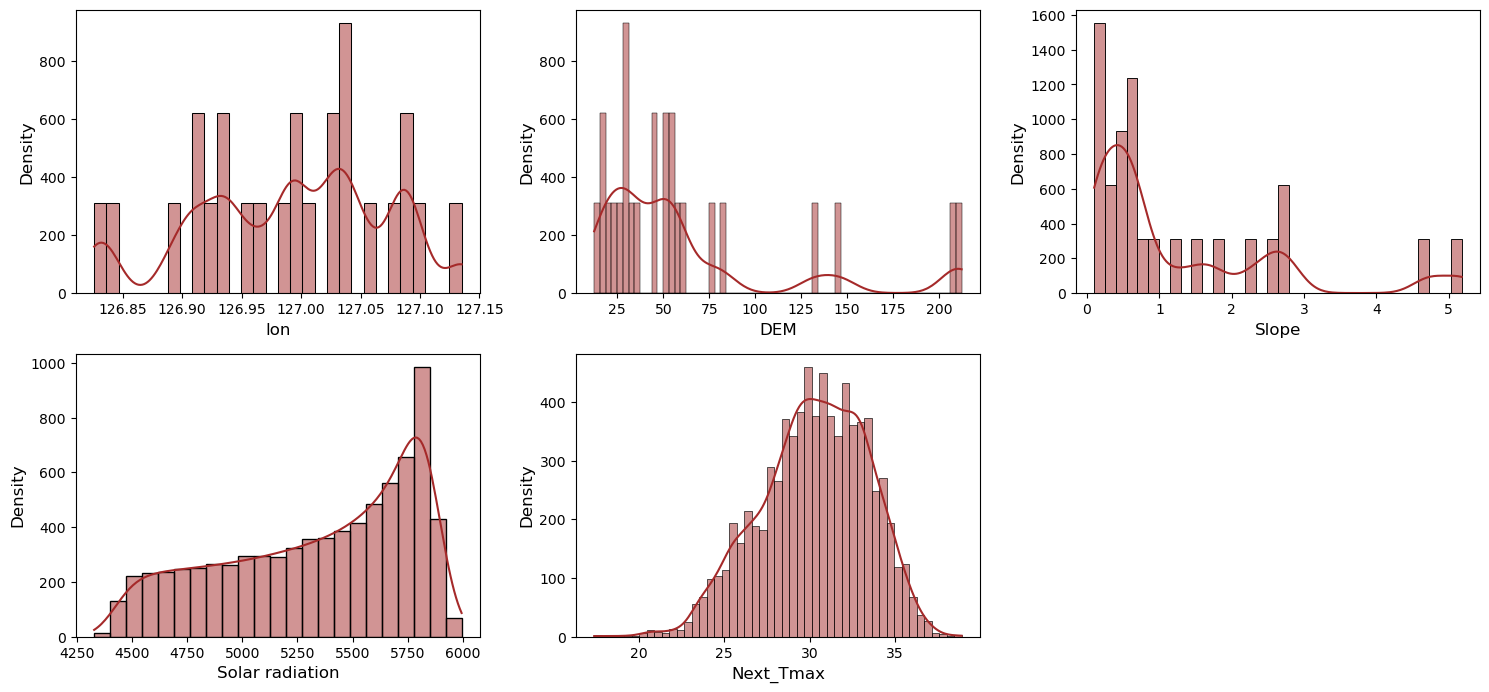

In [91]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[18:23], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], color='brown', kde=True)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.tight_layout()  
plt.show()

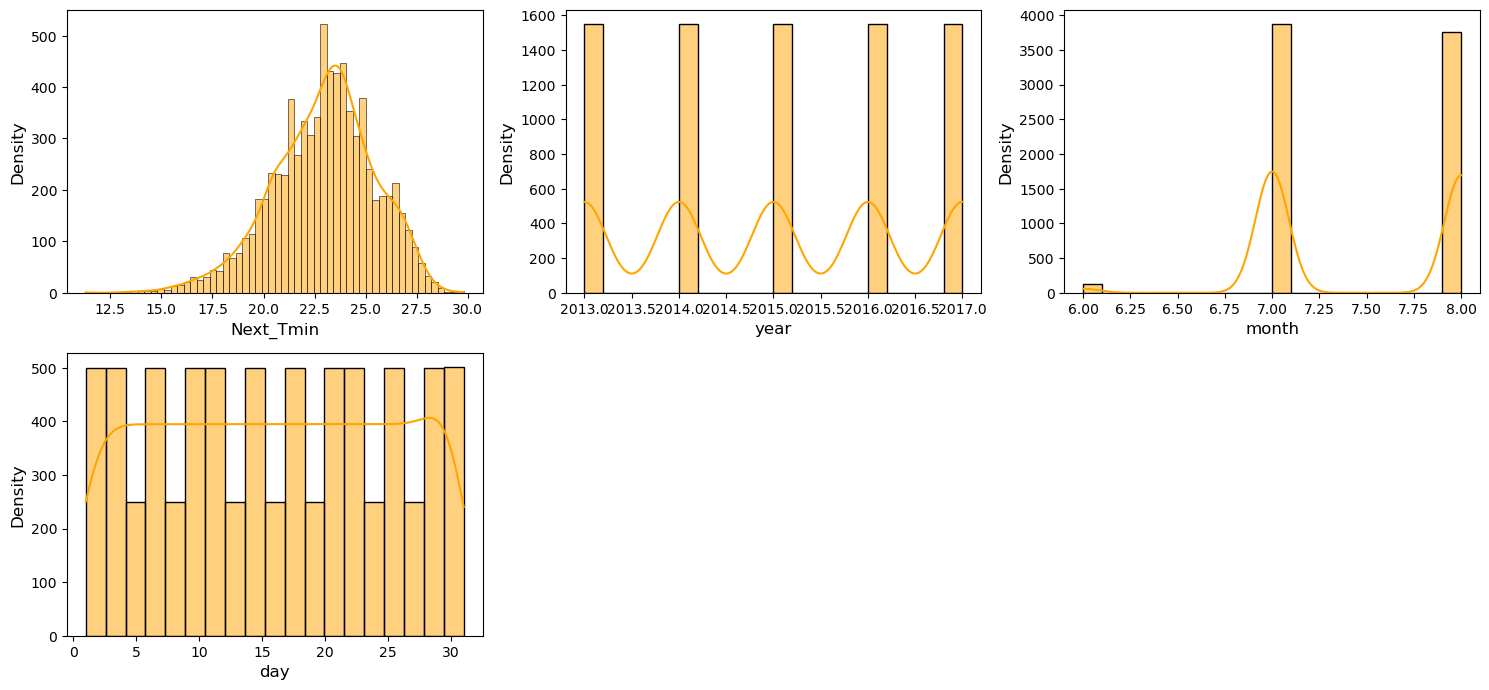

In [92]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[23:], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], color='orange', kde=True)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)

plt.tight_layout()  
plt.show()

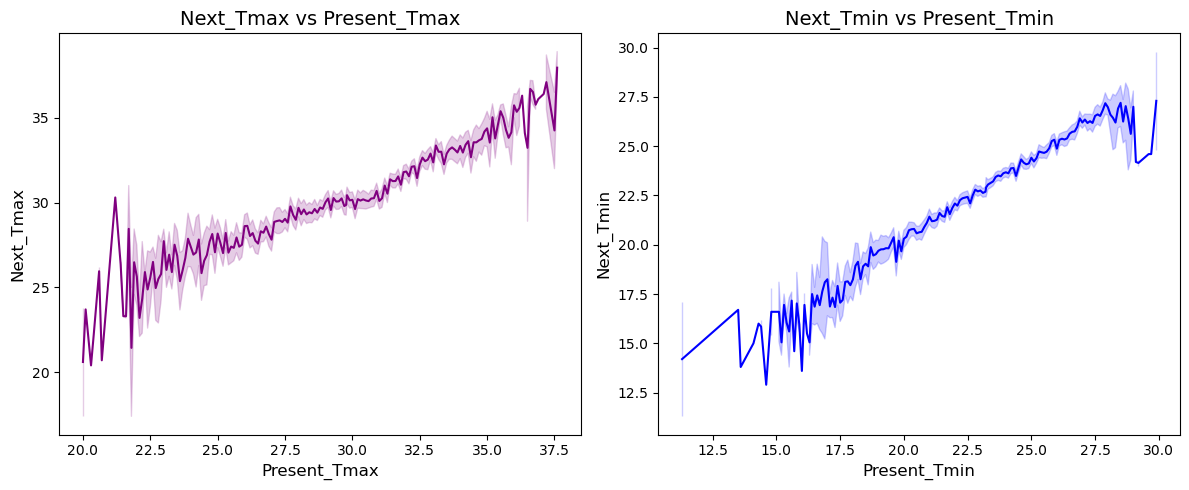

In [93]:
# lineplot to see relationship
plt.figure(figsize=(12, 5))


# Next_Tmax vs Present_Tmax
plt.subplot(1, 2, 1)
sns.lineplot(x=df['Present_Tmax'], y=df['Next_Tmax'], color='purple')
plt.xlabel('Present_Tmax', fontsize=12)
plt.ylabel('Next_Tmax', fontsize=12)
plt.title('Next_Tmax vs Present_Tmax', fontsize=14)

# Next_Tmin vs Present_Tmin
plt.subplot(1, 2, 2)
sns.lineplot(x=df['Present_Tmin'], y=df['Next_Tmin'], color='blue')
plt.xlabel('Present_Tmin', fontsize=12)
plt.ylabel('Next_Tmin', fontsize=12)
plt.title('Next_Tmin vs Present_Tmin', fontsize=14)

plt.tight_layout()
plt.show()

Next_Tmax vs Present_Tmax: The line plot indicates a positive relationship between present maximum temperatures and next maximum temperatures. As the present maximum temperature increases, the next maximum temperature also tends to increase, suggesting a consistent trend.

Next_Tmin vs Present_Tmin: Similarly, there is a positive correlation observed between present minimum temperatures and next minimum temperatures. Higher present minimum temperatures generally correspond to higher next minimum temperatures.

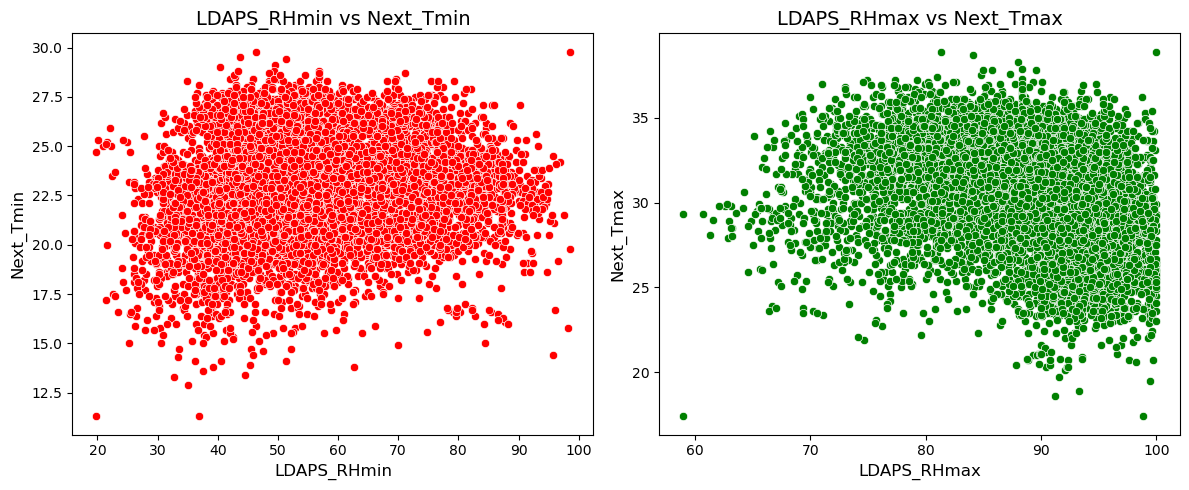

In [94]:
# Scatter plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['LDAPS_RHmin'], y=df['Next_Tmin'], color='red')
plt.xlabel('LDAPS_RHmin', fontsize=12)
plt.ylabel('Next_Tmin', fontsize=12)
plt.title('LDAPS_RHmin vs Next_Tmin', fontsize=14)


plt.subplot(1, 2, 2)
sns.scatterplot(x=df['LDAPS_RHmax'], y=df['Next_Tmax'], color='green')
plt.xlabel('LDAPS_RHmax', fontsize=12)
plt.ylabel('Next_Tmax', fontsize=12)
plt.title('LDAPS_RHmax vs Next_Tmax', fontsize=14)

plt.tight_layout()
plt.show()

LDAPS_RHmin vs Next_Tmin: No clear linear relationship; points are scattered without a defined trend.

LDAPS_RHmax vs Next_Tmax: A slight positive correlation; as maximum humidity increases, next day's maximum temperature tends to rise, but variability exists.

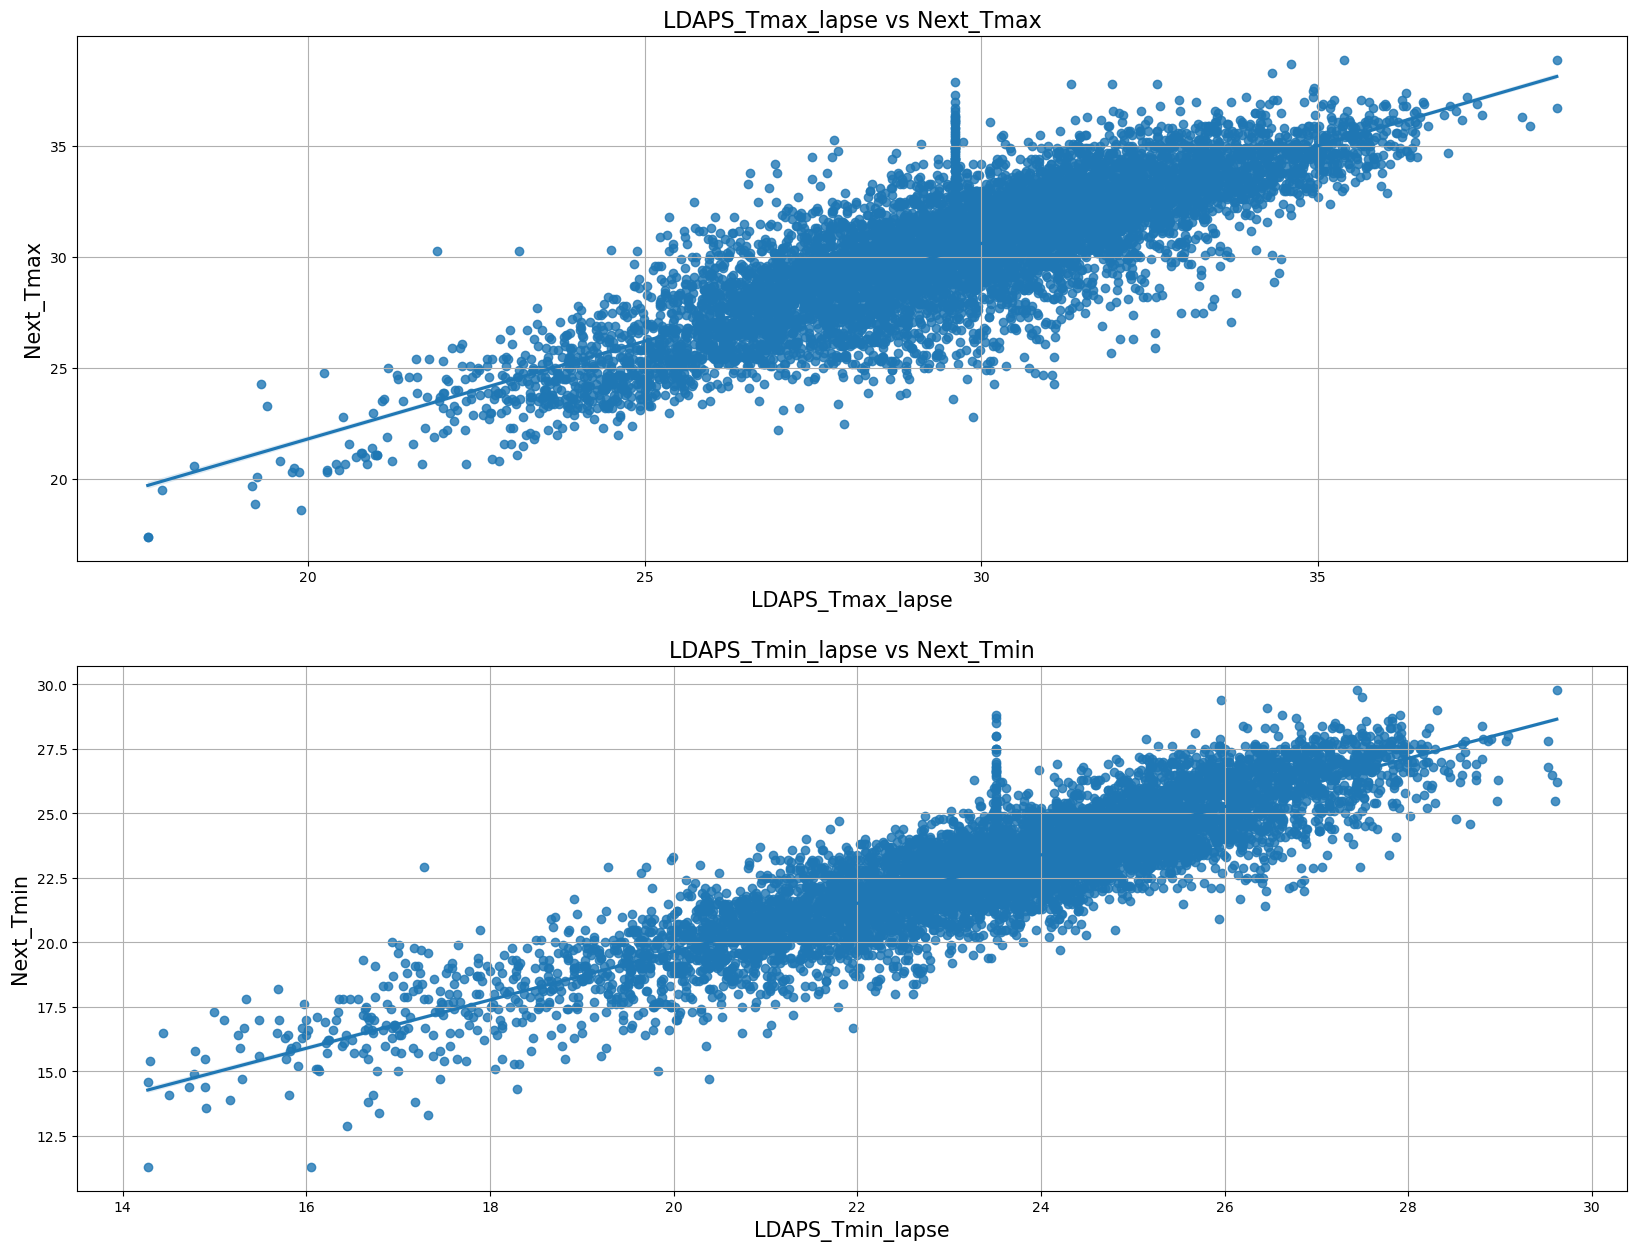

In [95]:
plt.figure(figsize=(20, 15))

# Plot for LDAPS_Tmax_lapse vs Next_Tmax 
plt.subplot(2, 1, 1)
sns.regplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_Tmax_lapse', fontsize=15)
plt.ylabel('Next_Tmax', fontsize=15)
plt.title('LDAPS_Tmax_lapse vs Next_Tmax', fontsize=16)
plt.grid(True)

# Plot for LDAPS_Tmin_lapse vs Next_Tmin 
plt.subplot(2, 1, 2)
sns.regplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_Tmin_lapse', fontsize=15)
plt.ylabel('Next_Tmin', fontsize=15)
plt.title('LDAPS_Tmin_lapse vs Next_Tmin', fontsize=16)
plt.grid(True)

LDAPS_Tmax_lapse vs Next_Tmax:
The scatter plot shows a positive relationship between LDAPS_Tmax_lapse and Next_Tmax. As the values of LDAPS_Tmax_lapse increase, the values of Next_Tmax also tend to increase, indicating a potential predictive relationship.

LDAPS_Tmin_lapse vs Next_Tmin:
Similar to the first plot, there is a positive correlation observed between LDAPS_Tmin_lapse and Next_Tmin. Higher values of LDAPS_Tmin_lapse are associated with higher values of Next_Tmin, suggesting that changes in LDAPS_Tmin_lapse may influence Next_Tmin.

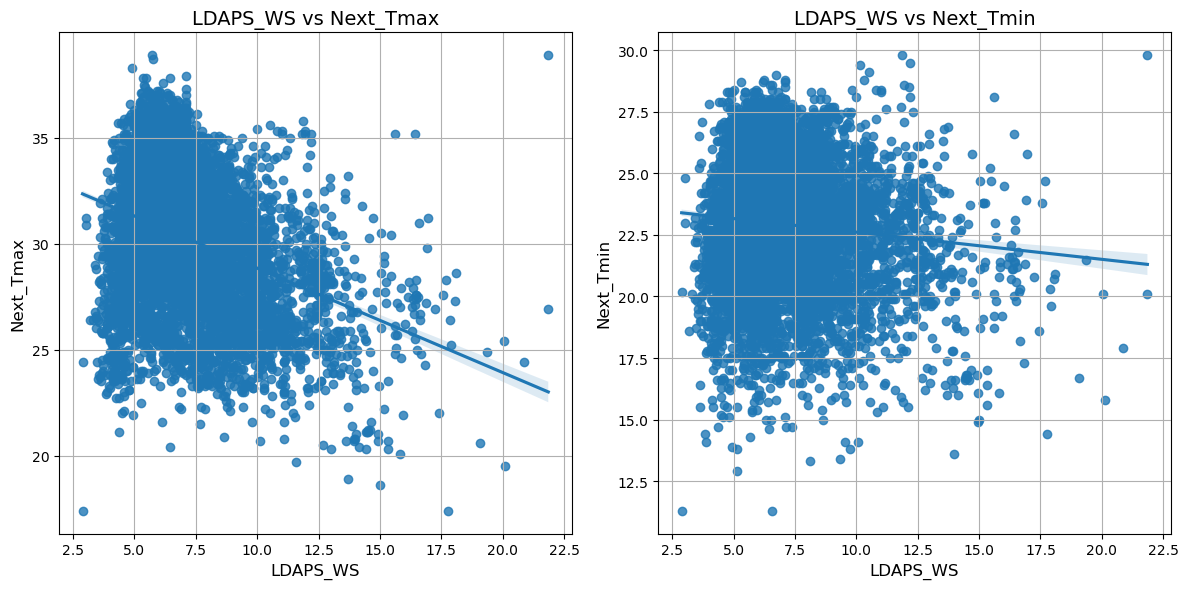

In [96]:
plt.figure(figsize=(12, 6))

# LDAPS_WS vs Next_Tmax
plt.subplot(1, 2, 1)
sns.regplot(x='LDAPS_WS', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_WS', fontsize=12)
plt.ylabel('Next_Tmax', fontsize=12)
plt.title('LDAPS_WS vs Next_Tmax', fontsize=14)
plt.grid(True)

# LDAPS_WS vs Next_Tmin
plt.subplot(1, 2, 2)
sns.regplot(x='LDAPS_WS', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_WS', fontsize=12)
plt.ylabel('Next_Tmin', fontsize=12)
plt.title('LDAPS_WS vs Next_Tmin', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


LDAPS_WS vs Next_Tmax:
The trend line shows the relationship between wind speed and the next day's maximum temperature.
The points are scattered with no strong correlation, suggesting that wind speed doesn't have a clear impact on the maximum temperature in this data.

LDAPS_WS vs Next_Tmin:
Similar to the first plot, the points are spread out with no strong trend between wind speed and minimum temperature, implying no significant direct relationship between these two variables in this sample.

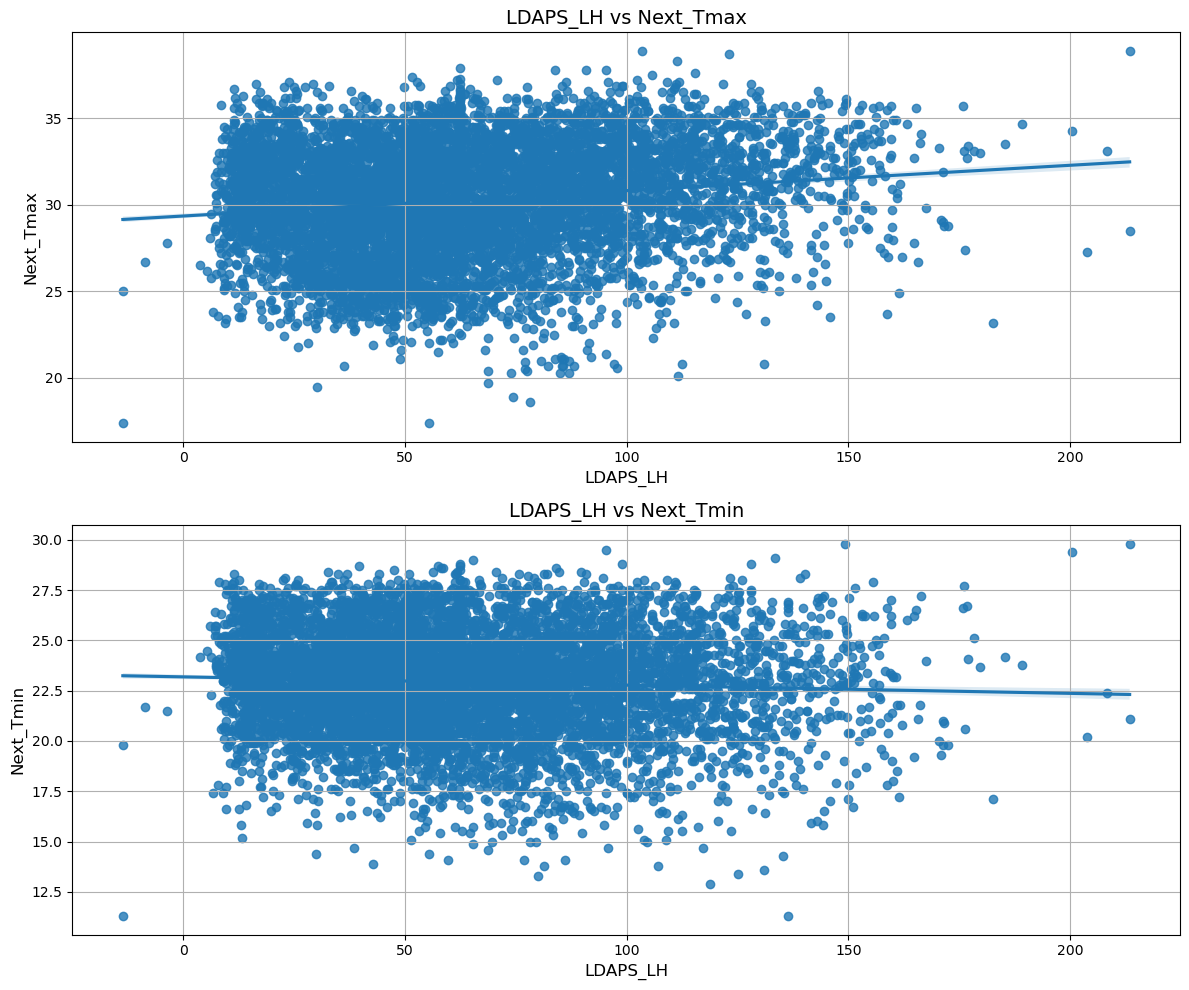

In [97]:
plt.figure(figsize=(12, 10))

# LDAPS_LH vs Next_Tmax
plt.subplot(2, 1, 1)
sns.regplot(x='LDAPS_LH', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_LH', fontsize=12)
plt.ylabel('Next_Tmax', fontsize=12)
plt.title('LDAPS_LH vs Next_Tmax', fontsize=14)
plt.grid(True)

# LDAPS_LH vs Next_Tmin
plt.subplot(2, 1, 2)
sns.regplot(x='LDAPS_LH', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_LH', fontsize=12)
plt.ylabel('Next_Tmin', fontsize=12)
plt.title('LDAPS_LH vs Next_Tmin', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()


LDAPS_LH vs Next_Tmax:
a.The regression line shows the relationship between latent heat and the next day's maximum temperature.

b.The scatter of points indicates that there might be a weak relationship, with some possible positive correlation, but it's not very strong.

LDAPS_LH vs Next_Tmin:
The points are more widely spread in this plot, suggesting a weaker correlation between latent heat and the next day's minimum temperature. The trend line shows a possible very slight positive relationship.

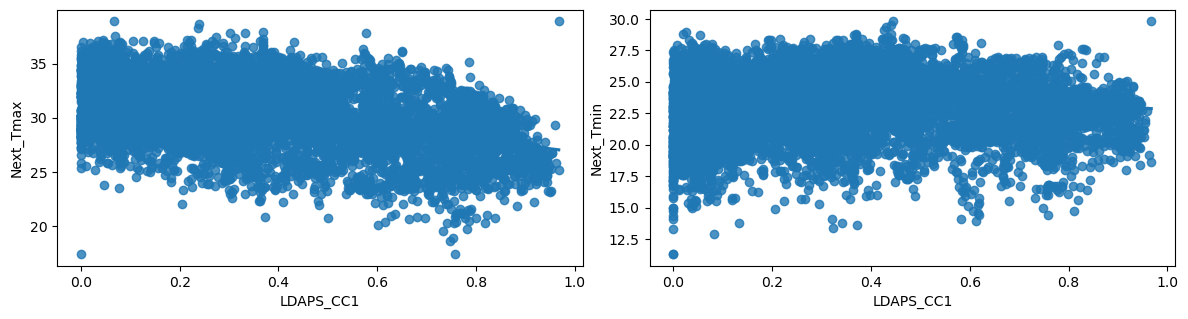

In [98]:
plt.figure(figsize=(12, 6))

# LDAPS_CC1 vs Next_Tmax
plt.subplot(2, 2, 1)
sns.regplot(x='LDAPS_CC1', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_CC1')
plt.ylabel('Next_Tmax')

# LDAPS_CC1 vs Next_Tmin
plt.subplot(2, 2, 2)
sns.regplot(x='LDAPS_CC1', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_CC1')
plt.ylabel('Next_Tmin')

plt.tight_layout()
plt.show()


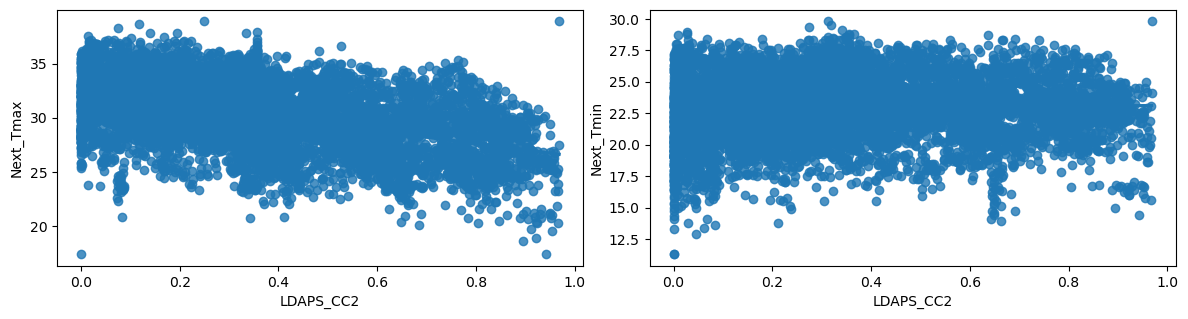

In [99]:
plt.figure(figsize=(12, 6))

# LDAPS_CC2 vs Next_Tmax
plt.subplot(2, 2, 1)
sns.regplot(x='LDAPS_CC2', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_CC2')
plt.ylabel('Next_Tmax')

# LDAPS_CC2 vs Next_Tmin
plt.subplot(2, 2, 2)
sns.regplot(x='LDAPS_CC2', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_CC2')
plt.ylabel('Next_Tmin')

plt.tight_layout()
plt.show()


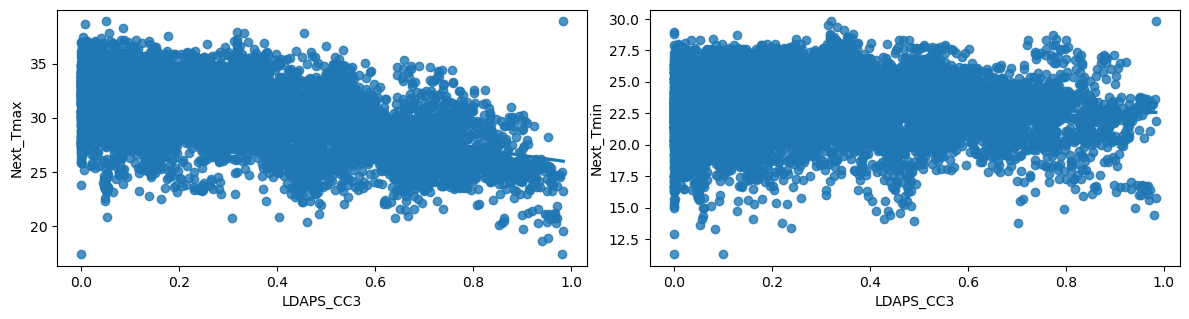

In [100]:
plt.figure(figsize=(12, 6))

# LDAPS_CC3 vs Next_Tmax
plt.subplot(2, 2, 1)
sns.regplot(x='LDAPS_CC3', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_CC3')
plt.ylabel('Next_Tmax')

# LDAPS_CC3 vs Next_Tmin
plt.subplot(2, 2, 2)
sns.regplot(x='LDAPS_CC3', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_CC3')
plt.ylabel('Next_Tmin')

plt.tight_layout()
plt.show()


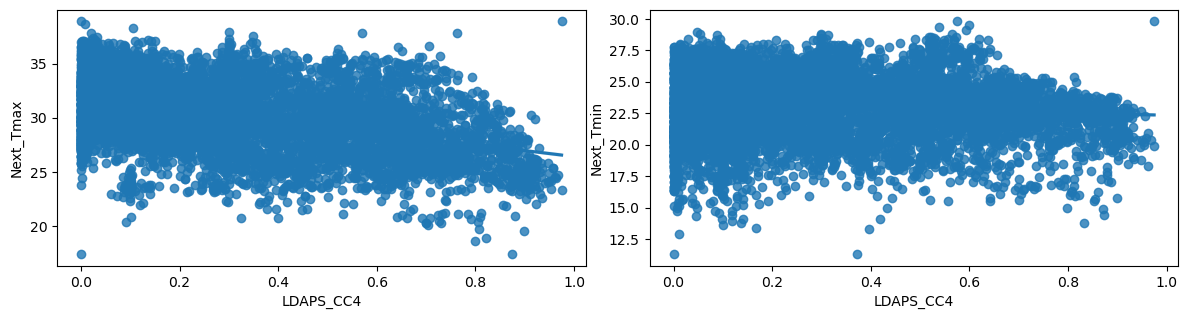

In [101]:
plt.figure(figsize=(12, 6))

# LDAPS_CC4 vs Next_Tmax
plt.subplot(2, 2, 1)
sns.regplot(x='LDAPS_CC4', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_CC4')
plt.ylabel('Next_Tmax')

# LDAPS_CC4 vs Next_Tmin
plt.subplot(2, 2, 2)
sns.regplot(x='LDAPS_CC4', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_CC4')
plt.ylabel('Next_Tmin')

plt.tight_layout()
plt.show()


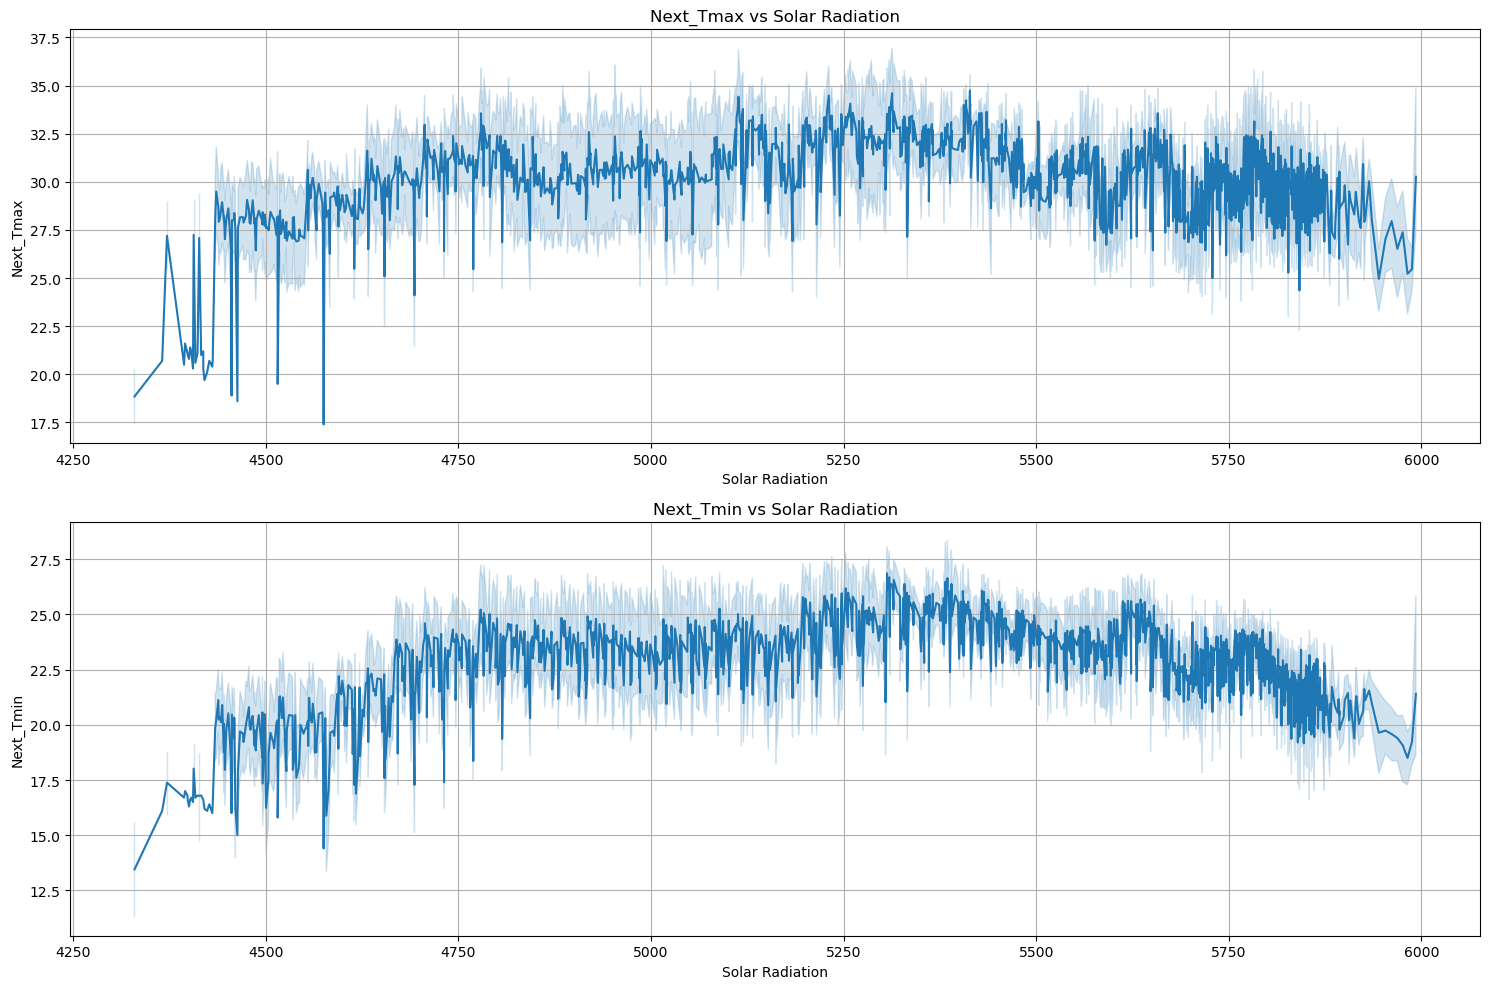

In [102]:
plt.figure(figsize=(15, 10))

# Solar radiation vs Next_Tmax
plt.subplot(2, 1, 1)
sns.lineplot(x='Solar radiation', y='Next_Tmax', data=df)
plt.xlabel('Solar Radiation')
plt.ylabel('Next_Tmax')
plt.title('Next_Tmax vs Solar Radiation')
plt.grid(True)

# Solar radiation vs Next_Tmin
plt.subplot(2, 1, 2)
sns.lineplot(x='Solar radiation', y='Next_Tmin', data=df)
plt.xlabel('Solar Radiation')
plt.ylabel('Next_Tmin')
plt.title('Next_Tmin vs Solar Radiation')
plt.grid(True)

plt.tight_layout()
plt.show()


Next_Tmax vs Solar Radiation:
The line plot suggests that as solar radiation increases, the next day's maximum temperature might generally increase as well. There's a noticeable upward trend in some sections, but it fluctuates.

Next_Tmin vs Solar Radiation:
For minimum temperature, the line plot shows a more irregular pattern. While there are some areas where higher solar radiation corresponds to higher minimum temperatures, it's not as consistent as in the Next_Tmax case.

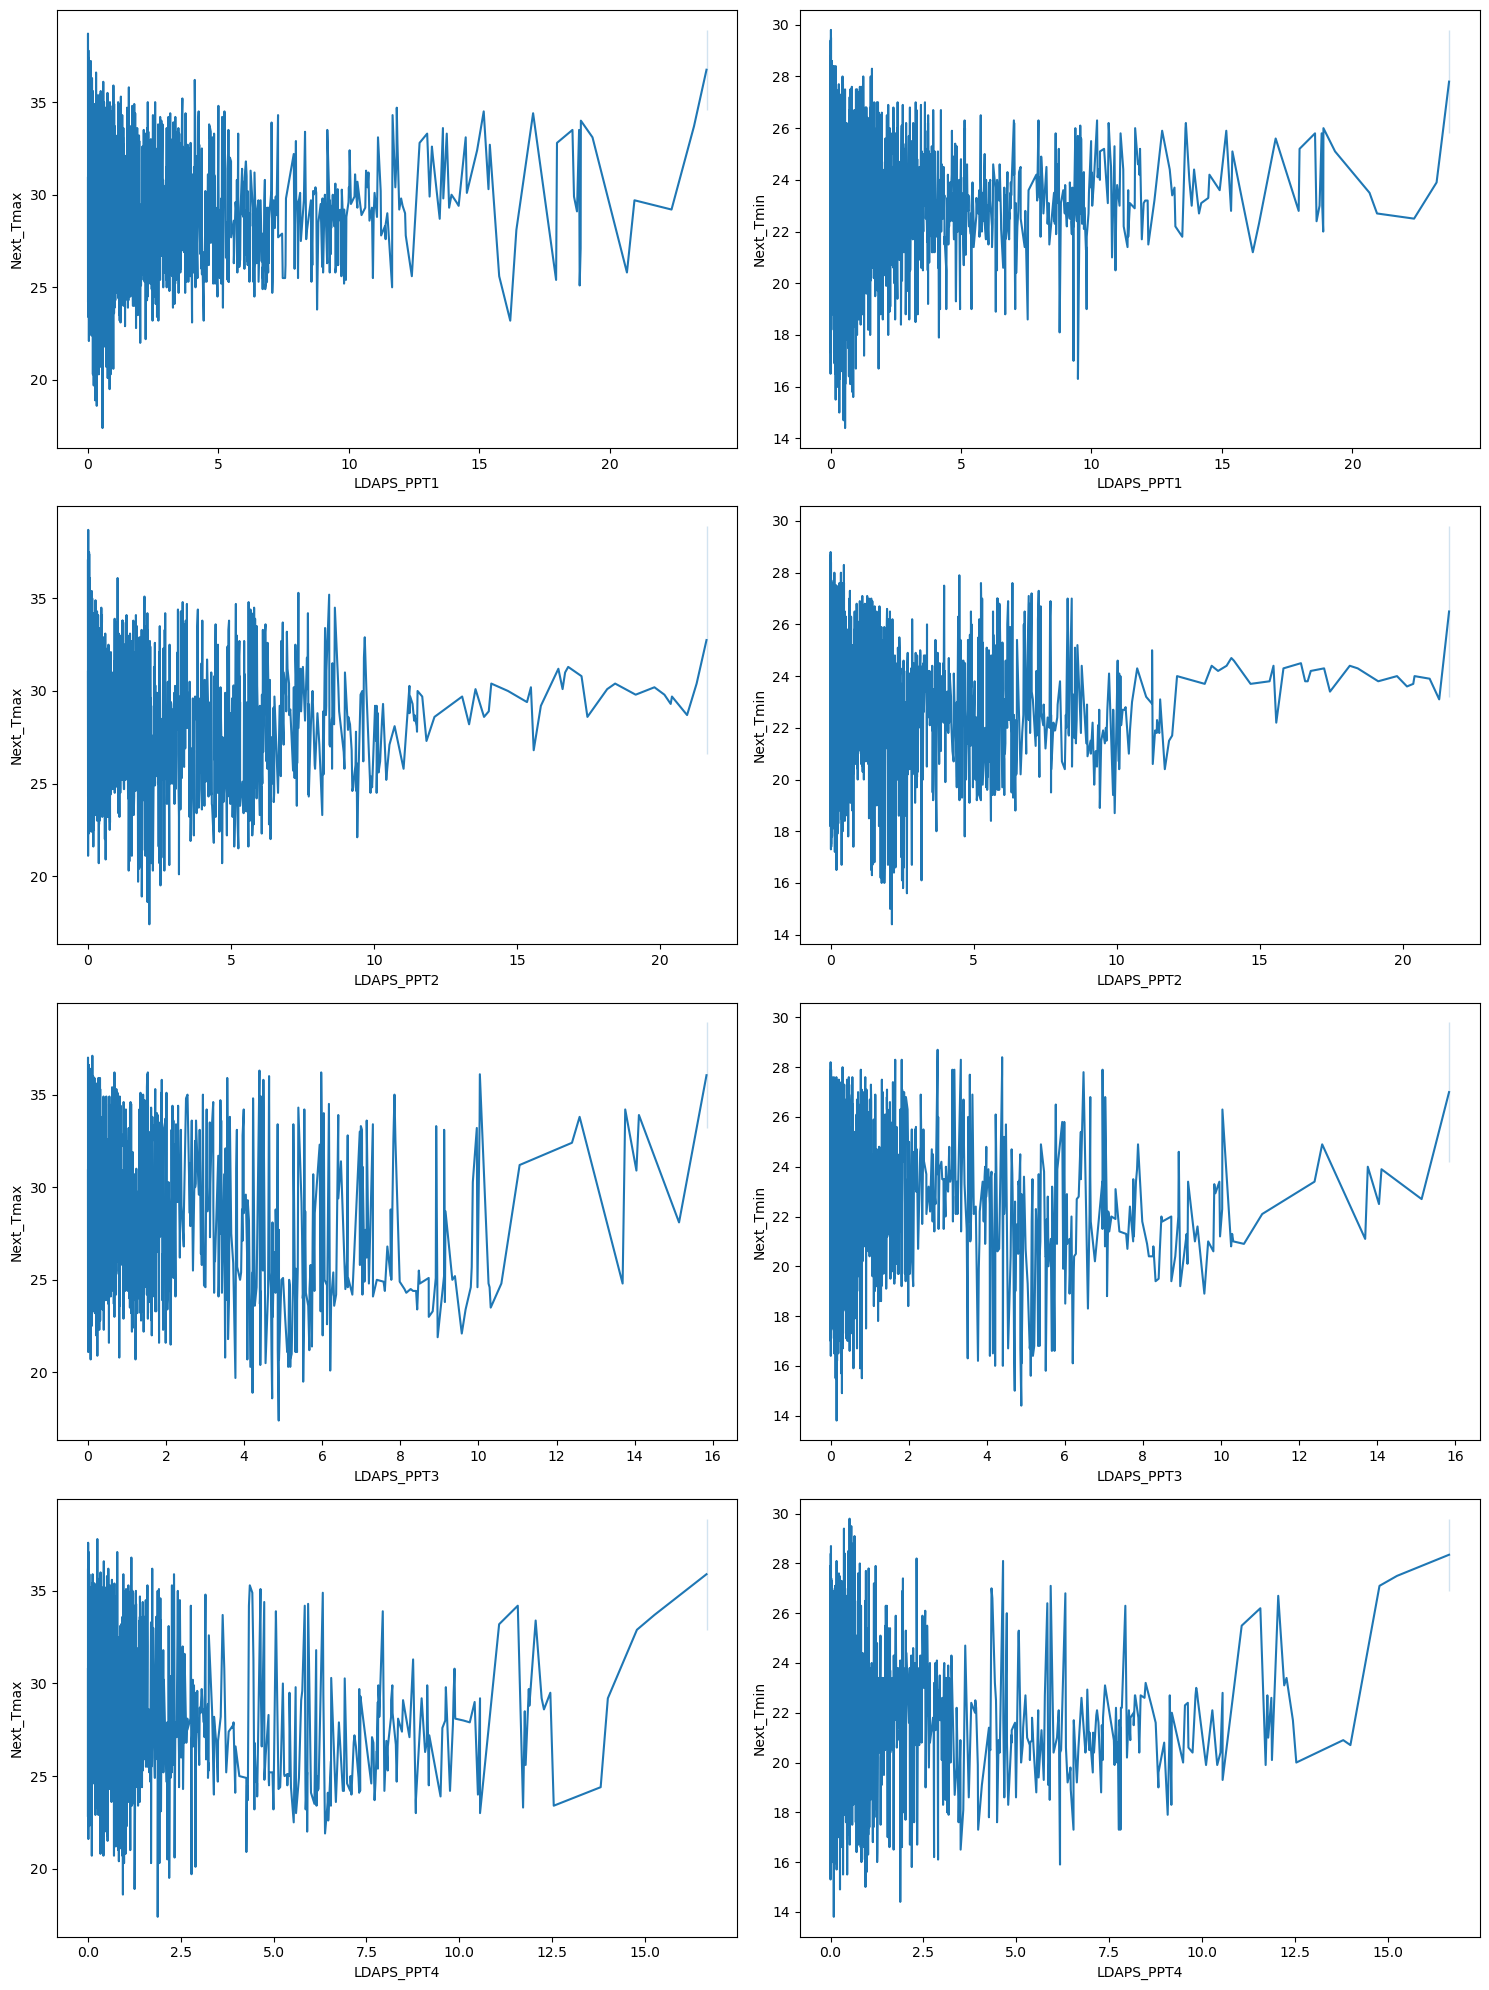

In [103]:
plt.figure(figsize=(15, 20))

# LDAPS_PPT1 vs Next_Tmax
plt.subplot(4, 2, 1)
sns.lineplot(x='LDAPS_PPT1', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_PPT1')
plt.ylabel('Next_Tmax')

# LDAPS_PPT1 vs Next_Tmin
plt.subplot(4, 2, 2)
sns.lineplot(x='LDAPS_PPT1', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_PPT1')
plt.ylabel('Next_Tmin')

# LDAPS_PPT2 vs Next_Tmax
plt.subplot(4, 2, 3)
sns.lineplot(x='LDAPS_PPT2', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_PPT2')
plt.ylabel('Next_Tmax')

# LDAPS_PPT2 vs Next_Tmin
plt.subplot(4, 2, 4)
sns.lineplot(x='LDAPS_PPT2', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_PPT2')
plt.ylabel('Next_Tmin')

# LDAPS_PPT3 vs Next_Tmax
plt.subplot(4, 2, 5)
sns.lineplot(x='LDAPS_PPT3', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_PPT3')
plt.ylabel('Next_Tmax')

# LDAPS_PPT3 vs Next_Tmin
plt.subplot(4, 2, 6)
sns.lineplot(x='LDAPS_PPT3', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_PPT3')
plt.ylabel('Next_Tmin')

# LDAPS_PPT4 vs Next_Tmax
plt.subplot(4, 2, 7)
sns.lineplot(x='LDAPS_PPT4', y='Next_Tmax', data=df)
plt.xlabel('LDAPS_PPT4')
plt.ylabel('Next_Tmax')

# LDAPS_PPT4 vs Next_Tmin
plt.subplot(4, 2, 8)
sns.lineplot(x='LDAPS_PPT4', y='Next_Tmin', data=df)
plt.xlabel('LDAPS_PPT4')
plt.ylabel('Next_Tmin')

plt.tight_layout()
plt.show()


In [104]:
#corr matrix
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112806      0.132122    -0.066731   
Present_Tmax      0.112806      1.000000      0.618760    -0.204571   
Present_Tmin      0.132122      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066731     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166366     -0.301787     -0.015140     0.579141   
LDAPS_Tmax_lapse  0.069363      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.105059      0.623496      0.762993     0.089476   
LDAPS_WS          0.004355     -0.121820     -0.034675     0.294361   
LDAPS_LH         -0.133711      0.135463     -0.009258    -0.070858   
LDAPS_CC1         0.006769     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.003223     -0.213791      0.090263     0.745443   
LDAPS_CC3         0.000443     -0.144018     -0.002772     0.689679   
LDAPS_CC4         0.005853     -0.140729     -0.044335     0.514075   
LDAPS_PPT1       -0.004991     -0.109006      0.112845     0.262665   
LDAPS_PPT2       -0.010558     -0.099449      0.068176     0.390967   
LDAPS_PPT3       -0.015054     -0.120367     -0.046126     0.240642   
LDAPS_PPT4       -0.013036     -0.099607     -0.062965     0.168595   
lat              -0.237438     -0.052615     -0.078475     0.087099   
lon              -0.118574      0.009020     -0.043461    -0.076237   
DEM              -0.256095     -0.187121     -0.250275     0.102115   
Slope            -0.090413     -0.105809     -0.146339     0.123744   
Solar radiation  -0.018787     -0.025439      0.053578     0.244080   
Next_Tmax         0.108289      0.610348      0.471806    -0.437898   
Next_Tmin         0.128713      0.622741      0.796670     0.095019   
year             -0.000582      0.059665      0.036987    -0.001984   
month            -0.000413      0.145849      0.087021    -0.188938   
day              -0.000692     -0.141944     -0.106539    -0.063041   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166366          0.069363          0.105059  0.004355   
Present_Tmax        -0.301787          0.570129          0.623496 -0.121820   
Present_Tmin        -0.015140          0.464151          0.762993 -0.034675   
LDAPS_RHmin          0.579141         -0.564580          0.089476  0.294361   
LDAPS_RHmax          1.000000         -0.373404         -0.114143  0.135333   
LDAPS_Tmax_lapse    -0.373404          1.000000          0.654021 -0.311996   
LDAPS_Tmin_lapse    -0.114143          0.654021          1.000000 -0.130035   
LDAPS_WS             0.135333         -0.311996         -0.130035  1.000000   
LDAPS_LH             0.238579          0.048010         -0.134761  0.006711   
LDAPS_CC1            0.436652         -0.438439          0.010901  0.289445   
LDAPS_CC2            0.391330         -0.523619          0.047727  0.261090   
LDAPS_CC3            0.226957         -0.541327         -0.044018  0.242991   
LDAPS_CC4            0.130619         -0.429539         -0.080335  0.220533   
LDAPS_PPT1           0.268449         -0.111065          0.038056  0.152587   
LDAPS_PPT2           0.229050         -0.242122          0.000870  0.191886   
LDAPS_PPT3           0.134607         -0.188115         -0.088575  0.161684   
LDAPS_PPT4           0.117853         -0.160273         -0.094655  0.144085   
lat                  0.195798         -0.042093         -0.096257  0.036657   
lon                  0.025667          0.090666         -0.026701 -0.059466   
DEM                  0.177168         -0.178895         -0.195455  0.191053   
Slope                0.219599         -0.162332         -0.185849  0.171629   
Solar radiation      0.149261          0.047971          0.159975  0.121759   
Next_Tmax           -0.283738          0.827189          0.586983 -0.342729   
Next_Tmin           -0.071997          0.586868          0.880176 -0.096576   
year                -0.142249          0.015978        

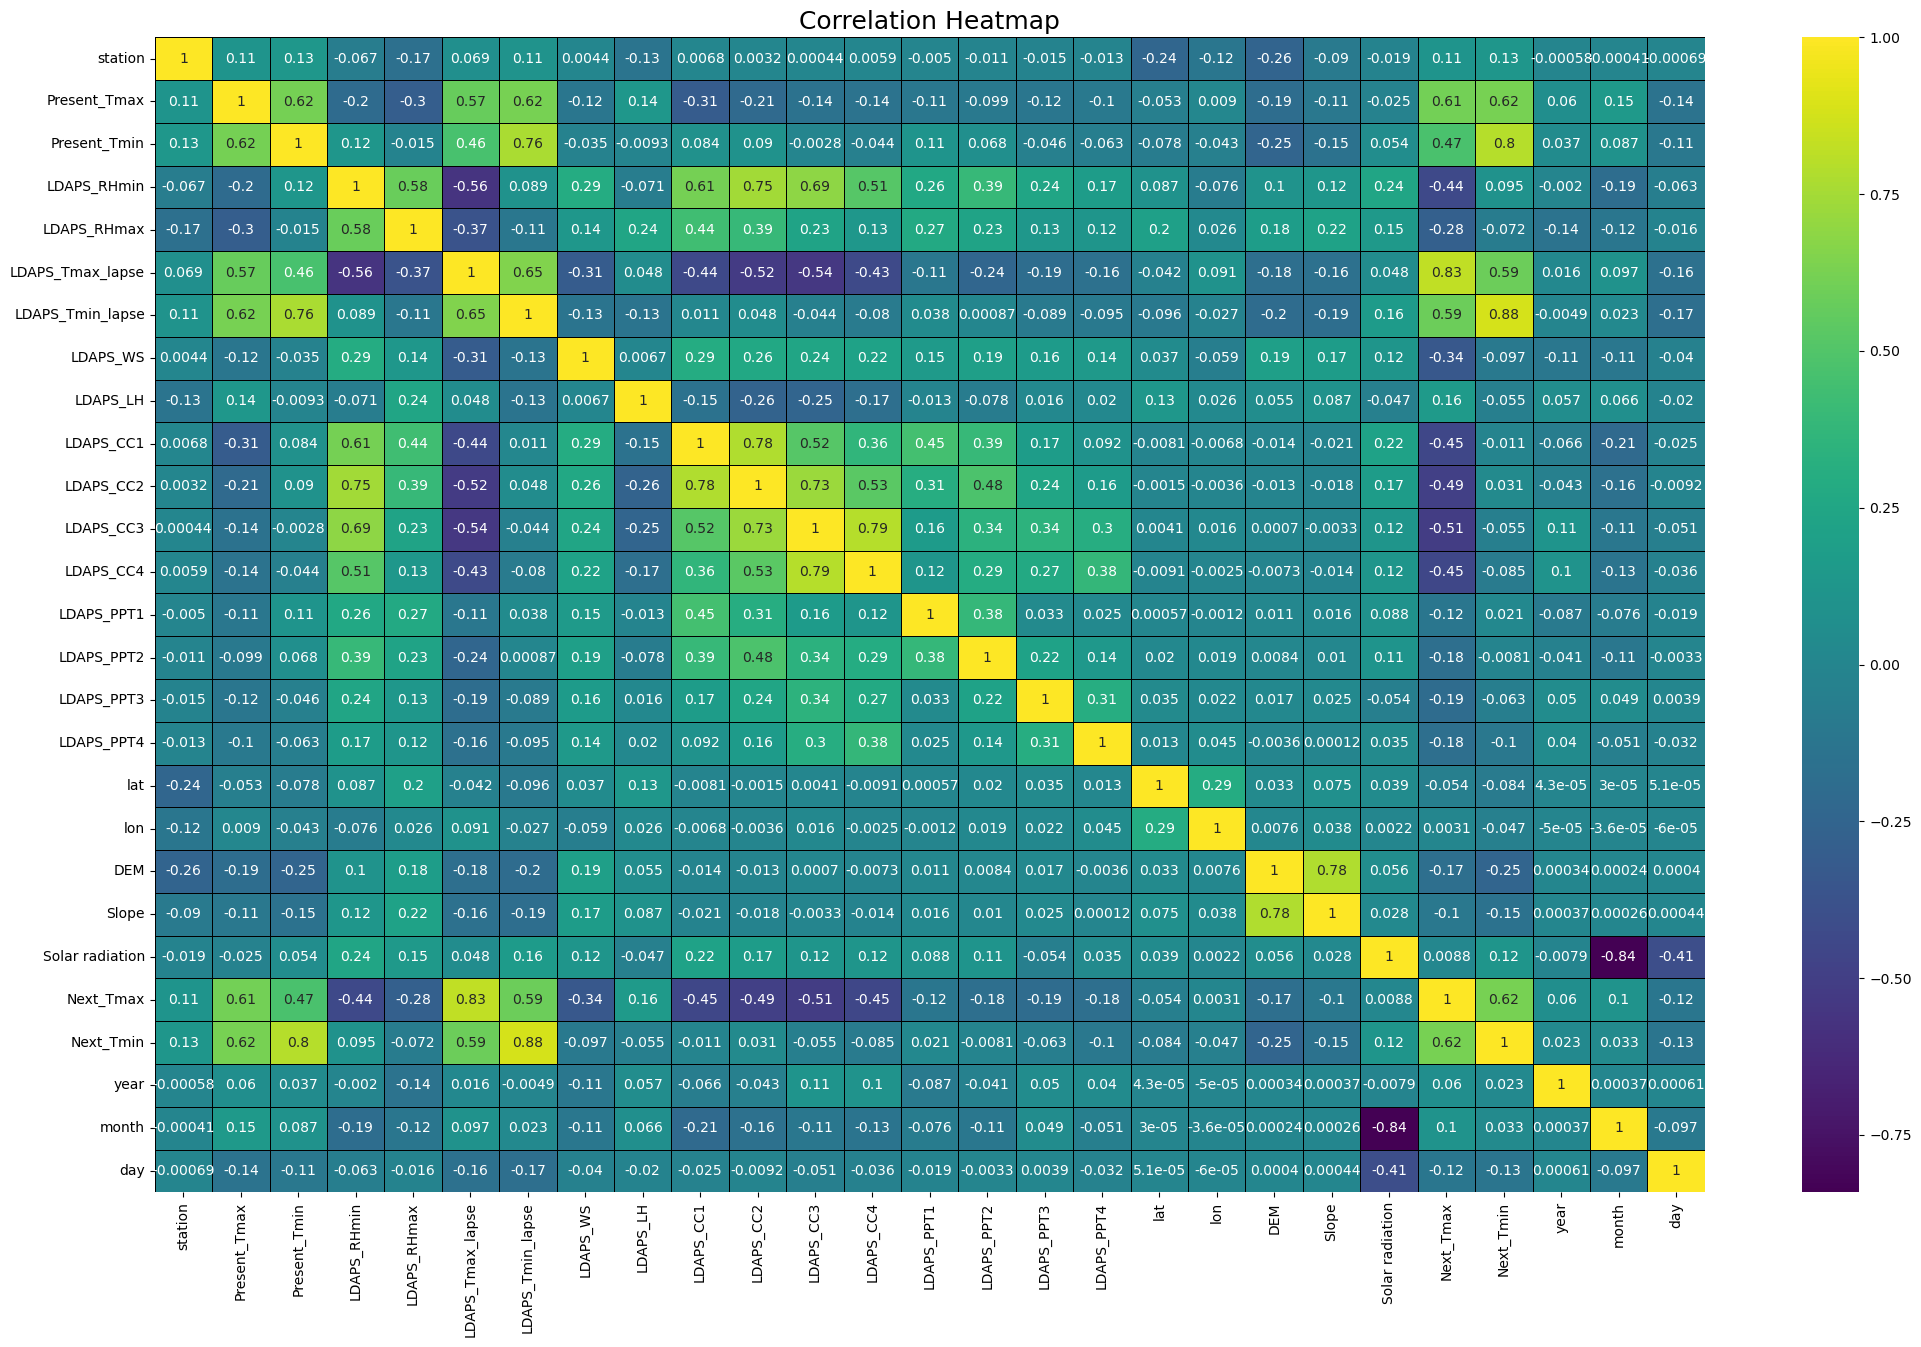

In [105]:
#plotting corr matrix

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

The correlation heatmap reveals that Credit History (0.61) and Loan Amount (0.53) are the strongest positive predictors of loan approval (Loan Status). Additionally, Education has a moderate positive correlation (0.39) with loan approval, while Applicant Income shows a slight positive correlation (0.25). Conversely, being Self Employed is negatively correlated (-0.18) with loan approval, and Dependents and Loan Amount Term have minimal impact on approval likelihood. Overall, credit history and loan amount are key factors influencing loan approval.

# checking outliers

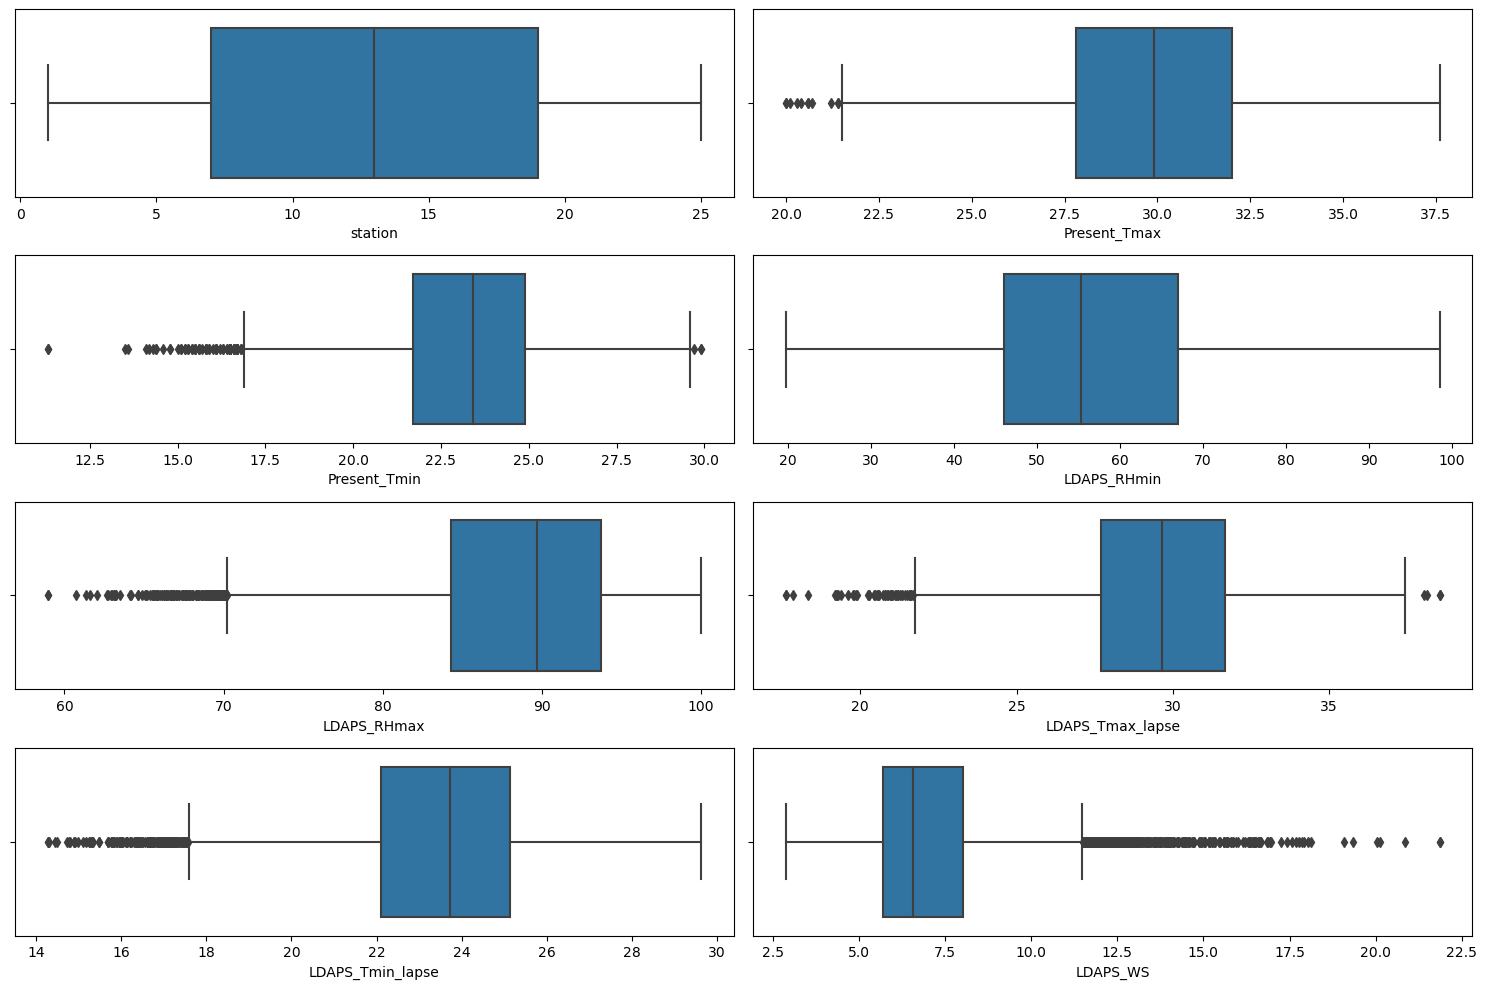

In [106]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:8], 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

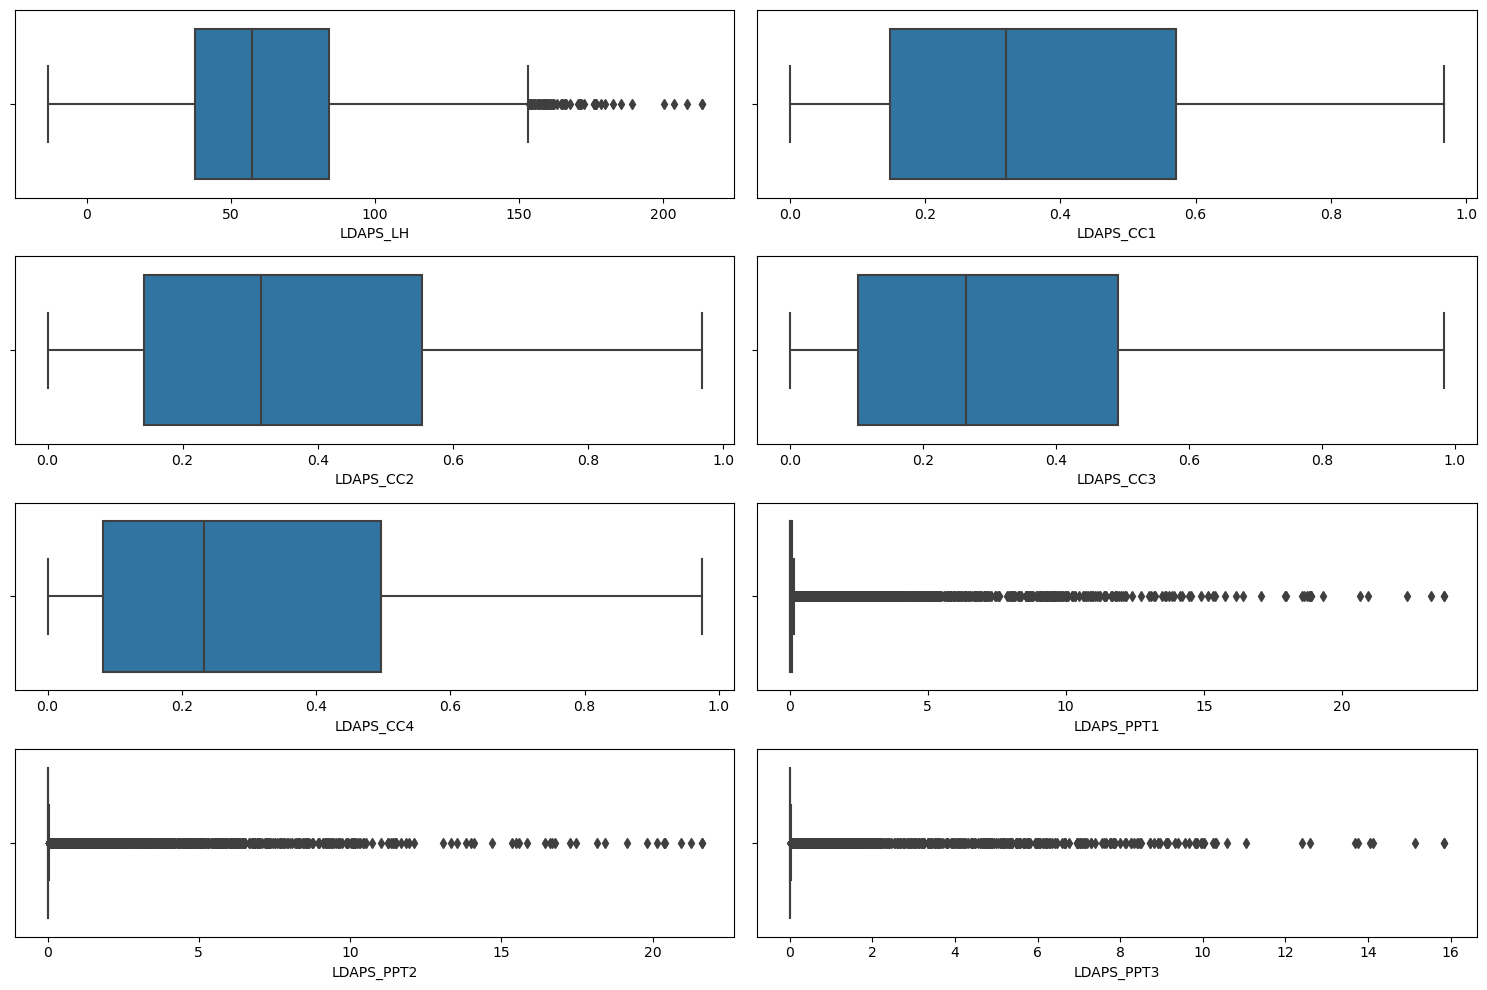

In [107]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[8:16], 1):  
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

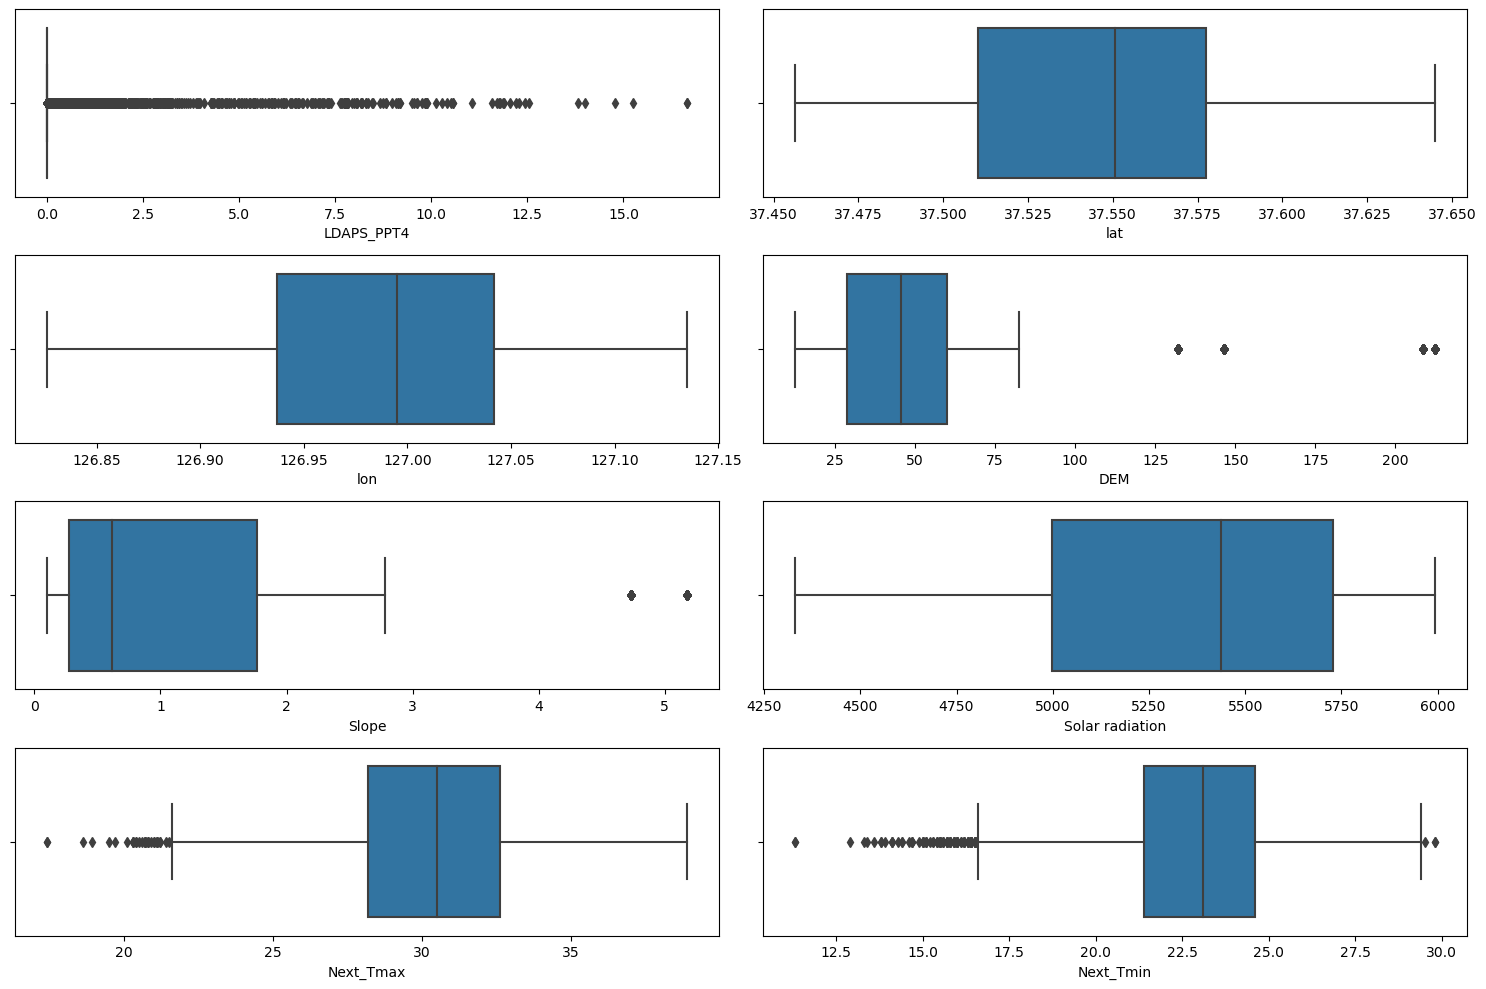

In [108]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[16:24], 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

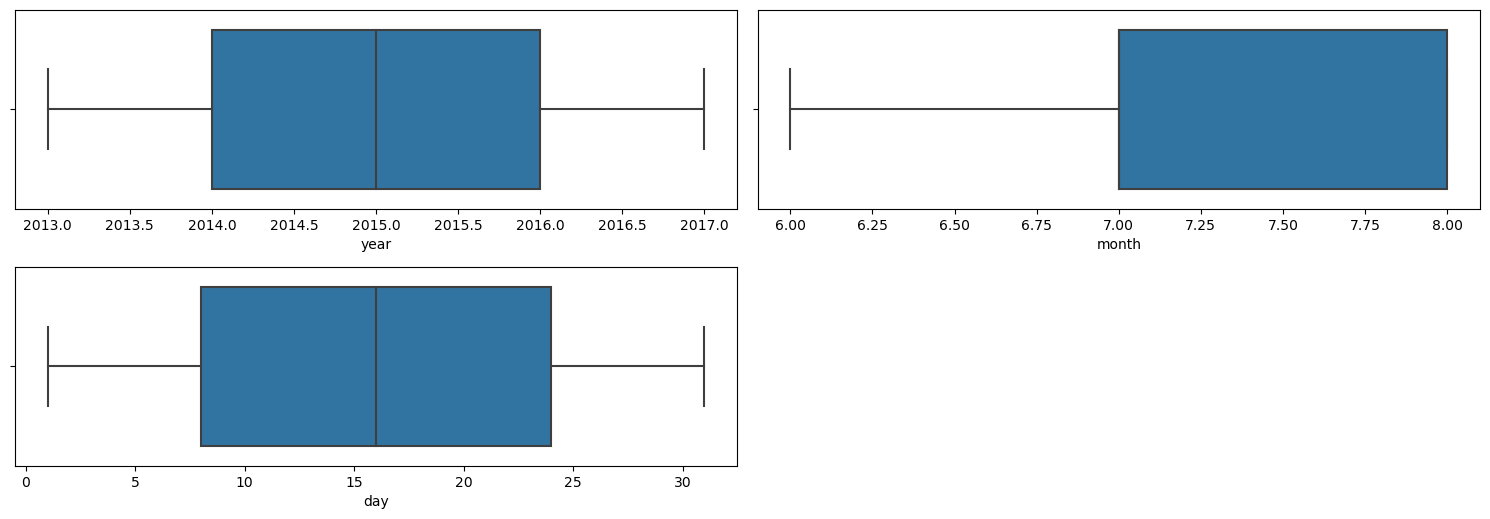

In [109]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[24:], 1):  
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[column])
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Removing outliers

In [110]:
from scipy.stats import zscore

In [111]:
# Calculate Z-scores for all columns
z = np.abs(zscore(df))

# Setting the threshold 
threshold = 3
df_new = df[(z < threshold).all(axis=1)]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_new.shape}")

Original dataset shape: (7752, 27)
Dataset shape after removing outliers: (6894, 27)


# Remove skewness

In [112]:
from sklearn.preprocessing import PowerTransformer

In [113]:
# Initialization
pt = PowerTransformer(method='yeo-johnson')

# List of columns to transform
columns_to_transform = ['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 
                        'LDAPS_WS', 'DEM', 'Slope']


df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])
print(df.skew())

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            0.002408
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          1.404189
LDAPS_PPT2          1.577808
LDAPS_PPT3          1.747820
LDAPS_PPT4          1.963848
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
year               -0.000365
month              -0.196329
day                -0.008989
dtype: float64


# Feature scaling

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [117]:
# Separating features and targets
X = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)  
y_tmax = df['Next_Tmax']  
y_tmin = df['Next_Tmin'] 

In [126]:
# Split the dataset into training and testing sets

X_train_tmax, X_test_tmax, y_train_tmax, y_test_tmax = train_test_split(X, y_tmax, test_size=0.2, random_state=42)
X_train_tmin, X_test_tmin, y_train_tmin, y_test_tmin = train_test_split(X, y_tmin, test_size=0.2, random_state=42)

In [127]:
# Initializing the StandardScaler
scaler = StandardScaler()

# For Tmax
X_train_tmax_scaled = scaler.fit_transform(X_train_tmax)
X_test_tmax_scaled = scaler.transform(X_test_tmax)

# For Tmin
X_train_tmin_scaled = scaler.fit_transform(X_train_tmin)
X_test_tmin_scaled = scaler.transform(X_test_tmin)

In [128]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# Calculate VIF
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF FACTOR'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [130]:
vif_results = calc_vif(X)
print(vif_results)

           variables    VIF FACTOR
0            station  5.439179e+00
1       Present_Tmax  2.989874e+02
2       Present_Tmin  3.032286e+02
3        LDAPS_RHmin  1.057859e+02
4        LDAPS_RHmax  3.537993e+02
5   LDAPS_Tmax_lapse  7.760545e+02
6   LDAPS_Tmin_lapse  7.566228e+02
7           LDAPS_WS  1.233163e+00
8           LDAPS_LH  6.913189e+00
9          LDAPS_CC1  1.499271e+01
10         LDAPS_CC2  1.763348e+01
11         LDAPS_CC3  1.518744e+01
12         LDAPS_CC4  8.006125e+00
13        LDAPS_PPT1  2.594166e+00
14        LDAPS_PPT2  2.369070e+00
15        LDAPS_PPT3  1.963571e+00
16        LDAPS_PPT4  1.953984e+00
17               lat  7.547281e+05
18               lon  1.720812e+06
19               DEM  3.640111e+00
20             Slope  2.925316e+00
21   Solar radiation  5.529160e+03
22              year  1.261954e+06
23             month  5.702678e+03
24               day  3.798933e+01


In [131]:
#Drop col with high VIF
X_reduced = X.drop(['Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'lat', 'lon', 'year'], axis=1)

In [132]:
# Recalculate VIF 
vif_results_reduced = calc_vif(X_reduced)
print(vif_results_reduced)

          variables  VIF FACTOR
0           station    5.099245
1       LDAPS_RHmin   59.164077
2       LDAPS_RHmax  310.227710
3          LDAPS_WS    1.188317
4          LDAPS_LH    5.904214
5         LDAPS_CC1   13.325767
6         LDAPS_CC2   17.111575
7         LDAPS_CC3   14.258971
8         LDAPS_CC4    7.898655
9        LDAPS_PPT1    2.489295
10       LDAPS_PPT2    2.338995
11       LDAPS_PPT3    1.933701
12       LDAPS_PPT4    1.909950
13              DEM    2.963991
14            Slope    2.747872
15  Solar radiation  117.027579
16            month  106.573385
17              day    4.472768


In [133]:
features_to_drop = ['station', 'Slope', 'DEM', 'LDAPS_RHmax', 'LDAPS_RHmin', 'Solar radiation', 'month']
X_reduced = X.drop(features_to_drop, axis=1)

In [134]:
# Recalculate VIF 
vif_results_reduced = calc_vif(X_reduced)
print(vif_results_reduced)

           variables    VIF FACTOR
0       Present_Tmax  2.552030e+02
1       Present_Tmin  2.754522e+02
2   LDAPS_Tmax_lapse  4.742624e+02
3   LDAPS_Tmin_lapse  4.903976e+02
4           LDAPS_WS  1.155869e+00
5           LDAPS_LH  5.649048e+00
6          LDAPS_CC1  1.460895e+01
7          LDAPS_CC2  1.705630e+01
8          LDAPS_CC3  1.448045e+01
9          LDAPS_CC4  7.873005e+00
10        LDAPS_PPT1  2.497825e+00
11        LDAPS_PPT2  2.343916e+00
12        LDAPS_PPT3  1.919727e+00
13        LDAPS_PPT4  1.923132e+00
14               lat  6.129573e+05
15               lon  1.613165e+06
16              year  1.207713e+06
17               day  4.533267e+00


# Model Training

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1.Randomforest  Regressor for Next_Tmax

In [136]:
# Model training for Next_Tmax
model_tmax = RandomForestRegressor(random_state=42)
model_tmax.fit(X_train_scaled, y_train_tmax)
y_pred_tmax = model_tmax.predict(X_test_scaled)

In [137]:
# Model evaluation for Next_Tmax
mae_tmax = mean_absolute_error(y_test_tmax, y_pred_tmax)
mse_tmax = mean_squared_error(y_test_tmax, y_pred_tmax)
r2_tmax = r2_score(y_test_tmax, y_pred_tmax)

In [143]:
print("\nRandomForest -Next_Tmax Evaluation Metrics:")
print(f"MAE: {mae_tmax:.3f}")
print(f"MSE: {mse_tmax:.3f}")
print(f"R² Score: {r2_tmax:.3f}")


RandomForest -Next_Tmax Evaluation Metrics:
MAE: 0.685
MSE: 0.829
R² Score: 0.915


# 2.GradientBoosting Regressor for Next_Tmax

In [140]:
#  Model training 
model_tmax_gb = GradientBoostingRegressor(random_state=42)
model_tmax_gb.fit(X_train_scaled, y_train_tmax)
y_pred_tmax_gb = model_tmax_gb.predict(X_test_scaled)

In [141]:
# Model evaluation 
mae_tmax_gb = mean_absolute_error(y_test_tmax, y_pred_tmax_gb)
mse_tmax_gb = mean_squared_error(y_test_tmax, y_pred_tmax_gb)
r2_tmax_gb = r2_score(y_test_tmax, y_pred_tmax_gb)

In [142]:
print("\nGradient Boosting - Next_Tmax Evaluation Metrics:")
print(f"MAE: {mae_tmax_gb:.3f}")
print(f"MSE: {mse_tmax_gb:.3f}")
print(f"R² Score: {r2_tmax_gb:.3f}")


Gradient Boosting - Next_Tmax Evaluation Metrics:
MAE: 0.903
MSE: 1.336
R² Score: 0.863


# 3.Linear Regressor for Next_Tmax

In [144]:
#Model training 
model_tmax_lr = LinearRegression()
model_tmax_lr.fit(X_train_scaled, y_train_tmax)
y_pred_tmax_lr = model_tmax_lr.predict(X_test_scaled)

In [145]:
# Model evaluation 
mae_tmax_lr = mean_absolute_error(y_test_tmax, y_pred_tmax_lr)
mse_tmax_lr = mean_squared_error(y_test_tmax, y_pred_tmax_lr)
r2_tmax_lr = r2_score(y_test_tmax, y_pred_tmax_lr)

In [146]:
print("\nLinear Regression - Next_Tmax Evaluation Metrics:")
print(f"MAE: {mae_tmax_lr:.3f}")
print(f"MSE: {mse_tmax_lr:.3f}")
print(f"R² Score: {r2_tmax_lr:.3f}")


Linear Regression - Next_Tmax Evaluation Metrics:
MAE: 1.143
MSE: 2.273
R² Score: 0.767


 The Random Forest model is the best among the three based on the following metrics:
        
It has the lowest MAE (0.685), indicating it has the smallest average error.
It has the lowest MSE (0.829), which reflects better overall prediction accuracy.
It has the highest R² Score (0.915), suggesting that it explains a significant proportion of the variance in the Next_Tmax values.

# Hyperparameter tunning and cross validation for our best model

In [148]:
model_tmax = RandomForestRegressor(random_state=42)

In [149]:
#  Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [150]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_tmax,
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring='neg_mean_squared_error',
                                   random_state=42)

In [151]:
# Fit 
random_search.fit(X_train_scaled, y_train_tmax)

best_model_tmax = random_search.best_estimator_

y_pred_best_tmax = best_model_tmax.predict(X_test_scaled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [152]:
# Evaluate the best model
mae_best_tmax = mean_absolute_error(y_test_tmax, y_pred_best_tmax)
mse_best_tmax = mean_squared_error(y_test_tmax, y_pred_best_tmax)
r2_best_tmax = r2_score(y_test_tmax, y_pred_best_tmax)

In [153]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Random Forest Evaluation Metrics:")
print(f"MAE: {mae_best_tmax:.3f}")
print(f"MSE: {mse_best_tmax:.3f}")
print(f"R² Score: {r2_best_tmax:.3f}")

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best Random Forest Evaluation Metrics:
MAE: 0.639
MSE: 0.715
R² Score: 0.927


# Save the model

In [155]:
import joblib

# Save the trained Random Forest model for Next_Tmax
joblib.dump(model_tmax, 'Random_forest_next_tmax_model.joblib')


['Random_forest_next_tmax_model.joblib']

# ----------------------------------------------------------------------------------------------------------

# 1.RandomForest Regressor for Next_Tmin

In [156]:
# Model training 
model_tmin = RandomForestRegressor(random_state=42)
model_tmin.fit(X_train_scaled, y_train_tmin)
y_pred_tmin = model_tmin.predict(X_test_scaled)

In [157]:
# Model evaluation
mae_tmin = mean_absolute_error(y_test_tmin, y_pred_tmin)
mse_tmin = mean_squared_error(y_test_tmin, y_pred_tmin)
r2_tmin = r2_score(y_test_tmin, y_pred_tmin)

In [158]:
print("\n RandomForest - Next_Tmin Evaluation Metrics:")
print(f"MAE: {mae_tmin:.3f}")
print(f"MSE: {mse_tmin:.3f}")
print(f"R² Score: {r2_tmin:.3f}")


 RandomForest - Next_Tmin Evaluation Metrics:
MAE: 0.560
MSE: 0.562
R² Score: 0.910


# 2.GradientBoosting Regressor for Next_Tmin

In [159]:
# Model training 
model_tmin_gb = GradientBoostingRegressor(random_state=42)
model_tmin_gb.fit(X_train_scaled, y_train_tmin)
y_pred_tmin_gb = model_tmin_gb.predict(X_test_scaled)

In [160]:
# Model evaluation 
mae_tmin_gb = mean_absolute_error(y_test_tmin, y_pred_tmin_gb)
mse_tmin_gb = mean_squared_error(y_test_tmin, y_pred_tmin_gb)
r2_tmin_gb = r2_score(y_test_tmin, y_pred_tmin_gb)

In [161]:
print("\nGradient Boosting - Next_Tmin Evaluation Metrics:")
print(f"MAE: {mae_tmin_gb:.3f}")
print(f"MSE: {mse_tmin_gb:.3f}")
print(f"R² Score: {r2_tmin_gb:.3f}")


Gradient Boosting - Next_Tmin Evaluation Metrics:
MAE: 0.622
MSE: 0.641
R² Score: 0.897


# 3.Linear Regression for Next_Tmin

In [162]:
#  Model training 
model_tmin_lr = LinearRegression()
model_tmin_lr.fit(X_train_scaled, y_train_tmin)
y_pred_tmin_lr = model_tmin_lr.predict(X_test_scaled)

In [163]:
# Model evaluation 
mae_tmin_lr = mean_absolute_error(y_test_tmin, y_pred_tmin_lr)
mse_tmin_lr = mean_squared_error(y_test_tmin, y_pred_tmin_lr)
r2_tmin_lr = r2_score(y_test_tmin, y_pred_tmin_lr)

In [164]:
print("\nLinear Regression - Next_Tmin Evaluation Metrics:")
print(f"MAE: {mae_tmin_lr:.3f}")
print(f"MSE: {mse_tmin_lr:.3f}")
print(f"R² Score: {r2_tmin_lr:.3f}")


Linear Regression - Next_Tmin Evaluation Metrics:
MAE: 0.762
MSE: 0.958
R² Score: 0.846


Based on the evaluation metrics:

Lowest MAE: Random Forest (0.560)
Lowest MSE: Random Forest (0.562)
Highest R² Score: Random Forest (0.910)
    
The Random Forest model is the best performing model for predicting Next_Tmin as it has the lowest error metrics and the highest R² score among the three models.

# Hyperparameter tunning and cross validation for our best model

In [171]:
model_tmin = RandomForestRegressor(random_state=42)

In [173]:
# Hyperparameter grid
param_grid_tmin = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [174]:
# Initialization
random_search_tmin = RandomizedSearchCV(estimator=model_tmin,
                                        param_distributions=param_grid_tmin,
                                        n_iter=50,
                                        cv=5,
                                        n_jobs=-1,
                                        verbose=2,
                                        scoring='neg_mean_squared_error',
                                        random_state=42)

In [175]:
# Fit 
random_search_tmin.fit(X_train_scaled, y_train_tmin)

best_model_tmin = random_search_tmin.best_estimator_

y_pred_best_tmin = best_model_tmin.predict(X_test_scaled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [176]:
# Evaluate the best model 
mae_best_tmin = mean_absolute_error(y_test_tmin, y_pred_best_tmin)
mse_best_tmin = mean_squared_error(y_test_tmin, y_pred_best_tmin)
r2_best_tmin = r2_score(y_test_tmin, y_pred_best_tmin)

In [177]:
print("Best Hyperparameters for Next_Tmin:", random_search_tmin.best_params_)
print("Best Random Forest Evaluation Metrics for Next_Tmin:")
print(f"MAE: {mae_best_tmin:.3f}")
print(f"MSE: {mse_best_tmin:.3f}")
print(f"R² Score: {r2_best_tmin:.3f}")

Best Hyperparameters for Next_Tmin: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best Random Forest Evaluation Metrics for Next_Tmin:
MAE: 0.519
MSE: 0.459
R² Score: 0.926


# Save Model

In [178]:
import joblib

# Save the best model for Next_Tmin
joblib.dump(best_model_tmin, 'best_random_forest_tmin.pkl')

print("Best Random Forest model for Next_Tmin saved successfully!")


Best Random Forest model for Next_Tmin saved successfully!


# ---------------------------------------------------------------------------------------

# Loan Application Status Prediction

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [252]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv ')

df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

# Exploratory Data Analysis(EDA)

In [253]:
df.shape

(614, 13)

In [254]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [255]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [256]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

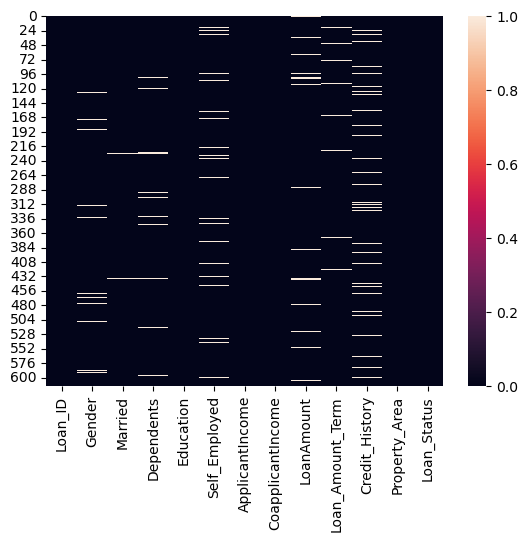

In [258]:
#lets visualise it using heatmap
sns.heatmap(df.isnull())

In [259]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [260]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [261]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [262]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [263]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [264]:
df['ApplicantIncome'].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

# Data Processing

In [265]:
# Drop the Loan_ID column
df.drop('Loan_ID', axis=1, inplace=True)

# Display the modification
df.head(2)


Gender Married Dependents Education Self_Employed  ApplicantIncome  \
0   Male      No          0  Graduate            No             5849   
1   Male     Yes          1  Graduate            No             4583   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N

In [266]:
#Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [267]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [268]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

# Encode Categorical Variables

In [269]:
# Converting categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

In [270]:
#Lets check after encoding
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# Description

In [271]:
df.describe()

Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  Property_Area  Loan_Status  
count      614.000000     614.000000   614.000000  
mean         0.855049       1.037459     0.687296  
std          0.352339       0.787482     0.463973  
min          0.000000       0.000000     0.000000  
25%          1.000000       0.000000     0.000000  
50%          1.000000       1.000000     1.000000  
75%          1.000000       2.000000     1.000000  
max          1.000000       2.000000     1.000000

In [272]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Data Visualization

<Axes: >

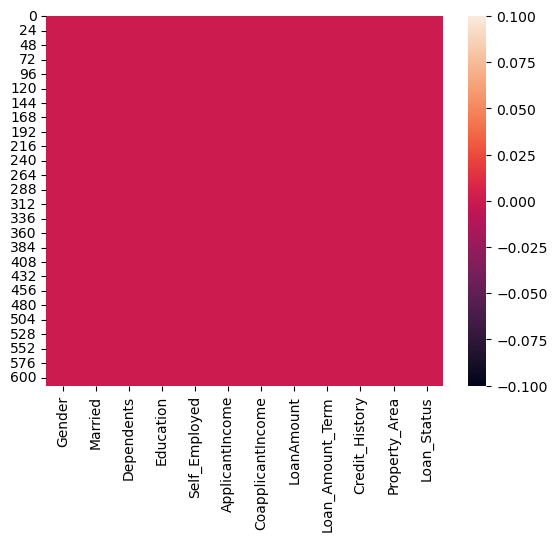

In [211]:
#lets visualise it using heatmap aftter dealing with null values
sns.heatmap(df.isnull())

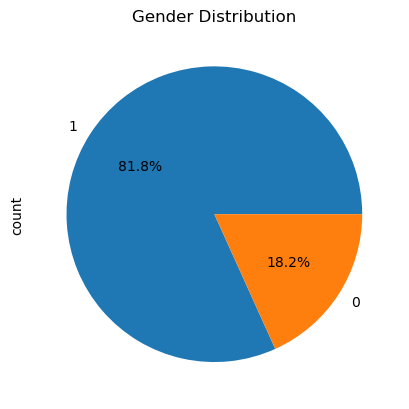

In [212]:
#Creating pie chart for 'Gender'
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

Here 1 denotes to men which is 81.8% of overall candidate

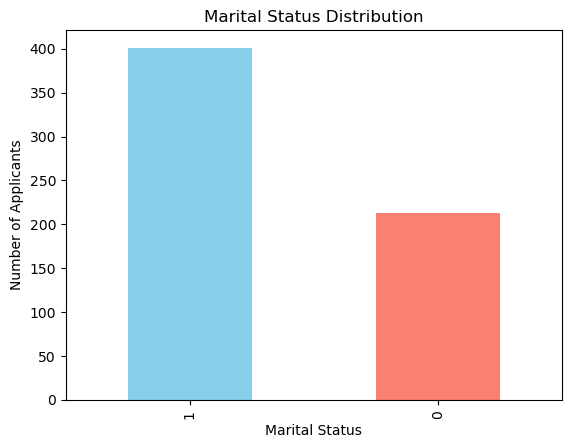

In [213]:
df['Married'].value_counts().plot.bar(color=['skyblue', 'salmon'])
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of Applicants')
plt.show()


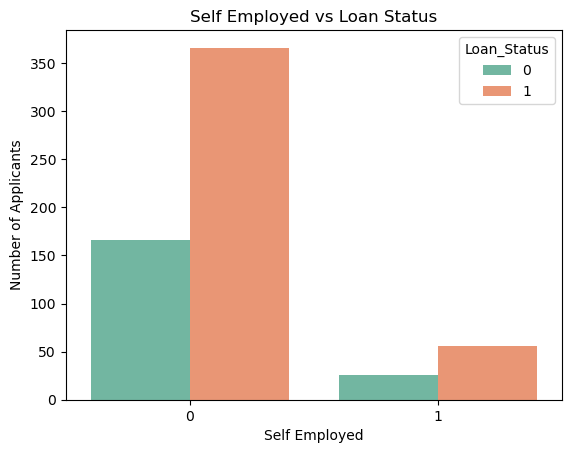

In [215]:
# count plot
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df, palette='Set2')

# self employed vs Loan Status
plt.title('Self Employed vs Loan Status')
plt.xlabel('Self Employed')
plt.ylabel('Number of Applicants')
plt.show()

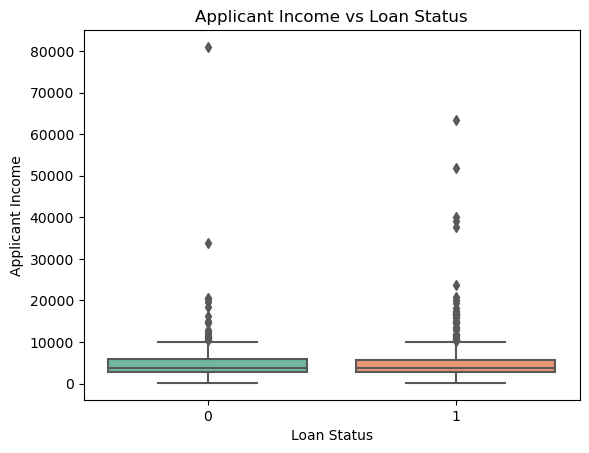

In [216]:
# Create a box plot
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='Set2')

# Applicant Income vs Loan Status
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()


In [221]:
df['Property_Area'].value_counts()

Property_Area
1    233
2    202
0    179
Name: count, dtype: int64

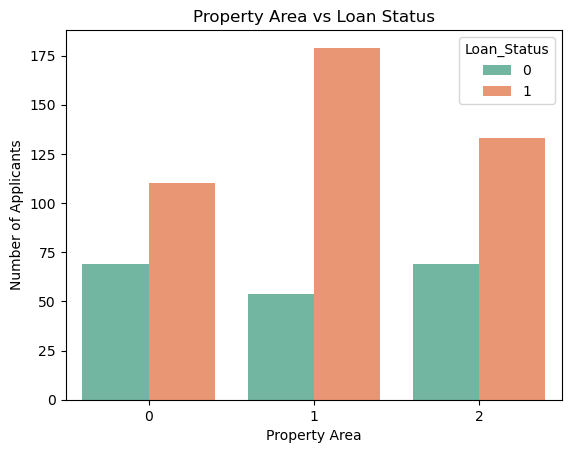

In [222]:
# count plot
sns.countplot(x='Property_Area', hue='Loan_Status', data=df, palette='Set2')

# Property Area vs Loan Status
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Number of Applicants')
plt.show()

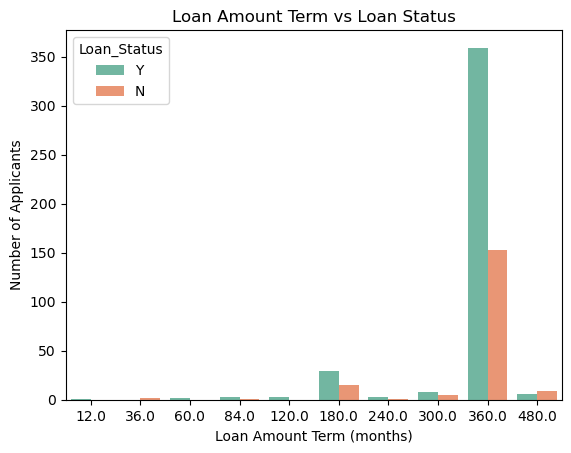

In [239]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df, palette='Set2')
plt.title('Loan Amount Term vs Loan Status')
plt.xlabel('Loan Amount Term (months)')
plt.ylabel('Number of Applicants')
plt.show()

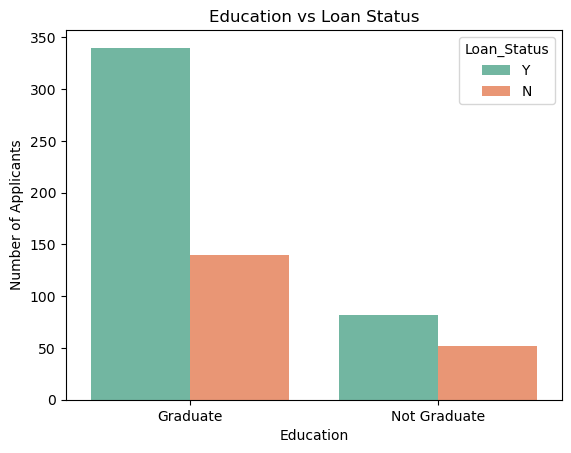

In [240]:
sns.countplot(x='Education', hue='Loan_Status', data=df, palette='Set2')
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Number of Applicants')
plt.show()

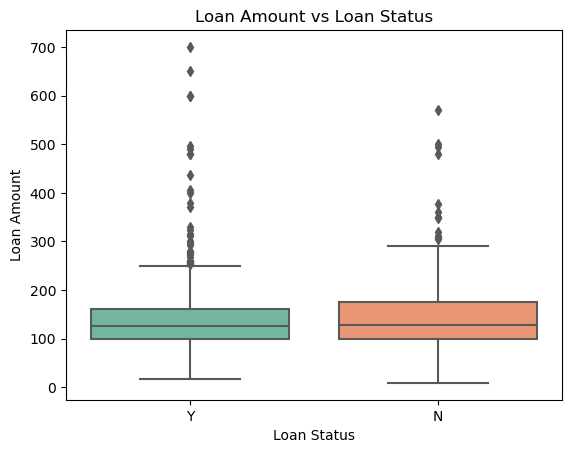

In [241]:
# Loan Amount vs Loan Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='Set2')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

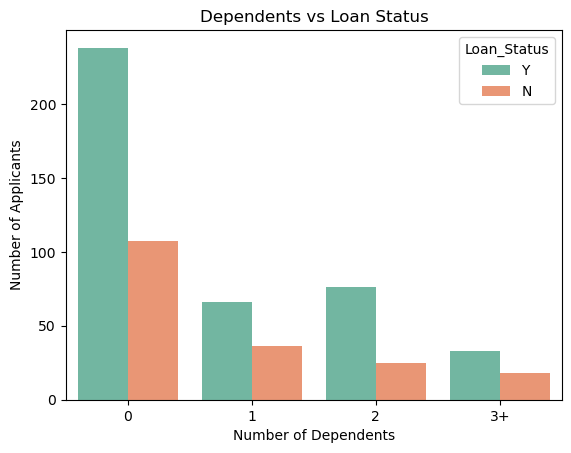

In [243]:
#Dependents Vs Loan Status

sns.countplot(x='Dependents', hue='Loan_Status', data=df, palette='Set2')
plt.title('Dependents vs Loan Status')
plt.xlabel('Number of Dependents')
plt.ylabel('Number of Applicants')
plt.show()

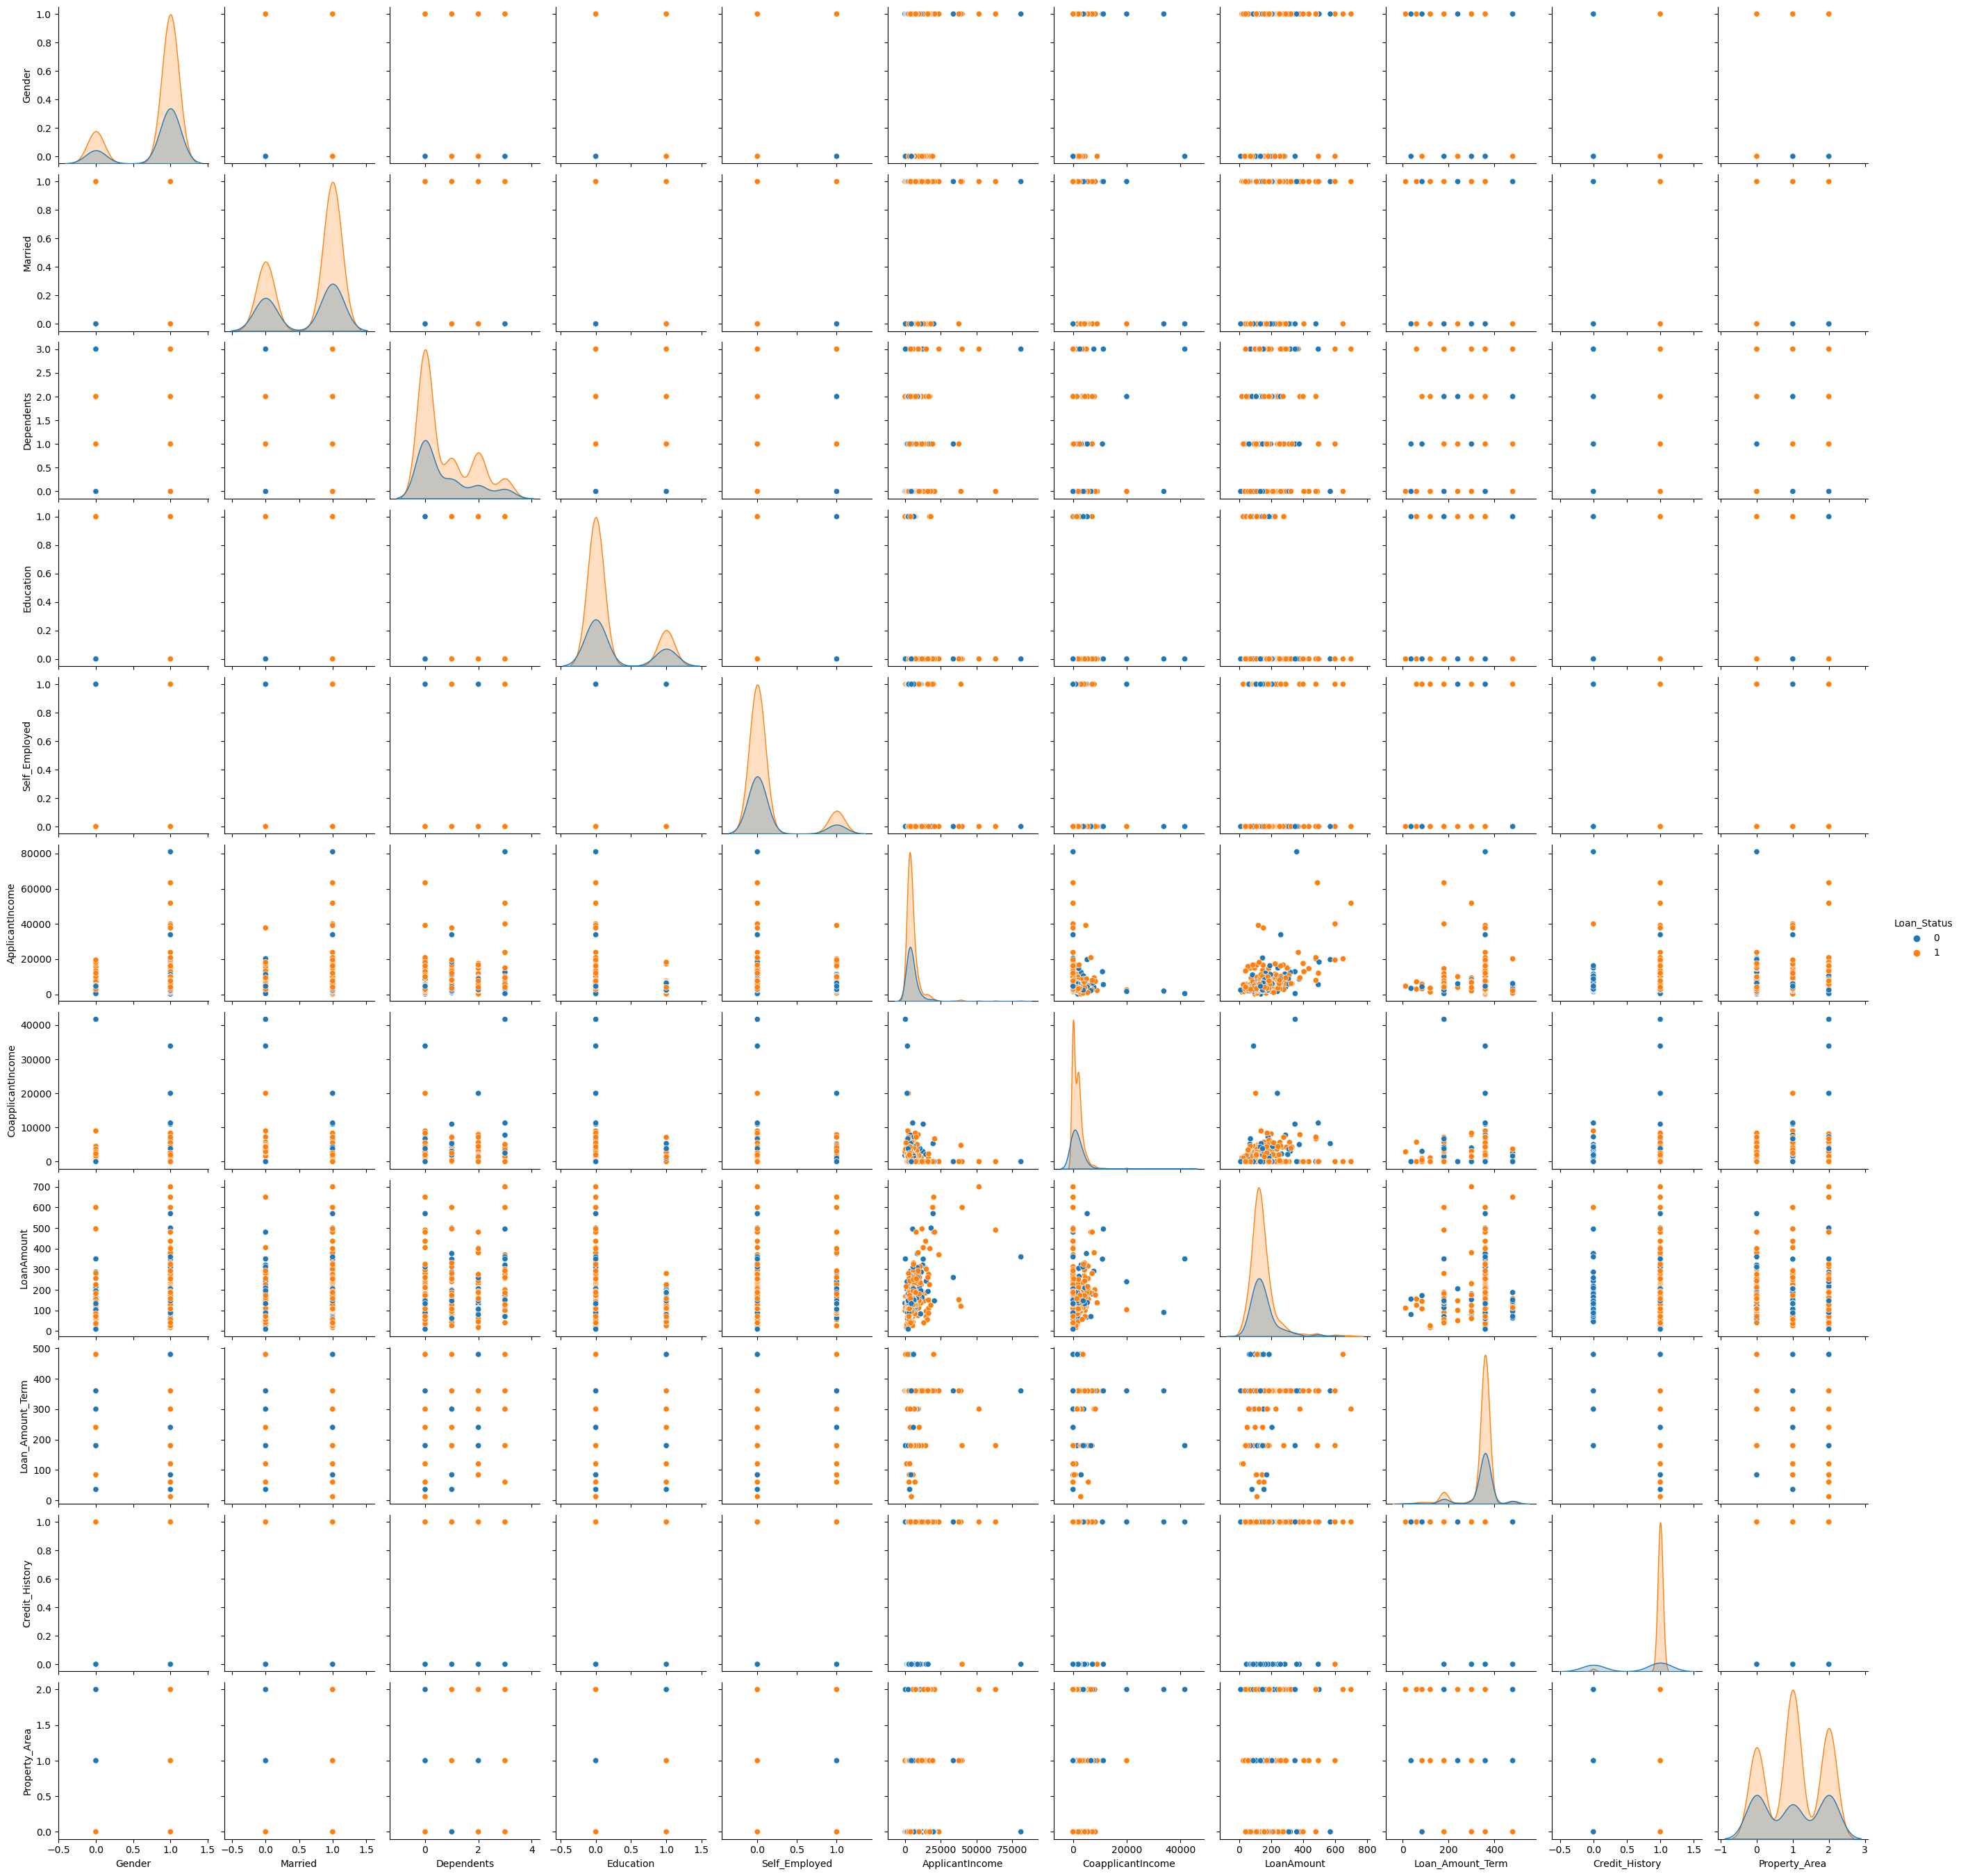

In [282]:
sns.pairplot(data=df, hue='Loan_Status')

In [283]:
df.corr()

Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.364569    0.172914   0.045364      -0.000525   
Married            0.364569  1.000000    0.334216   0.012304       0.004489   
Dependents         0.172914  0.334216    1.000000   0.055752       0.056798   
Education          0.045364  0.012304    0.055752   1.000000      -0.010383   
Self_Employed     -0.000525  0.004489    0.056798  -0.010383       1.000000   
ApplicantIncome    0.058809  0.051708    0.118202  -0.140760       0.127180   
CoapplicantIncome  0.082912  0.075948    0.030430  -0.062290      -0.016100   
LoanAmount         0.107930  0.147141    0.163106  -0.166998       0.115260   
Loan_Amount_Term  -0.074030 -0.100912   -0.103864  -0.073928      -0.033739   
Credit_History     0.009170  0.010938   -0.040160  -0.073658      -0.001550   
Property_Area     -0.025752  0.004257   -0.000244  -0.065243      -0.030860   
Loan_Status        0.017987  0.091478    0.010118  -0.085884      -0.003700   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender                    0.058809           0.082912    0.107930   
Married                   0.051708           0.075948    0.147141   
Dependents                0.118202           0.030430    0.163106   
Education                -0.140760          -0.062290   -0.166998   
Self_Employed             0.127180          -0.016100    0.115260   
ApplicantIncome           1.000000          -0.116605    0.565620   
CoapplicantIncome        -0.116605           1.000000    0.187828   
LoanAmount                0.565620           0.187828    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036475   
Credit_History           -0.018615           0.011134   -0.001431   
Property_Area            -0.009500           0.010522   -0.044776   
Loan_Status              -0.004710          -0.059187   -0.036416   

                   Loan_Amount_Term  Credit_History  Property_Area  \
Gender                    -0.074030        0.009170      -0.025752   
Married                   -0.100912        0.010938       0.004257   
Dependents                -0.103864       -0.040160      -0.000244   
Education                 -0.073928       -0.073658      -0.065243   
Self_Employed             -0.033739       -0.001550      -0.030860   
ApplicantIncome           -0.046531       -0.018615      -0.009500   
CoapplicantIncome         -0.059383        0.011134       0.010522   
LoanAmount                 0.036475       -0.001431      -0.044776   
Loan_Amount_Term           1.000000       -0.004705      -0.076120   
Credit_History            -0.004705        1.000000       0.001963   
Property_Area             -0.076120        0.001963       1.000000   
Loan_Status               -0.022549        0.540556       0.032112   

                   Loan_Status  
Gender                0.017987  
Married               0.091478  
Dependents            0.010118  
Education            -0.085884  
Self_Employed        -0.003700  
ApplicantIncome      -0.004710  
CoapplicantIncome    -0.059187  
LoanAmount           -0.036416  
Loan_Amount_Term     -0.022549  
Credit_History        0.540556  
Property_Area         0.032112  
Loan_Status           1.000000

<Axes: >

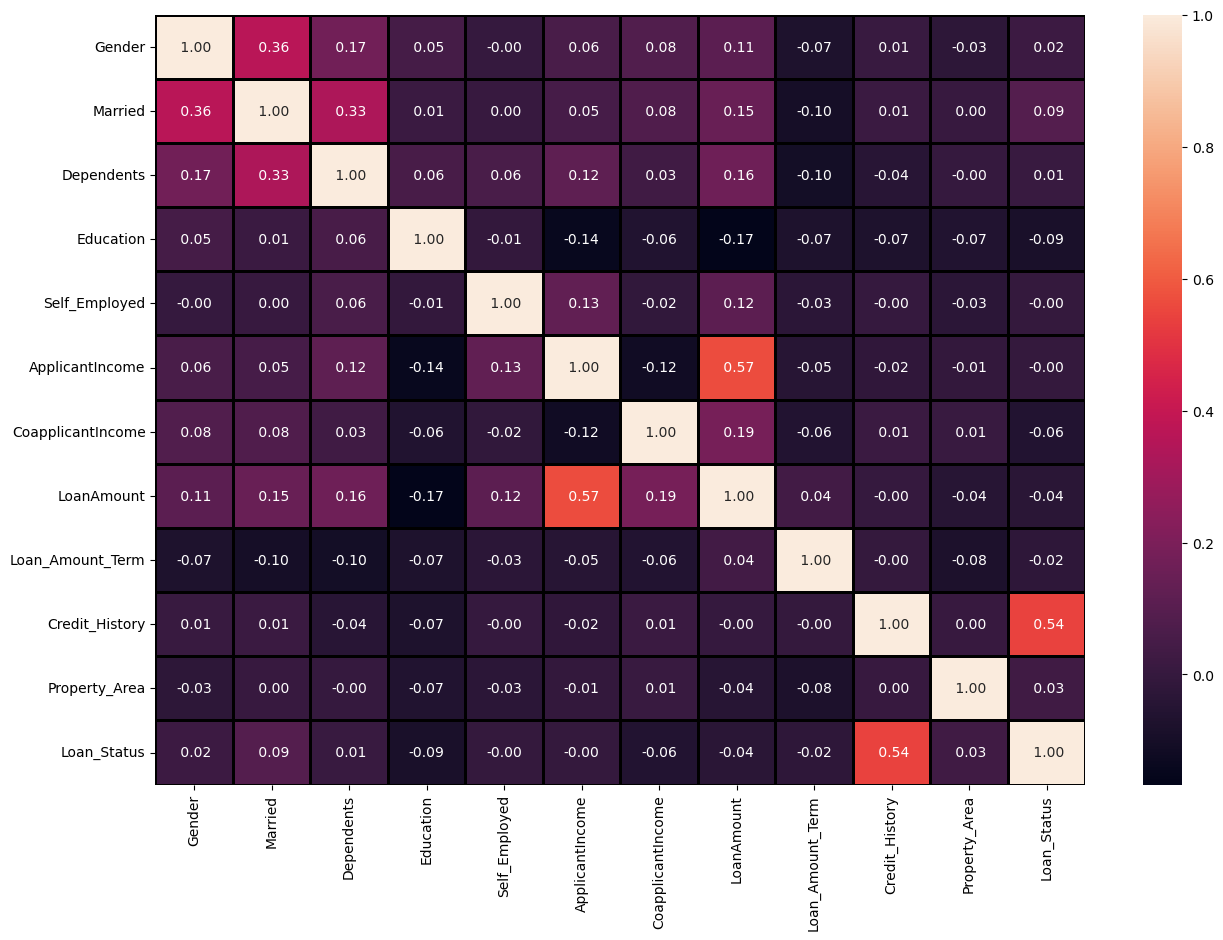

In [284]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=1,linecolor='black',fmt=' .2f')

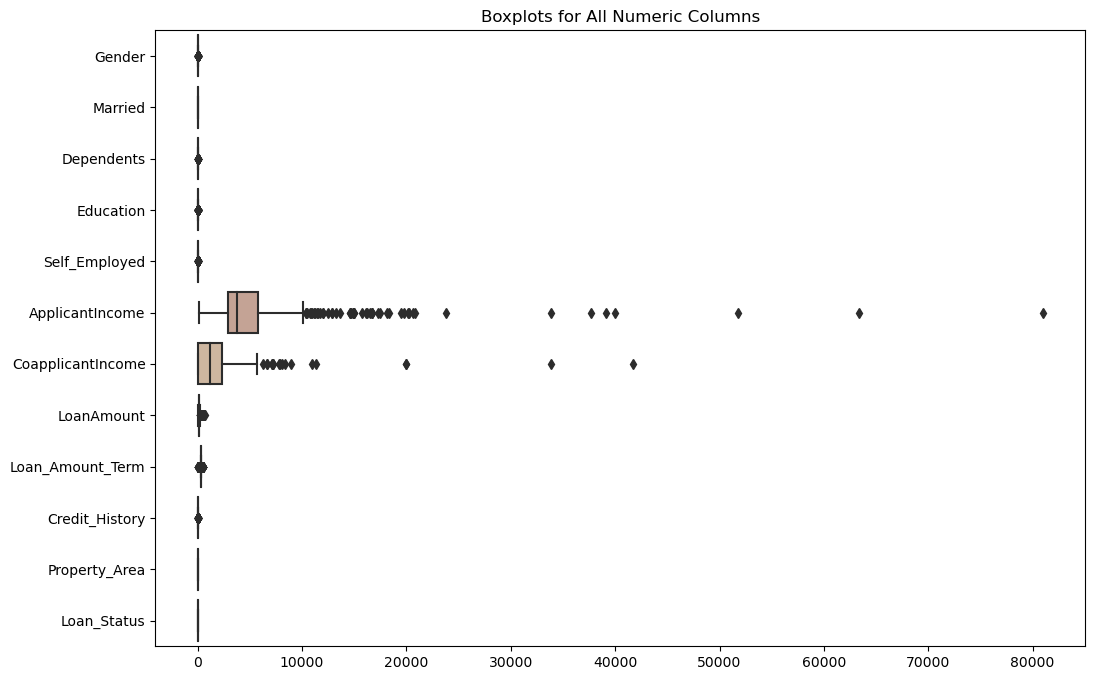

In [286]:
#Boxplot
plt.figure(figsize=(12, 8))

sns.boxplot(data=df, orient='h', palette='pink')
plt.title('Boxplots for All Numeric Columns')  
plt.show()

# Remove Outliers

In [288]:
z = np.abs(zscore(df.select_dtypes(include=['float64', 'int64']))) 
threshold = 3

# Identify outliers
outliers = np.where(z > threshold)

# Remove outliers
df_cleaned = df[(z < threshold).all(axis=1)]

# Print shapes
print(f'Original shape: {df.shape}')
print(f'Cleaned shape: {df_cleaned.shape}')

Original shape: (614, 12)
Cleaned shape: (577, 12)


# Remove Skewness

In [289]:
from sklearn.preprocessing import PowerTransformer


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Initialization
pt = PowerTransformer()
df[numeric_cols] = pt.fit_transform(df[numeric_cols])
print(df.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0         0.544331   
1       1        1           1          0              0         0.170974   
2       1        1           0          0              1        -0.499955   
3       1        1           0          1              0        -0.743873   
4       1        0           0          0              0         0.582817   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -1.102837    0.235387           0.17554        0.411733   
1           0.750578   -0.037659           0.17554        0.411733   
2          -1.102837   -1.346305           0.17554        0.411733   
3           0.891686   -0.167886           0.17554        0.411733   
4          -1.102837    0.158610           0.17554        0.411733   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2    

In [290]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# scaling using standard scaler

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [292]:
# Features and target variable
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [293]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [294]:
# Initializing
scaler = StandardScaler()

In [295]:
# Fit the scaler only on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [297]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [298]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [301]:
vif_df = calc_vif(X)
print(vif_df)

            variables  VIF FACTOR
0              Gender    4.066643
1             Married    3.773455
2          Dependents    1.815483
3           Education    1.329195
4       Self_Employed    1.174757
5     ApplicantIncome    1.828678
6   CoapplicantIncome    1.486345
7          LoanAmount    1.597009
8    Loan_Amount_Term    1.029958
9      Credit_History    1.009066
10      Property_Area    2.211866


# Model Traning

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# 1.Logistic Regression

In [303]:
# Model training
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [304]:
# Model evaluation
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

In [305]:
# Print 
print("Logistic Regression")
print("Accuracy:", accuracy_log_reg)
print(report_log_reg)
print("-" * 60)

Logistic Regression
Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

------------------------------------------------------------


# 2.RandomForest Classifier

In [307]:
# Model training
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [308]:
# Model evaluation
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
report_random_forest = classification_report(y_test, y_pred_random_forest)

In [309]:
# Print 
print("Random Forest Classifier")
print("Accuracy:", accuracy_random_forest)
print(report_random_forest)
print("-" * 60)

Random Forest Classifier
Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

------------------------------------------------------------


# 3.Support Vector Machine (SVM)

In [311]:
# Model training
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [312]:
# Model evaluation
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

In [313]:
# Print 
print("Support Vector Machine")
print("Accuracy:", accuracy_svm)
print(report_svm)
print("-" * 60)

Support Vector Machine
Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

------------------------------------------------------------


# 4.Gradient Boosting Classifier

In [315]:
# Model training
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [316]:
# Model evaluation
y_pred_gradient_boosting = gradient_boosting.predict(X_test)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
report_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting)

In [317]:
# Print 
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_gradient_boosting)
print(report_gradient_boosting)
print("-" * 60)

Gradient Boosting Classifier
Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123

------------------------------------------------------------


Logistic Regression has done overall the best performance